In [105]:
%%HTML
<style>
    body {
        --vscode-font-family: "Inter";
        font-size: 15px;``
    }
</style>

# **Dependencies**
* Pandas
* Plotly
* nbformat

# **Distance Running Predictions**

The objective of this project is to create a model that predicts race time given the distance and your history of running performance

In [577]:
import plotly.graph_objects as go
import pandas as pd
from IPython.display import clear_output

onedark_theme = {
    'red': '#e06c75',
    'blue': '#61afef',
    'orange': '#d19562',
    'green': '#8dc379',
    'bg': '#23272e',
    'txt': '#8b8d90',
    'txt_dark': '#1e2227'
    }
vs_lightplus = {
    'red': '#cd3131',
    'bg': '#ffffff',
    'txt': '#868686',
    'txt_dark': '#c9c9c9'
    }
github = {
    'red': '#ba2121',
    'bg': '#ffffff',
    'txt': '#212121',
    'txt_dark': '#b5b5b5'
    }
theme = onedark_theme

def choose_label(_name,dotname,axis):

    if _name is not None and dotname is not None:
        return _name
    elif _name is not None and dotname is None:
        return _name
    elif _name is None and dotname is not None:
        return dotname
    else:
        return axis

def my_scatter(x,y,z,
               c=theme['red'],
               cmap='viridis',
               aspectratio=dict(x=1,y=1,z=1),
               height=None,
               width=None,
               markersize=5
               ):
    '''
    Helper function that plots a scatter using plotly

    c: list or np.ndarray or pd.Series - the numerical value associated with the colour map
    cmap: string - colour map
    aspectratio: dict - aspect ratio 

    '''

    x = pd.Series(x)
    y = pd.Series(y)
    z = pd.Series(z)


    trace_data = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=markersize,
            color=c,
            colorscale=cmap,
            opacity=0.8
        )
    )

    fig = go.Figure(data = trace_data)

    fig.update_layout(
        autosize=False if not (height is None and width is None) else True,
        width=width,
        height=height,
        margin = dict(l=0,r=0,b=0,t=0),
        paper_bgcolor=theme['bg'],
        font_color = theme['txt'],
        scene = dict(
            xaxis = dict(     
                title = 'x' if x.name is None else x.name,
                backgroundcolor=theme['bg'],
                gridcolor=theme['txt'],
                showbackground=True,
                zerolinecolor=theme['txt'],
                titlefont=dict(family='Inter')
                # range=
            ),
            yaxis = dict(
                title = 'y' if y.name is None else y.name,
                backgroundcolor=theme['bg'],
                gridcolor=theme['txt'],
                showbackground=True,
                zerolinecolor=theme['txt'],
                titlefont=dict(family='Inter')
                # range=
            ),
            zaxis = dict(
                title = 'z' if z.name is None else z.name,
                backgroundcolor=theme['bg'],
                gridcolor=theme['txt'],
                showbackground=True,
                zerolinecolor=theme['txt'],
                titlefont=dict(family='Inter')
                # range=
            ),
            aspectratio=aspectratio,
            camera = dict(projection_type="orthographic")
        )
    )

    return fig

import plotly.express as px

def my_barchart(x: pd.Series,                
                y: pd.Series,
                x_name=None,
                y_name=None,
                width=None,
                height=None,
                ):
    
    x=pd.Series(x)
    y=pd.Series(y)
    x_name = choose_label(x_name,x.name,'x')
    y_name = choose_label(y_name,y.name,'y')
    
    df= pd.DataFrame({x.name: x, y.name: y})

    fig = px.bar(df,x=x,y=y)

    fig.update_xaxes(gridcolor=theme['txt_dark'], title_text=x_name, title_font=dict(family='Inter'), linecolor=theme['txt'], linewidth=3)
    fig.update_yaxes(gridcolor=theme['txt_dark'], title_text=y_name, title_font=dict(family='Inter'))
    fig.update_traces(marker=dict(line=dict(color=theme['txt_dark'])))

    fig.update_layout(
        autosize=False if not (height is None and width is None) else True,
        width=width,
        height=height,
        margin = dict(l=0,r=0,b=0,t=0),
        paper_bgcolor=theme['bg'],
        plot_bgcolor=theme['bg'],
        font_color = theme['txt'],
    )

    return fig

def my_iteractable_cumulative(x, x_name = None, y_name = None):

    x = pd.Series(x)
    x_name = choose_label(x_name,x.name,'x')
    df = pd.DataFrame({x_name: x})

    y_name = 'Cumulative Distribution' if y_name is None else y_name

    fig = px.ecdf(df,x=x_name)

    fig.update_xaxes(gridcolor=theme['txt'], title_text=x_name, title_font=dict(family='Inter'), linecolor=theme['txt'], linewidth=3)
    fig.update_yaxes(gridcolor=theme['txt'], title_text=y_name, title_font=dict(family='Inter'))
    fig.update_traces(line=dict(color=theme['red'],width=5))


    fig.update_layout(
        margin = dict(l=50,r=50,b=50,t=50),
        paper_bgcolor=theme['bg'],
        plot_bgcolor=theme['bg'],
        font_color = theme['txt'],
    )

    return fig

def my_freqdist(x,x_name=None,height=None,width=None,n_bins=None):

    x=pd.Series(x)
    x_name = choose_label(x_name,x.name,'x')
    df=pd.DataFrame({x_name:x.values})

    fig = px.histogram(df,x_name,nbins=n_bins)
    
    fig.update_xaxes(gridcolor=theme['txt'], title_text=x_name, title_font=dict(family='Inter'), linecolor=theme['txt'], linewidth=3)
    fig.update_yaxes(gridcolor=theme['txt'], title_font=dict(family='Inter'))

    fig.update_traces(marker_color=theme['red'])
    

    fig.update_layout(
        margin = dict(l=50,r=50,b=50,t=50),
        autosize=True if (height is None and width is None) else False,
        width=width,
        height=height,
        paper_bgcolor=theme['bg'],
        plot_bgcolor=theme['bg'],
        font_color = theme['txt'],
    )

    return fig

def my_xyscatter(x,y,x_name=None,y_name=None,height=None,width=None):

    x=pd.Series(x)
    x_name = choose_label(x_name,x.name,'x')
    y=pd.Series(y)
    y_name = choose_label(y_name,y.name,'y')

    fig = go.Figure(data=go.Scatter(
        x=x, 
        y=y, 
        mode='markers',
        marker=dict(color=theme['red']))
    )  


    fig.update_xaxes(title_text=x_name, title_font=dict(family='Inter'), linecolor=theme['txt'])
    fig.update_yaxes(title_text=y_name, title_font=dict(family='Inter'))
    # fig.update_traces(marker=dict(line=dict(color=theme['txt_dark'])))

    fig.update_layout(
        margin = dict(l=50,r=50,b=50,t=50),
        autosize=True if (height is None and width is None) else False,
        width=width,
        height=height,
        xaxis=dict(gridcolor=theme['txt'], zerolinecolor=theme['txt']),
        yaxis=dict(gridcolor=theme['txt'], zerolinecolor=theme['txt']),
        paper_bgcolor=theme['bg'],
        plot_bgcolor=theme['bg'],
        font_color = theme['txt'],
    )

    return fig

def my_interactable_xyline(y1, x1=None, y1_label=None, y2=None, x2=None, y2_label=None, x_label='x', y_label='y', title=''):
    fig = go.Figure()

    # Add traces
    fig.add_trace(go.Scatter(x=x1, y=y1, mode='lines', name=y1_label))
    if y2 is not None:
        fig.add_trace(go.Scatter(x=x2, y=y2, mode='lines', name=y2_label))

    # Set labels
    fig.update_layout(
        title=title,
        xaxis_title=x_label, 
        yaxis_title=y_label,
        plot_bgcolor=theme['bg'],
        paper_bgcolor=theme['bg'],
        font=dict(
            family="Inter",
            color=theme['txt']
        )
    )

    fig.show()   
    

In [1667]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

def my_xyscatter(x, y, x_name=None, y_name=None, height=4, width=6):
    x = pd.Series(x)
    y = pd.Series(y)
    x_name = choose_label(x_name, x.name, 'x')
    y_name = choose_label(y_name, y.name, 'y')

    fig, ax = plt.subplots(figsize=(width, height))

    ax.scatter(x, y, color=theme['red'])

    ax.set_xlabel(x_name, fontfamily='Inter', color=theme['txt'])
    ax.set_ylabel(y_name, fontfamily='Inter', color=theme['txt'])

    ax.spines['bottom'].set_color(theme['txt'])
    ax.spines['top'].set_color(theme['txt']) 
    ax.spines['right'].set_color(theme['txt'])
    ax.spines['left'].set_color(theme['txt'])

    ax.tick_params(axis='x', colors=theme['txt'])
    ax.tick_params(axis='y', colors=theme['txt'])

    ax.set_axisbelow(True)
    ax.grid(True, color=theme['txt'], linestyle='--', linewidth=0.5)

    fig.patch.set_facecolor(theme['bg'])
    ax.set_facecolor(theme['bg'])

    
def my_freqdist(x, x_name=None, height=4, width=8, n_bins=20, xlim:list=None, ylim:list=None):
    '''
    Helper function that plots a histogram using matplotlib.pyplot

    x: list or np.ndarray or pd.Series - data values
    x_name: string - label for x-axis
    height: float - figure height
    width: float - figure width
    n_bins: int - number of bins for the histogram
    '''

    x = pd.Series(x)
    x_name = choose_label(x_name, x.name, 'x')

    fig, ax = plt.subplots(figsize=(width,height))

    counts, bins, _ = ax.hist(x, bins=n_bins, color=theme['red'], edgecolor=theme['txt_dark'], linewidth=1.5, zorder=2)

    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlabel(x_name, fontfamily='Inter', color=theme['txt'])
    ax.set_ylabel('Frequency', fontfamily='Inter', color=theme['txt'])

    ax.grid(color=theme['txt'], linestyle='--', linewidth=0.5, zorder=1)

    fig.patch.set_facecolor(theme['bg'])
    ax.set_facecolor(theme['bg'])

    for tick in ax.get_xticklabels():
        tick.set_fontfamily('Inter')
        tick.set_color(theme['txt'])
    for tick in ax.get_yticklabels():
        tick.set_fontfamily('Inter')
        tick.set_color(theme['txt'])

    for spine in ax.spines.values():
        spine.set_edgecolor(theme['txt'])

    plt.show()

def my_barchart(x, y, x_name=None, y_name=None, width=None, height=None):
    x = pd.Series(x)
    y = pd.Series(y)
    x_name = choose_label(x_name, x.name, 'x')
    y_name = choose_label(y_name, y.name, 'y')

    fig, ax = plt.subplots(figsize=(width, height))

    ax.bar(x, y, color=theme['bg'], edgecolor=theme['txt_dark'], linewidth=3)

    ax.set_xlabel(x_name, fontfamily='Inter', color=theme['txt'])
    ax.set_ylabel(y_name, fontfamily='Inter', color=theme['txt'])
    ax.set_facecolor(theme['bg'])
    fig.patch.set_facecolor(theme['bg'])

    ax.spines['bottom'].set_color(theme['txt'])
    ax.spines['top'].set_color(theme['txt']) 
    ax.spines['right'].set_color(theme['txt'])
    ax.spines['left'].set_color(theme['txt'])

    ax.tick_params(axis='x', colors=theme['txt'])
    ax.tick_params(axis='y', colors=theme['txt'])

    plt.show()

def my_cumulative(x, x_name=None, y_name=None):
    x = pd.Series(x)
    x_name = choose_label(x_name, x.name, 'x')
    y_name = 'Cumulative Distribution' if y_name is None else y_name

    fig, ax = plt.subplots()

    # Calculate the ECDF
    x_sorted = np.sort(x)
    y_values = np.arange(1, len(x_sorted)+1) / len(x_sorted)

    ax.plot(x_sorted, y_values, color=theme['red'], linewidth=5)

    ax.set_xlabel(x_name, fontfamily='Inter', color=theme['txt'])
    ax.set_ylabel(y_name, fontfamily='Inter', color=theme['txt'])

    ax.spines['bottom'].set_color(theme['txt'])
    ax.spines['top'].set_color(theme['txt']) 
    ax.spines['right'].set_color(theme['txt'])
    ax.spines['left'].set_color(theme['txt'])

    ax.tick_params(axis='x', colors=theme['txt'])
    ax.tick_params(axis='y', colors=theme['txt'])

    # Set grid lines behind other elements
    ax.set_axisbelow(True)
    ax.grid(True, color=theme['txt'], linestyle='--', linewidth=0.5)

    fig.patch.set_facecolor(theme['bg'])
    ax.set_facecolor(theme['bg'])

    plt.show()

def my_xyline(y1, x1=None, y1_label=None,
              x2=None, y2=None, y2_label=None,
              x3=None, y3=None, y3_label=None,
              x_label='x', y_label='y',
              xlim=None, ylim=None):
    fig, ax = plt.subplots()
    if x1 is not None:
        plt.plot(x1,y1, label=y1_label, color=theme['red'])
    else:
        plt.plot(y1, label=y1_label, color=theme['red'])
    if y2 is not None:
        if x2 is not None:
            plt.plot(x2,y2, label=y2_label, color=theme['blue'])
        else:
            plt.plot(y2, label=y2_label, color=theme['blue'])
    if y3 is not None:
        if x3 is not None:
            plt.plot(x3,y3, label=y3_label, color=theme['green'])
        else:
            plt.plot(y3, label=y3_label, color=theme['green'])

    legend = plt.legend(facecolor=theme['txt'], prop={'family':'Inter'})

    ax.set_xlabel(x_label, fontfamily='Inter', color=theme['txt'])
    ax.set_ylabel(y_label, fontfamily='Inter', color=theme['txt'])

    plt.xlim(xlim)
    plt.ylim(ylim)

    ax.spines['bottom'].set_color(theme['txt'])
    ax.spines['top'].set_color(theme['txt']) 
    ax.spines['right'].set_color(theme['txt'])
    ax.spines['left'].set_color(theme['txt'])

    ax.tick_params(axis='x', colors=theme['txt'])
    ax.tick_params(axis='y', colors=theme['txt'])

    ax.set_axisbelow(True)
    ax.grid(True, color=theme['txt'], linestyle='--', linewidth=0.5)

    fig.patch.set_facecolor(theme['bg'])
    ax.set_facecolor(theme['bg'])

def my_traintestpredictions(x_train=None, y_train=None, y_train_pred=None,
                            x_test=None, y_test=None, y_test_pred=None,
                            x_name='x-variable', y_name = 'Time'):
    '''
    Plots the training against predicted values for both the test and train sets Assuming only 1 y-varaible which is time.
    '''

    fig, ax = plt.subplots()
    if x_train is not None:
        plt.scatter(x_train, y_train, label='Train, True', color=theme['red'])
    if y_train_pred is not None:
        plt.scatter(x_train, y_train_pred, label='Train, Predicted', color=theme['blue'])
    if y_test is not None:
        plt.scatter(x_test, y_test, label='Test, True', color=theme['orange'])
    if y_test_pred is not None:
        plt.scatter(x_test, y_test_pred, label='Test, Predicted', color=theme['green'])

    legend = plt.legend(facecolor=theme['txt'], prop={'family':'Inter'})

    ax.set_xlabel(x_name, fontfamily='Inter', color=theme['txt'])
    ax.set_ylabel(y_name, fontfamily='Inter', color=theme['txt'])

    ax.spines['bottom'].set_color(theme['txt'])
    ax.spines['top'].set_color(theme['txt']) 
    ax.spines['right'].set_color(theme['txt'])
    ax.spines['left'].set_color(theme['txt'])

    ax.tick_params(axis='x', colors=theme['txt'])
    ax.tick_params(axis='y', colors=theme['txt'])

    ax.set_axisbelow(True)
    ax.grid(True, color=theme['txt'], linestyle='--', linewidth=0.5)

    fig.patch.set_facecolor(theme['bg'])
    ax.set_facecolor(theme['bg'])

In [579]:
import numpy as np
from datetime import datetime

# import the dataset as a DataFrame
data = pd.read_csv("data/raw-data-kaggle.csv", delimiter=";")

data.head()

athlete gender         timestamp  distance (m)  elapsed time (s)  \
0  18042525      M  15/12/2019 09:08        2965.8               812   
1  18042525      M  10/12/2019 19:27       10020.8              3290   
2  18042525      M  03/12/2019 19:46       12132.2              4027   
3  18042525      M  26/11/2019 19:46       11631.5              4442   
4  18042525      M  19/11/2019 19:45       11708.1              4022   

   elevation gain (m)  average heart rate (bpm)  
0                17.4                     150.3  
1                52.2                     160.8  
2               249.0                     148.9  
3               194.0                     136.2  
4               250.7                     146.0

In [580]:
print(f'Number of unique athletes: {data["athlete"].nunique()}')
print(f'Number of genders: {data["gender"].nunique()}')
print(f"Precision of elevation gain: {data['elevation gain (m)'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).max()} m")

Number of unique athletes: 116
Number of genders: 2
Precision of elevation gain: 1 m


The raw data contains 42,116 data points. There are 7 variables in the data. 

Some observations:
* ```gender``` appears is boolean in nature (only either Male or Female)
* ```athlete``` is categorical data recorded as the numerical user ID. 
* Despite there being so many data points, there are only 116 different athletes - this means there is a lot of data per athlete.
* The other 5 columns are continuous numerical data. However, elevation gain is recorded as an integer.

# **Exploratory Data Analysis (EDA)**

The objectives of EDA are:
1. Confirm if the data is suitable for the application
1. Discover and resolve data quality issues (missing data, duplicates, incorrect values, anomalies, incorrect data types)
1. Check the data's mean, median, mode skewness, range, count etc.
1. Detect outliers and anomalies
1. Understand data patterns and correlations between variables

## **Data Cleaning**

### **Extracting Useful Columns**


I would like to make the running time predictions based solely on an individual's performance. Therefore, I will be excluding gender as a parameter for the model.

In [581]:
data = data.drop(columns = 'gender')

All the other columns should be useful and will be kept

### **Variable Formatting**

Here I'll check if every row of each column has the same data type, and if each column has the appropriate data type.

In [582]:
data.dtypes

athlete                       int64
timestamp                    object
distance (m)                float64
elapsed time (s)              int64
elevation gain (m)          float64
average heart rate (bpm)    float64
dtype: object

In [583]:
# convert timestamp to dtype datetime 
data["timestamp"] = pd.to_datetime(data["timestamp"])

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\3259052015.py:2: UserWarning:

Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [584]:
data.dtypes

athlete                              int64
timestamp                   datetime64[ns]
distance (m)                       float64
elapsed time (s)                     int64
elevation gain (m)                 float64
average heart rate (bpm)           float64
dtype: object

In [585]:
data.max()

athlete                                46817575
timestamp                   2020-01-06 05:24:00
distance (m)                           218950.0
elapsed time (s)                        2971531
elevation gain (m)                      12078.5
average heart rate (bpm)                  237.0
dtype: object

In [586]:
data.min()

athlete                                  771514
timestamp                   2000-01-04 12:06:00
distance (m)                                0.0
elapsed time (s)                              0
elevation gain (m)                          0.0
average heart rate (bpm)                    0.0
dtype: object

From looking at the minimum values, the distance, elapsed time and heart rate data have missing values that are not flagged as null.

### **Missing Values**

Let's check if there are null, nan or missing values anywhere

In [587]:
data.isnull().sum()

athlete                         0
timestamp                       0
distance (m)                    0
elapsed time (s)                0
elevation gain (m)              0
average heart rate (bpm)    18384
dtype: int64

In [588]:
print(f'Average number of rows per athlete: {data.shape[0]/data["athlete"].nunique():.2f}')
print(f'Percentage of rows that are missing heart rate: {23732/42116*100:.1f} %')

Average number of rows per athlete: 363.07
Percentage of rows that are missing heart rate: 56.3 %


From the above, we see that there are null values in the gender and heart rate columns. 

The more problematic column is average heart rate, which has a null value in the majority of its rows. <!-- While this would have been an extremely useful metric to infer athlete capability and race times, there is insufficient data to safely impute the missing values. Therefore, heart rate should be omitted as a variable in the model on the basis of insufficient data. -->

<!-- Let's not exclude heart rate just yet! Let's check the proportion of athletes with heart rate data entirely missing. If too many athletes are missing heart rate data entirely, it is not a useful metric. If each athlete has a proportionally small amount of heart rate data missing, we can impute it per-athlete, given the large amount of data per-athlete. -->

**Feature Engineering: Pace (minutes per km)**

Before I analyse heart rate, I'll create a new feature for each row: pace. This is the average speed of the run in units of minutes per kilometre. This will allow be to do further data analysis based on the average speed of the runs.

Pace will be used to analyse the data, but won't be used as an input or output for the models.

In [589]:
data["pace (min/km)"] = (data["elapsed time (s)"]/60)/(data["distance (m)"]/1000)

#### **Missing Data: Heart Rate**

In [590]:
# count the number of athletes that are entirely missing any heart rate data
allnull = data.groupby('athlete')['average heart rate (bpm)'].apply(lambda x: x.isnull().all()).sum()

print(f'There are {allnull} athletes that have no heart rate data at all.')

# count the number of rows with missing heart rate per athlete, as a proportion of their total number of rows
null_counts = data[data['average heart rate (bpm)'].isnull()].groupby('athlete').size()
row_per_athlete = data.groupby('athlete').size()
nullpc_per_athlete = null_counts/row_per_athlete

print(f'{(nullpc_per_athlete>0.4).sum()/len(nullpc_per_athlete)*100:.1f}% of athletes have no heart rate data in more than 40% of their recorded runs')

There are 10 athletes that have no heart rate data at all.
50.0% of athletes have no heart rate data in more than 40% of their recorded runs


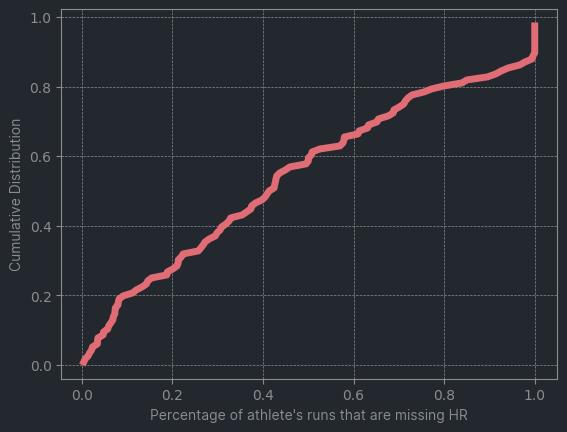

In [591]:
my_cumulative(nullpc_per_athlete, x_name="Percentage of athlete's runs that are missing HR")

##### **Discussion on Heart Rate**
Half of the athletes are missing HR data on >40% of their runs. There is insufficient data to impute the missing values. One option is to omit heart rate from the variables on which the models will be trained.

Alternatively, I could ignore the 56% of data that is missing heart rate, and only keep the remaining data. While I would be throwing away 56% of the data, there are still 26 thousand data points, which could be ample for my application. Heart rate is a very useful metric as it is the only objective variable in the dataset that indicates the level of effort exerted on a run.

On the basis of the importance of heart rate as a indicative parameter, I will choose to exclude all the data without heart rate.

In [592]:
data[data['average heart rate (bpm)'] == 0.0].size/len(data)*100

0.3988982809383607

In [593]:
data = data.dropna(subset=['average heart rate (bpm)']) # drop rows with missing heart rate
print(f"I've now got {data.shape[0]} data points")

I've now got 23732 data points


With the dropped rows, lets see how many runs each athelete has recorded.

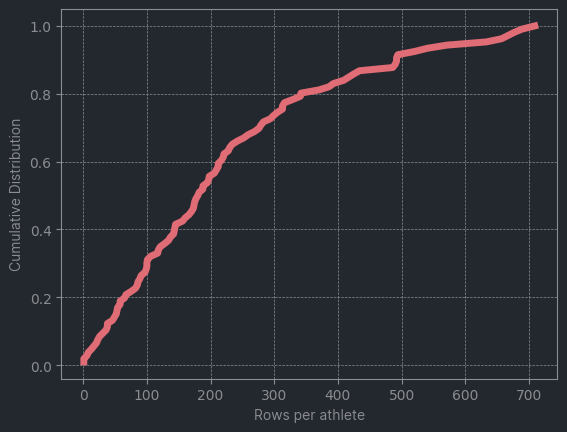

In [594]:
row_per_athlete = data.groupby('athlete').size()
my_cumulative(row_per_athlete, x_name="Rows per athlete")
# my_freqdist(row_per_athlete,x_name="Rows per athlete",n_bins=100)

70% of athletes have at least 100 data points. 

### **Drop Duplicates**

In [595]:
data = data.drop_duplicates()

print(f'There are now {data.shape[0]} rows that are unique')

There are now 23726 rows that are unique


## **Univariate Analysis**

### **Univariate Analysis: Heart Rate**

In [596]:
print(f"Number of rows with 0.0 BPM heart rate: {data[data['average heart rate (bpm)'] == 0.0].size}")
print(f"This is {data[data['average heart rate (bpm)'] == 0.0].size*100/data.shape[0]:.1f}% of the data")

Number of rows with 0.0 BPM heart rate: 168
This is 0.7% of the data


As a rule-of-thumb, I will impute if the missing data is more than 2% but less than 10%. Therefore I will not impute the missing data for heart rate = 0.0 BPM.

In [597]:
data.drop(data[data['average heart rate (bpm)'] == 0.0].index, inplace=True)
print(f"I've now got {data.shape[0]} data points with heart rate data")

I've now got 23702 data points with heart rate data


The world record for the slowest resting heart rate in a healthy human is 27 BPM. Therefore, runs with average heart rate below this value are practically impossible. While the average person would have a resting heart rate of 80 BPM, it is possible for athletes to have resting heart rates as low as 40 BPM.

In [598]:
data[data['average heart rate (bpm)']<40]

athlete           timestamp  distance (m)  elapsed time (s)  \
806    10825360 2019-12-30 09:34:00       17393.0             12745   
31292  12642956 2019-01-04 14:14:00        2471.0              9327   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  
806                 807.0                      36.9      12.212768  
31292                 0.0                      26.8      62.909753

The low heart rates above do not appear to be errors, as they are accompanied by extremely slow paces, but I will remove them as these paces will not be beneficial to the dataset. The upper end of the maximum heart rate is not implausible.

In [599]:
data.drop(data[data['average heart rate (bpm)']<40].index, inplace=True)
print(f"I've now got {data.shape[0]} data points")

I've now got 23700 data points


In [600]:
hr_sorted = np.sort(data['average heart rate (bpm)'].values)
hr_sorted[:10]

array([41.3, 44.7, 54.1, 54.9, 56.8, 57. , 57.1, 62. , 63.9, 64. ])

The lowest heart rates are still too low for running distances. To determine whether these must be removed, I must look at the data on a per-runner basis in the next step.

The highest heart rate ever recorded in a human is 600 BPM.

In [601]:
data[data['average heart rate (bpm)']>600]

Empty DataFrame
Columns: [athlete, timestamp, distance (m), elapsed time (s), elevation gain (m), average heart rate (bpm), pace (min/km)]
Index: []

There is no data that exceeds 600 BPM that I can delete on the basis of being implausible.

In [602]:
data["average heart rate (bpm)"].max()

237.0

The highest heart rate in my data is within reason.

#### **Graphical & Numerical Analysis**

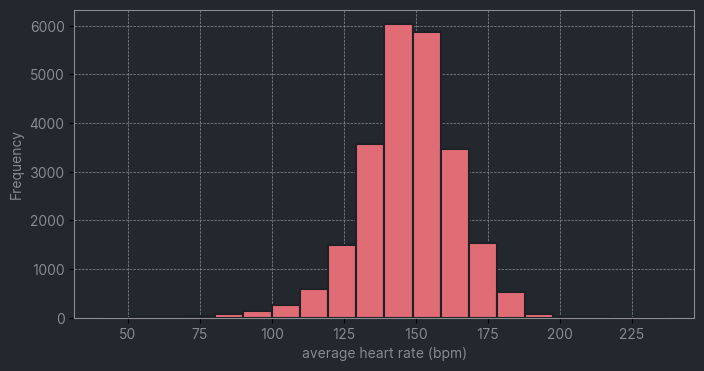

In [603]:
my_freqdist(data['average heart rate (bpm)'])

The data is slightly skewed to the right.

In [604]:
print("skewness: %f" % data['average heart rate (bpm)'].skew())
print("kurtosis: %f" % data['average heart rate (bpm)'].kurt())

skewness: -0.538677
kurtosis: 1.923665


In [605]:
from sklearn.preprocessing import StandardScaler

# standardise the data PER athlete
data['standardised_hr'] = data.groupby('athlete')['average heart rate (bpm)'].transform(lambda x: (x - x.mean()) / x.std())

# flag the row if hr standard deviation is too large
data['flag'] = (data['standardised_hr'] > 5.0) | (data['standardised_hr'] < -3)

data[(data['flag'] == True)]

athlete           timestamp  distance (m)  elapsed time (s)  \
334     7191483 2019-01-06 09:02:00       13323.6              3817   
821    10825360 2019-11-21 18:10:00       11387.0              3665   
823    10825360 2019-11-17 08:41:00        1897.0               795   
845    10825360 2019-10-06 07:32:00        1788.0               667   
849    10825360 2019-10-05 05:39:00        1512.0               611   
...         ...                 ...           ...               ...   
41257   5035018 2019-01-17 10:32:00       19338.3             12720   
41413   5035018 2018-02-13 19:08:00        1608.0               854   
41499   5035018 2017-08-15 19:11:00        1517.1               984   
41501   5035018 2017-08-15 17:42:00        1547.7               702   
42018  27950722 2018-10-02 17:09:00        7045.6              2888   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
334                 134.7                      62.0       4.774736   
821                 160.0                     104.6       5.364304   
823                  30.0                     106.4       6.984713   
845                   5.0                     118.3       6.217375   
849                   0.0                     113.9       6.735009   
...                   ...                       ...            ...   
41257              1285.8                     123.5      10.962701   
41413                 2.4                     116.6       8.851575   
41499                19.1                     121.5      10.810098   
41501                 2.2                     124.3       7.559605   
42018                27.9                     101.3       6.831687   

       standardised_hr  flag  
334          -6.352060  True  
821          -4.703039  True  
823          -4.571985  True  
845          -3.705567  True  
849          -4.025923  True  
...                ...   ...  
41257        -3.746396  True  
41413        -4.460997  True  
41499        -3.953527  True  
41501        -3.663544  True  
42018        -3.587090  True  

[219 rows x 9 columns]

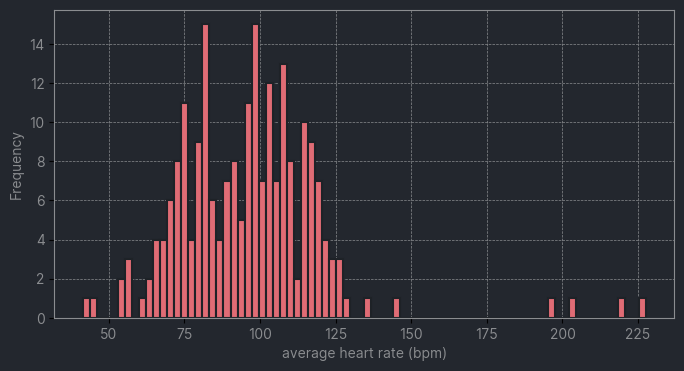

In [606]:
my_freqdist(data[(data['flag'] == True)]["average heart rate (bpm)"], n_bins=80)

Drop the rows that have an outlier heart rate, considering each athlete's individual mean heart rate.

In [607]:
data.drop(data[data['flag'] == True].index, inplace=True)
print(f"I've now got {data.shape[0]} data points")

I've now got 23481 data points


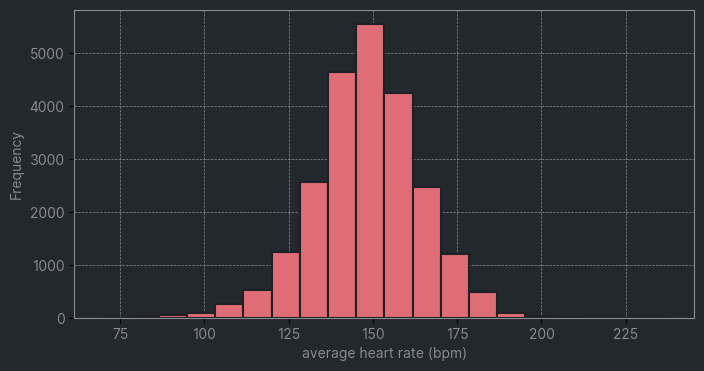

In [608]:
my_freqdist(data['average heart rate (bpm)'])

### **Univariate Analysis: Distance**

From the previous step, I know that no distance values are missing. Let's check if any distance values are 0.

In [609]:
data[data["elevation gain (m)"] == 0]

athlete           timestamp  distance (m)  elapsed time (s)  \
114    18042525 2018-01-09 19:46:00        2126.2               726   
161    18042525 2017-05-04 16:09:00        9539.6              2972   
163    18042525 2017-04-27 16:37:00        6177.7              1679   
167    18042525 2017-04-17 15:17:00        5160.3              1405   
170    18042525 2017-03-31 16:49:00        5253.1              1419   
...         ...                 ...           ...               ...   
41292   5035018 2018-11-14 18:47:00         447.5               204   
41304   5035018 2018-10-17 17:43:00         548.6               215   
41519   5035018 2017-07-02 08:36:00        1483.1               431   
41559   5035018 2017-03-20 12:40:00        2725.1               803   
42010  27950722 2018-11-04 10:02:00        4845.2              1604   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
114                   0.0                     123.0       5.690904   
161                   0.0                     143.4       5.192391   
163                   0.0                     158.0       4.529733   
167                   0.0                     154.0       4.537850   
170                   0.0                     158.7       4.502104   
...                   ...                       ...            ...   
41292                 0.0                     151.3       7.597765   
41304                 0.0                     150.3       6.531778   
41519                 0.0                     161.2       4.843459   
41559                 0.0                     161.9       4.911135   
42010                 0.0                     149.3       5.517488   

       standardised_hr   flag  
114          -1.630601  False  
161          -0.026524  False  
163           1.121492  False  
167           0.806967  False  
170           1.176534  False  
...                ...    ...  
41292        -0.867276  False  
41304        -0.970842  False  
41519         0.158022  False  
41559         0.230517  False  
42010        -0.193002  False  

[1208 rows x 9 columns]

In [610]:
print(f'There are {data[data["distance (m)"] == 0].shape[0]} rows without distance data')
print(f'All rows missing distance are also missing elevation: {np.all(data[data["distance (m)"] == 0] == data[(data["distance (m)"] == 0) & (data["elevation gain (m)"] == 0)])}')
data[(data["distance (m)"] == 0) & (data["elapsed time (s)"] < 10)]

There are 22 rows without distance data
All rows missing distance are also missing elevation: True


athlete           timestamp  distance (m)  elapsed time (s)  \
8032    6215611 2018-04-21 14:32:00           0.0                 4   
13893  12740383 2019-12-18 06:38:00           0.0                 2   
40981   5688059 2014-01-21 20:10:00           0.0                 4   
40986   5688059 2014-01-15 19:42:00           0.0                 4   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
8032                  0.0                     111.3            inf   
13893                 0.0                     119.0            inf   
40981                 0.0                     123.0            inf   
40986                 0.0                     114.0            inf   

       standardised_hr   flag  
8032         -1.680656  False  
13893        -1.868945  False  
40981        -1.986620  False  
40986        -2.644202  False

Many of the rows without distance also have unrealistically short elapsed time. All of the rows without distance are also missing elevation gain. As the rows missing distance are also missing other data, I'll delete them instead of imputing the missing data. This will prevent the creation of data points that are too artificial.

In [611]:
data.drop(data[data["distance (m)"] == 0.0].index, inplace=True)
print(f"I've now got {data.shape[0]} data points")

I've now got 23459 data points


**Remove sprint distances, too** - these could distort the model by creating a more complicated 'surface'

Above distances of 1500m (~1 mile), there is a significantly higher proportion of aerobic activity compared to shorter distances. Anecdotally, this is also the distance above which most non-runners cannot complete while running throughout. Therefore, I'll use this as our cut-off point. 

<[source](https://readysetmarathon.com/what-is-considered-distance-running/)>


In [612]:
data.drop(data[data["distance (m)"] < 1500].index, inplace=True)
print(f"I've now got {data.shape[0]} data points")

I've now got 23017 data points


In [613]:
print(f'Longest distance: {data["distance (m)"].max()}')
data[data["distance (m)"] == data["distance (m)"].max()]

Longest distance: 218950.0


athlete           timestamp  distance (m)  elapsed time (s)  \
16127  17639804 2018-10-18 19:59:00      218950.0             96372   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
16127              9729.0                     134.0       7.335921   

       standardised_hr   flag  
16127        -1.099759  False

The data row with the longest distance is implausible. The elapsed time is greater than a day, and the elevation gain is greater than Mount Everest. I'll go through time and elevation later on, so I'll leave this row in here for now.

### **Univariate Analysis: Elevation**

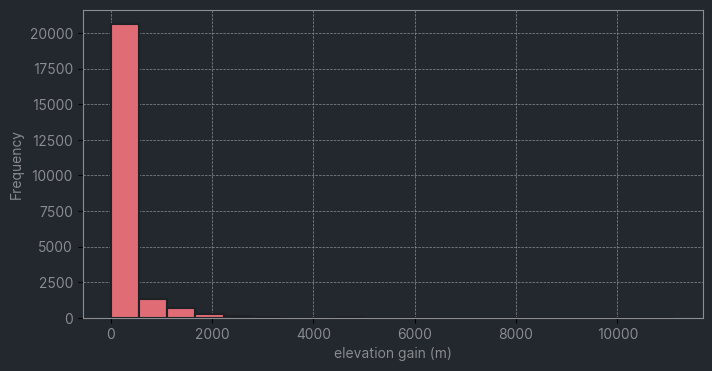

In [614]:
my_freqdist(data["elevation gain (m)"])

Elevation can't be eliminated on the basis of standard deviation. Outliers of elevation can still be perfectly valid. Therefore, I must eliminate based on what is actually possible and what is productive towards creating a good generalisable dataset.

In [615]:
print(f'Highest elevation gain: {data["elevation gain (m)"].max()} m')
print(f'{data[data["elevation gain (m)"] > 8849].shape[0]} rows with elevation gain higher than Mount Everest')

Highest elevation gain: 11128.0 m
2 rows with elevation gain higher than Mount Everest


The highest elevation gain in the data is 11,128 m. This is taller than Mount Everest, which is "only" 8,849 m high. I'll delete the row

In [616]:
data.drop(data[data["elevation gain (m)"] > 8849].index, inplace=True)

To assess whether a high elevation gain is valid, I'll do some **feature engineering** and construct a new feature: **gradient**, which is elevation divided by distance, expressed as a percentage.

In [617]:
data["gradient (%)"] = (data["elevation gain (m)"]/data["distance (m)"])*100
data[data["elevation gain (m)"] > 5000]

athlete           timestamp  distance (m)  elapsed time (s)  \
1031   10825360 2018-08-25 03:03:00       84278.0             52978   
13979  12740383 2019-06-28 02:00:00       90281.0             55226   
16161  17639804 2018-08-25 03:03:00       84149.3             47334   
40687   5688059 2016-05-06 03:08:00      126145.0             66815   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
1031               5450.0                     157.5      10.476835   
13979              5736.0                     141.0      10.195205   
16161              5245.0                     146.4       9.375004   
40687              7547.7                     131.3       8.827804   

       standardised_hr   flag  gradient (%)  
1031         -0.851487  False      6.466694  
13979        -0.448842  False      6.353496  
16161        -0.104441  False      6.232969  
40687        -1.380183  False      5.983352

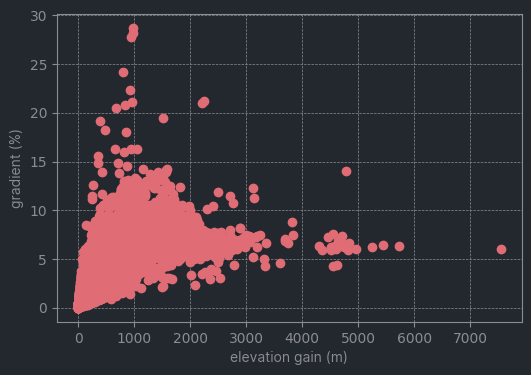

In [618]:
my_xyscatter(data["elevation gain (m)"], data["gradient (%)"])

From the graphical analysis above, I can see that the data points with very high elevation gain also have fairly normal gradient. The data points with very high gradient do not have implausible elevation. Therefore, I don't have data to eliminate on the basis of high elevation.

In [619]:
data[data["elevation gain (m)"] == 0.0]

athlete           timestamp  distance (m)  elapsed time (s)  \
114    18042525 2018-01-09 19:46:00        2126.2               726   
161    18042525 2017-05-04 16:09:00        9539.6              2972   
163    18042525 2017-04-27 16:37:00        6177.7              1679   
167    18042525 2017-04-17 15:17:00        5160.3              1405   
170    18042525 2017-03-31 16:49:00        5253.1              1419   
...         ...                 ...           ...               ...   
41098   5035018 2019-11-13 18:12:00        2801.0               624   
41137   5035018 2019-09-18 17:23:00        1843.0               709   
41284   5035018 2018-12-05 18:12:00        5087.7              1245   
41559   5035018 2017-03-20 12:40:00        2725.1               803   
42010  27950722 2018-11-04 10:02:00        4845.2              1604   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
114                   0.0                     123.0       5.690904   
161                   0.0                     143.4       5.192391   
163                   0.0                     158.0       4.529733   
167                   0.0                     154.0       4.537850   
170                   0.0                     158.7       4.502104   
...                   ...                       ...            ...   
41098                 0.0                     151.7       3.712960   
41137                 0.0                     155.8       6.411648   
41284                 0.0                     164.1       4.078464   
41559                 0.0                     161.9       4.911135   
42010                 0.0                     149.3       5.517488   

       standardised_hr   flag  gradient (%)  
114          -1.630601  False           0.0  
161          -0.026524  False           0.0  
163           1.121492  False           0.0  
167           0.806967  False           0.0  
170           1.176534  False           0.0  
...                ...    ...           ...  
41098        -0.825850  False           0.0  
41137        -0.401232  False           0.0  
41284         0.458361  False           0.0  
41559         0.230517  False           0.0  
42010        -0.193002  False           0.0  

[1006 rows x 10 columns]

In [620]:
print('There are {} rows with 0.0 elevation'.format(len(data[data["elevation gain (m)"] == 0.0])))

There are 1006 rows with 0.0 elevation


There is no way to tell if a data point with 0.0 elevation is truly invalid, so I won't delete any of these data points.

### **Univariate Analysis: Pace**

This is an engineered feature that indicates how fast an athlete was running on average.

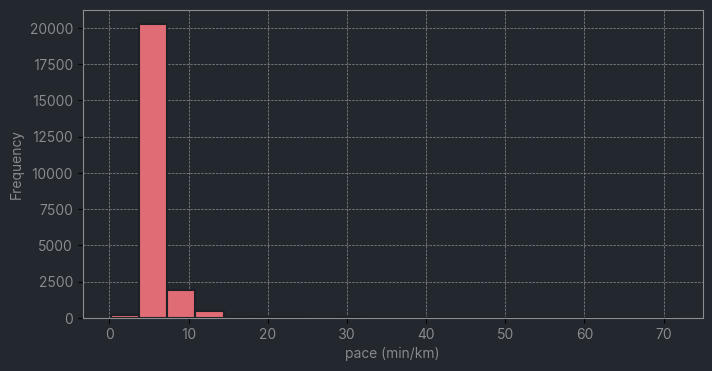

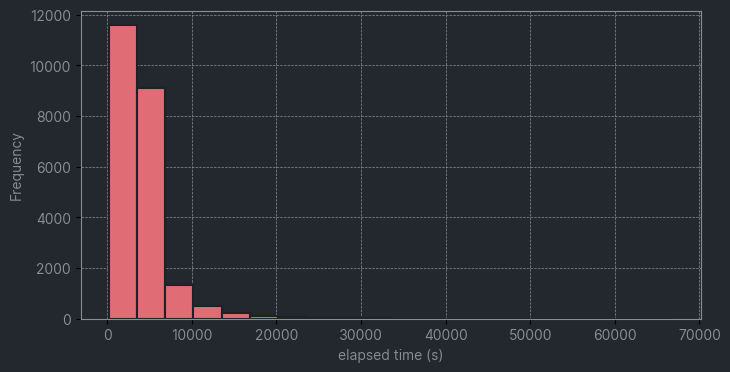

In [621]:
my_freqdist(data["pace (min/km)"])
my_freqdist(data["elapsed time (s)"])

Slow average pace are still valid and can still appear in the deployed incoming data, so I will leave these values in. However, I can eliminate paces that are impossibly fast as these are invalid.

In [622]:
print(f'Fastest pace {data["pace (min/km)"].min():.5f} min/km')
print(f'Slowest pace {data["pace (min/km)"].max():.5f} min/km')
print(f"World record 100m pace (Usain Bolt): {9.58/60/0.1:.5f} min/km")
print(f"World record 60m pace (Christian Coleman): {6.34/60/0.06:.5f} min/km")

Fastest pace 0.17581 min/km
Slowest pace 71.37915 min/km
World record 100m pace (Usain Bolt): 1.59667 min/km
World record 60m pace (Christian Coleman): 1.76111 min/km


In [623]:
print(f"Implausibly fast rows: {data[data['pace (min/km)'] < 1.59].size}")
print(f"Percentage of total: {data[data['pace (min/km)'] < 1.59].size/data.shape[0]*100:.2f} %")
data[data["pace (min/km)"] < 1.59]

Implausibly fast rows: 50
Percentage of total: 0.22 %


athlete           timestamp  distance (m)  elapsed time (s)  \
11128   3460571 2019-05-26 07:09:00       33105.1              2752   
12261   2913078 2016-10-17 17:03:00        2130.7               189   
13953  12740383 2019-08-23 23:22:00       41746.6              2001   
19643  18736169 2019-02-05 16:59:00       10683.0               399   
37941  22891135 2018-06-23 04:31:00       36593.1               386   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
11128               935.6                     144.4       1.385486   
12261                 0.0                     127.8       1.478387   
13953              2513.0                     123.6       0.798867   
19643                47.6                     135.3       0.622484   
37941               347.4                     144.7       0.175807   

       standardised_hr   flag  gradient (%)  
11128         0.460520  False      2.826151  
12261        -0.630577  False      0.000000  
13953        -1.572014  False      6.019652  
19643        -0.793141  False      0.445568  
37941        -0.394992  False      0.949359

As before, I stated that I would impute data if the affected rows were more than 2% but less than 10%. Therefore, I will delete these data points instead of imputing them.

In [624]:
data.drop(data[data["pace (min/km)"] < 1.59].index, inplace=True)

I can also delete paces that exceed the world record pace for long distances. For each race distance, I'll delete rows that have both a distance greater than that distance and a time shorter than the world record time for that distance.

In [625]:
fastest_distances = {
    '50k':
        {
            'time': 2*3600+40*60+13, 
            'distance': 50000
        },
    'marathon': 
        {
            'time': 2*3600+35, 
            'distance': 42195
        }, 
    'half': 
        {
            'time': 57*60+31, 
            'distance': 42195/2
        }, 
    '15k': 
        {
            'time': 44*60+14, 
            'distance': 15000
        }, 
    '12k': 
        {
            'time': 35*60+57, 
            'distance': 12000
        }, 
    '10k': 
        {
            'time': 26*60+11, 
            'distance': 10000
        }, 
    '8k': 
        {
            'time': 22*60+39, 
            'distance': 8000
        }, 
    '5k': 
        {
            'time': 13*60+38, 
            'distance': 5000
        }, 
    '1500m': 
        {
            'time': 3*60+26, 
            'distance': 1500
        }
    }

def valid_pace(row):

    for field in fastest_distances:
        if ((row['distance (m)'] > fastest_distances[field]['distance']) & (row['elapsed time (s)'] < fastest_distances[field]['time'])):
            return True

data["flag"] = data.apply(valid_pace, axis=1)
data[data["flag"]==True]

athlete           timestamp  distance (m)  elapsed time (s)  \
6716    7947798 2015-11-18 18:36:00        1868.8               202   
12194   2913078 2017-02-04 16:24:00        1579.7               184   
19644  18736169 2019-02-04 17:45:00       15906.0              1914   
29568   2138770 2018-10-16 11:38:00       43630.2              6673   
29580   2138770 2018-09-03 14:52:00       67299.7              7953   
31278  12642956 2019-01-27 08:07:00       15070.0              1926   
31808  11284478 2017-05-26 06:30:00       22841.0              2537   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
6716                  0.0                     157.7       1.801513   
12194                 0.0                      91.9       1.941297   
19644               211.9                     126.8       2.005533   
29568               453.2                     139.3       2.549075   
29580               584.0                     134.6       1.969548   
31278               159.0                     164.3       2.130060   
31808              1175.0                     163.3       1.851203   

       standardised_hr  flag  gradient (%)  
6716          1.802741  True      0.000000  
12194        -2.253710  True      0.000000  
19644        -1.324577  True      1.332202  
29568        -0.420376  True      1.038730  
29580        -0.712452  True      0.867760  
31278         0.487835  True      1.055076  
31808         0.832833  True      5.144258

In [626]:
data.drop(data[data['flag'] == True].index, inplace=True)

### **Univariate Analysis: Timestamp**

I'll do more feature engineering and construct another feature that indicates the time since the data point was performed. This is because runs that are more recent will be more indicative of future performance.

In [627]:
# Calculate the amount of time since that run - the datum doesn't matter 

data["time ago (s)"] = datetime(2023, 1, 1) - data["timestamp"]

data["time ago (s)"] = data["time ago (s)"].apply(lambda x: x.total_seconds())

data.head()

athlete           timestamp  distance (m)  elapsed time (s)  \
0  18042525 2019-12-15 09:08:00        2965.8               812   
1  18042525 2019-12-10 19:27:00       10020.8              3290   
2  18042525 2019-12-03 19:46:00       12132.2              4027   
3  18042525 2019-11-26 19:46:00       11631.5              4442   
4  18042525 2019-11-19 19:45:00       11708.1              4022   

   elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
0                17.4                     150.3       4.563131   
1                52.2                     160.8       5.471952   
2               249.0                     148.9       5.532110   
3               194.0                     136.2       6.364900   
4               250.7                     146.0       5.725381   

   standardised_hr  flag  gradient (%)  time ago (s)  
0         0.516032  None      0.586688    96130320.0  
1         1.341660  None      0.520916    96525180.0  
2         0.405948  None      2.052390    97128840.0  
3        -0.592669  None      1.667885    97733640.0  
4         0.177917  None      2.141253    98338500.0

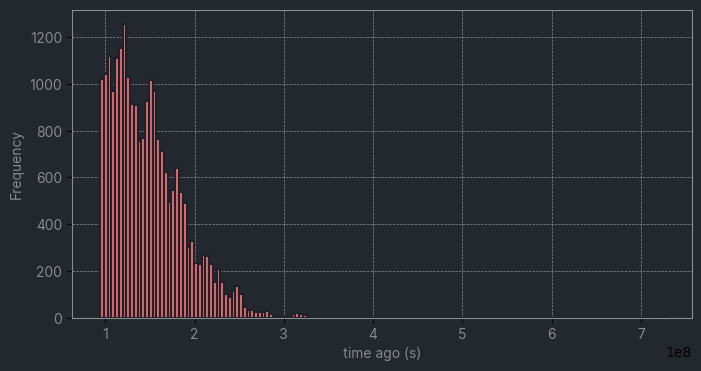

In [628]:
my_freqdist(data["time ago (s)"],n_bins=150)

In [629]:
print(f'Newest data point: {max(data["timestamp"])}')
print(f'Oldest data point: {min(data["timestamp"])}')

Newest data point: 2020-01-06 05:24:00
Oldest data point: 2000-01-04 12:06:00


The timestamp column has no problems.

## **Feature Scaling**

### **Frequency Distributions & Transformation**

In [630]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import yeojohnson

#### **Elevation**

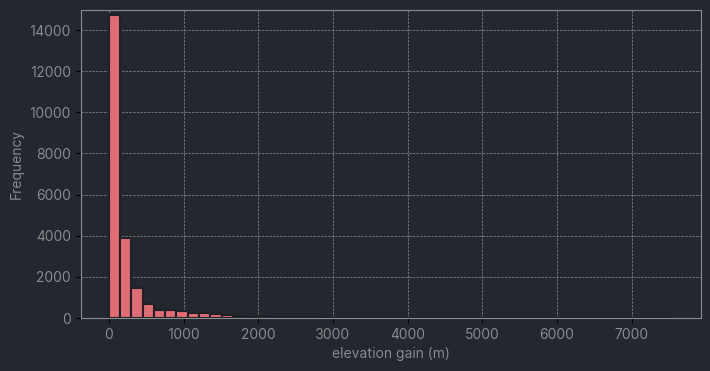

Skewness: 4.31
Kurtosis: 29.22


In [631]:
x = data["elevation gain (m)"]

my_freqdist(x,n_bins=50, ylim=[0,15000])

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

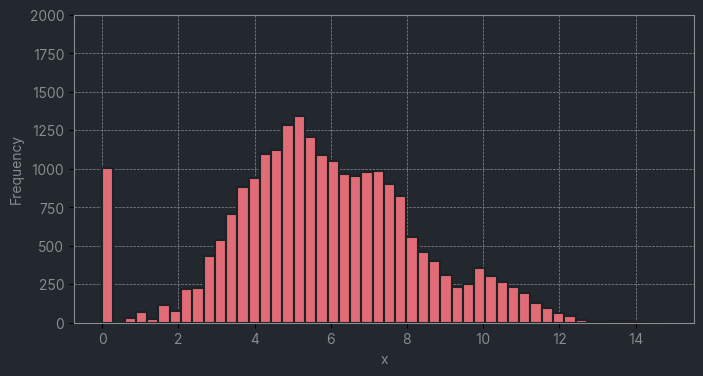

Skewness: 0.01
Kurtosis: 0.23


In [632]:
from scipy.stats import boxcox

x = boxcox(data["elevation gain (m)"]+1)[0]

my_freqdist(x,n_bins=50, ylim=[0,2000])

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

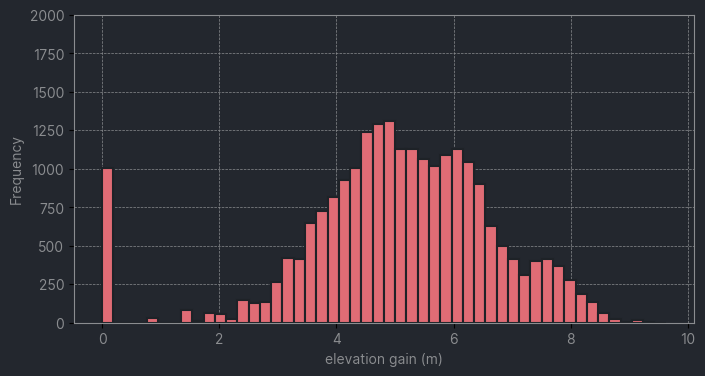

Skewness: -0.84
Kurtosis: 1.46


In [633]:
x = np.arcsinh(data["elevation gain (m)"])

my_freqdist(x,n_bins=50, ylim=[0,2000])

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

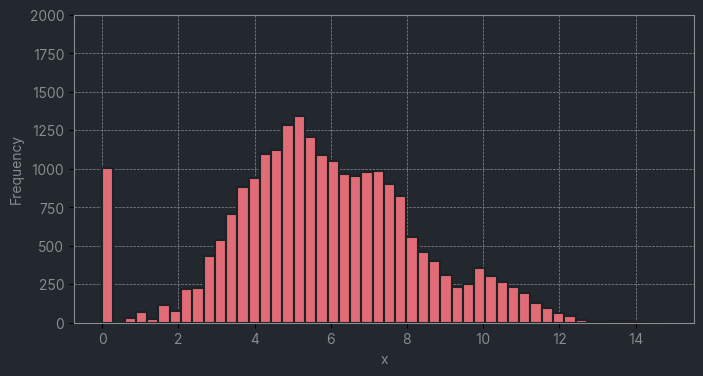

Skewness: 0.01
Kurtosis: 0.23


In [634]:
x = yeojohnson(data["elevation gain (m)"])[0]

my_freqdist(x,n_bins=50, ylim=[0,2000])

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

I will use Yeo-Johnson to scale Elevation

In [635]:
data["elevation"] = yeojohnson(data["elevation gain (m)"])[0]

#### **Distance**

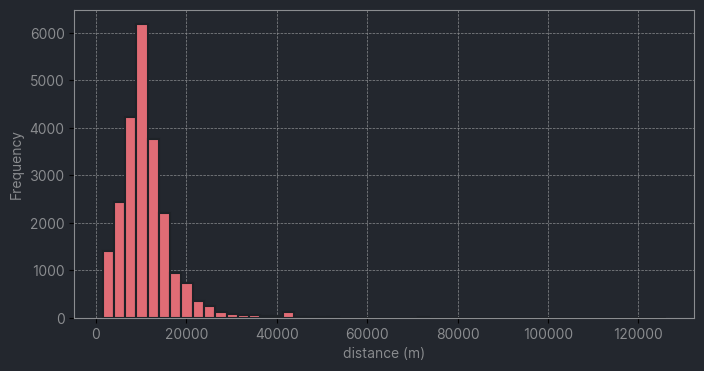

Skewness: 3.39
Kurtosis: 26.19


In [636]:
x = data['distance (m)']

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

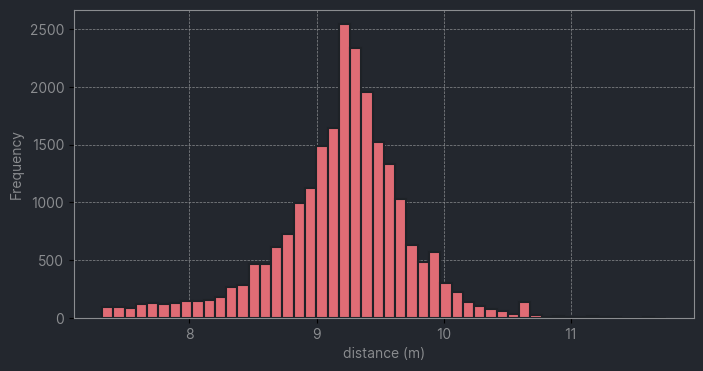

Skewness: -0.56
Kurtosis: 1.73


In [637]:
x = np.log(data["distance (m)"])

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

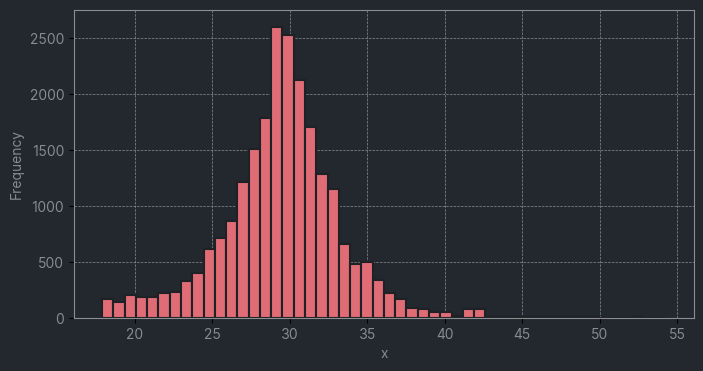

Skewness: 0.07
Kurtosis: 1.90


In [638]:
x = boxcox(data["distance (m)"])[0]

my_freqdist(x,n_bins=50, ylim=[0,2750])

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

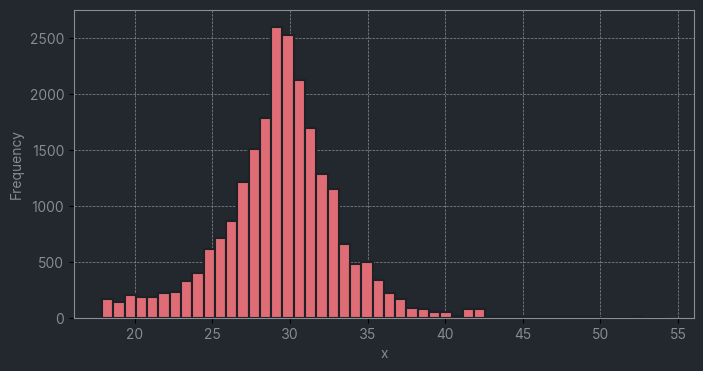

Skewness: 0.07
Kurtosis: 1.90


In [639]:
x = yeojohnson(data["distance (m)"])[0]

my_freqdist(x,n_bins=50, ylim=[0,2750])

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

I will use Yeo-Johnson to scale Distance.

In [640]:
data["distance"] = yeojohnson(data["distance (m)"])[0]

#### **Heart Rate**

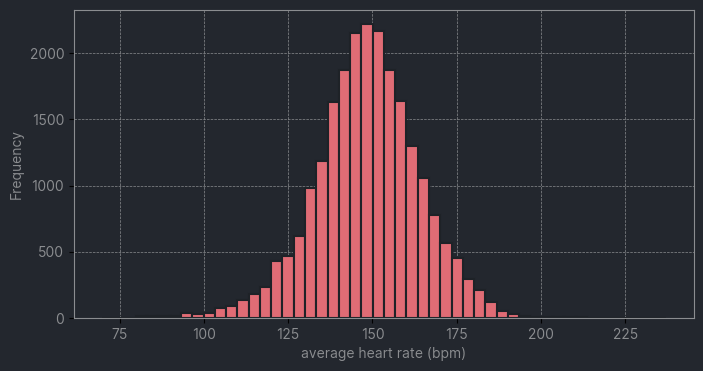

Skewness: -0.22
Kurtosis: 0.94


In [641]:
x = data['average heart rate (bpm)']

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

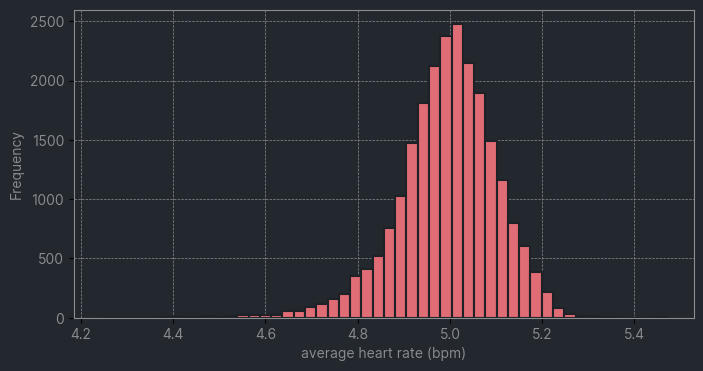

Skewness: -0.74
Kurtosis: 2.11


In [642]:
x = np.log(data['average heart rate (bpm)'])

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Heart Rate does not need to be transformed as it is already highly normally distributed.

In [643]:
data["hr"] = data['average heart rate (bpm)']

#### **Time Ago**

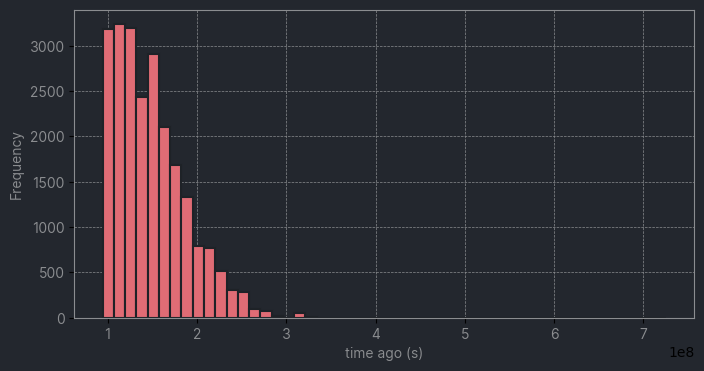

Skewness: 1.09
Kurtosis: 2.67


In [644]:
x = data["time ago (s)"]

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

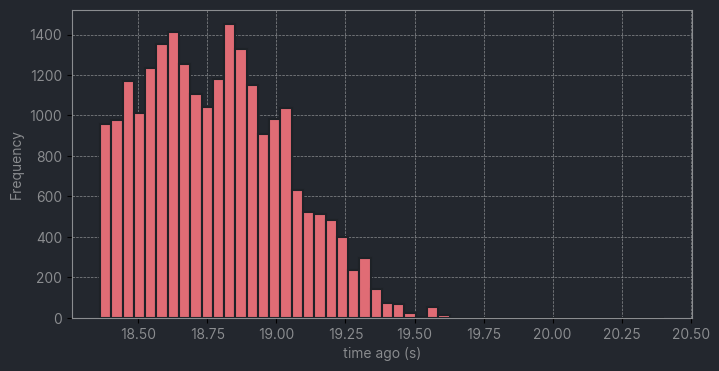

Skewness: 0.41
Kurtosis: -0.44


In [645]:
x = np.log(data["time ago (s)"])

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

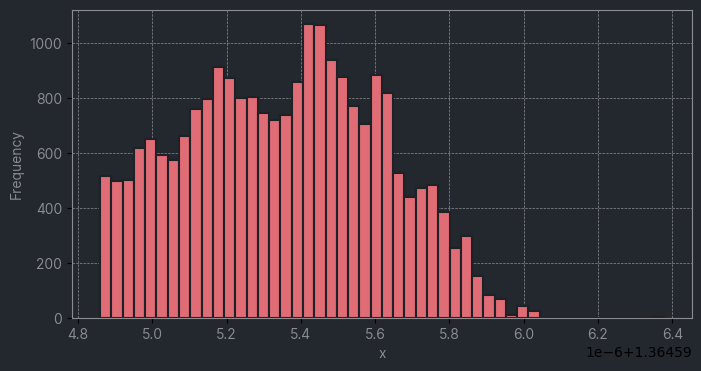

Skewness: 0.00
Kurtosis: -0.84


In [646]:
x = boxcox(data["time ago (s)"])[0]

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

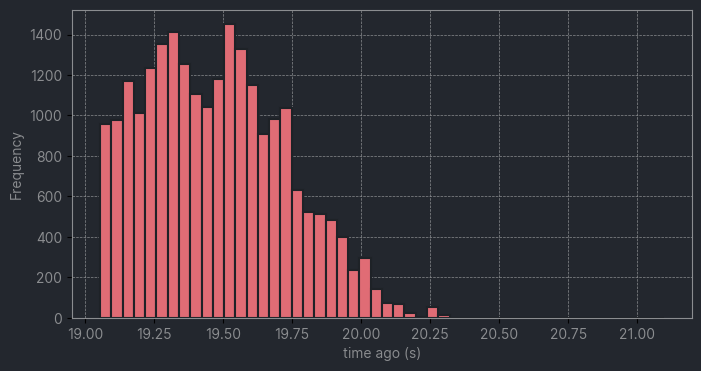

Skewness: 0.41
Kurtosis: -0.44


In [647]:
x = np.arcsinh(data["time ago (s)"])

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

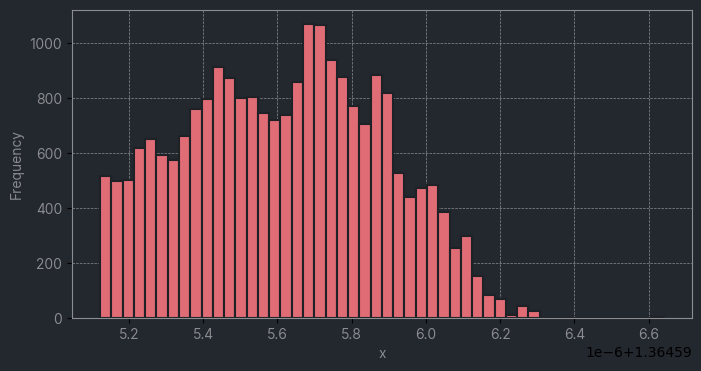

Skewness: 0.00
Kurtosis: -0.84


In [648]:
x = yeojohnson(data["time ago (s)"])[0]

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

I will also use Yeo-Johnson to scale Time-Ago

In [649]:
data["time_ago"] = yeojohnson(data["time ago (s)"])[0]

#### **Time**

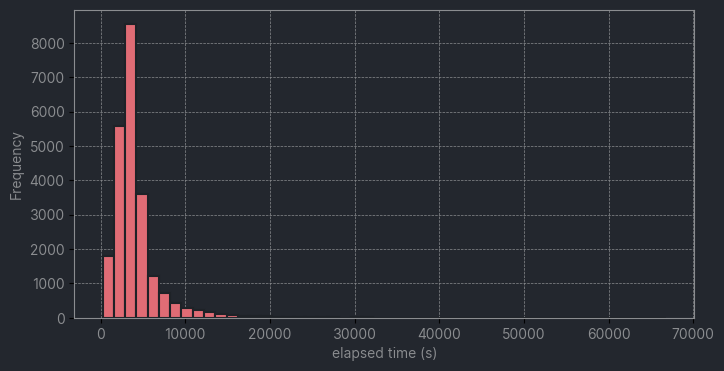

Skewness: 5.08
Kurtosis: 46.11


In [650]:
x = data["elapsed time (s)"]

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

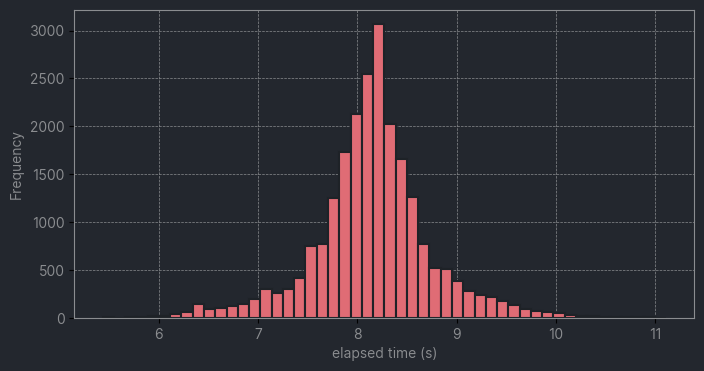

Skewness: -0.04
Kurtosis: 2.07


In [651]:
x = np.log(data["elapsed time (s)"])

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

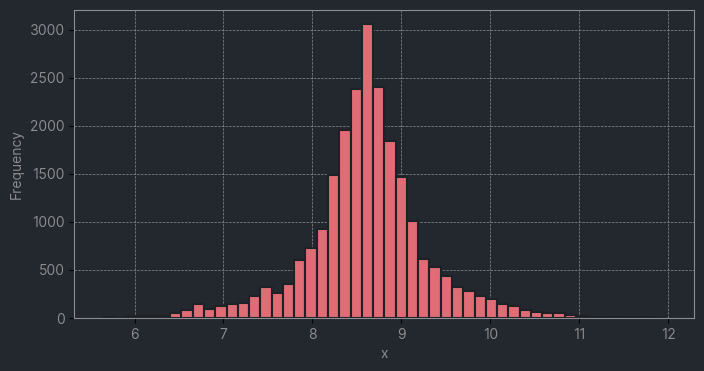

Skewness: 0.01
Kurtosis: 2.08


In [652]:
x = yeojohnson(data["elapsed time (s)"])[0]

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

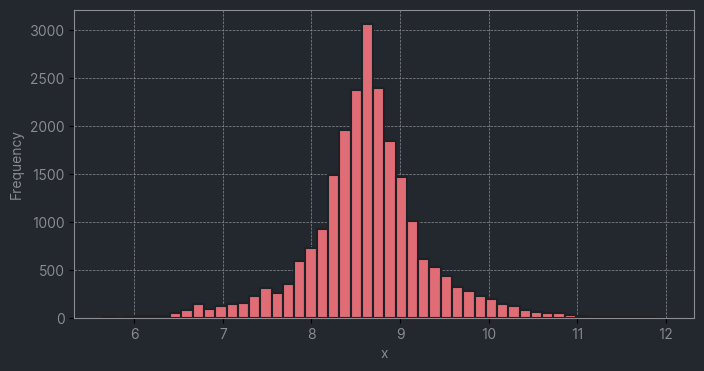

Skewness: 0.01
Kurtosis: 2.08


In [653]:
x = boxcox(data["elapsed time (s)"])[0]

my_freqdist(x,n_bins=50)

skewness = pd.Series(x).skew()
kurtosis = pd.Series(x).kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Yeo-Johnson and BoxCox perform identically. For consistency's sake, I'll use Yeo-Johnson to scale Time.

### **Summary of Transformations and Variables**

| **Variable** | **Type** | **Transform** |
|--------------|----------|---------------|
| Distance     | Input    | Yeo-Johnson    |
| Elevation    | Input    | Yeo-Johnson    |
| HR           | Input    | None           |
| Time-Ago     | Input    | Yeo-Johnson    |
| Time         | Output   | Yeo-Johnson    |


### **Scaling**

In [654]:
from sklearn.preprocessing import MinMaxScaler

In [655]:
# def rescale(series):
#     '''
#     Uses min-max scaling on a pandas Series
#     '''

#     return (series - series.min()) / (series.max() - series.min())

# def minmax_scale(x_train, 
#                  x_test=None, 
#                  y_train=None, y_test=None):
#     '''
#     Uses min-max scaling to scale the train and test data sets according to the min-max of the train dataset only.
#     '''

#     must_flatten_x = False
#     must_flatten_y = False

#     scaler = MinMaxScaler(feature_range=(0, 1))

#     try:
#         scaler = scaler.fit(x_train)
#     except ValueError:
#         must_flatten_x = True

#         try:
#             x_train = x_train.reshape(-1,1)        
#         except AttributeError:
#             x_train = x_train.values.reshape(-1,1)      
            

#         scaler = scaler.fit(x_train)

#     x_train = scaler.transform(x_train)

#     if x_test is not None:

#         if must_flatten_x:
#             try:
#                 x_test = x_test.reshape(-1,1)
#             except AttributeError:
#                 x_test = x_test.values.reshape(-1,1)
#         else:
#             x_test = scaler.transform(x_test)

#     if y_train is not None and y_test is not None:

#         scaler = MinMaxScaler(feature_range=(0, 1))

#         try:
#             scaler = scaler.fit(y_train)
#         except ValueError:
#             must_flatten_y = True
#             try:
#                 y_train = y_train.reshape(-1,1)
#                 y_test = y_test.reshape(-1,1)
#             except AttributeError:
#                 y_train = y_train.values.reshape(-1,1)
#                 y_test = y_test.values.reshape(-1,1)

#         scaler = scaler.fit(y_train)

#         y_train = scaler.transform(y_train)
#         y_test = scaler.transform(y_test)

#         if must_flatten_x:
#             x_train = x_train.flatten()
#             x_test = x_test.flatten()
#         if must_flatten_y:
#             y_train = y_train.flatten()
#             y_test = y_test.flatten()

#         return x_train, x_test, y_train, y_test
#     else:
#         if x_test is None:
#             if must_flatten_x:
#                 x_train = x_train.flatten()
#             return x_train
#         else:
#             if must_flatten_x:
#                 x_train = x_train.flatten()
#                 x_test = x_test.flatten()
#             return x_train, x_test

    # x_max = x_train.max()
    # x_min = x_train.min()
    # x_train = (x_train-x_min)/(x_max-x_min)

    # if x_test is not None:
    #     x_test  = (x_test -x_min)/(x_max-x_min)

    # if y_train is not None and y_test is not None:
    #     y_max = y_train.max()
    #     y_min = y_train.min()
    #     y_train = (y_train-y_min)/(y_max-y_min)
    #     y_test  = (y_test -y_min)/(y_max-y_min)
        
    #     return x_train, x_test, y_train, y_test
    
    # else:
    #     if x_test is None:
    #         return x_train
    #     else:
    #         return x_train, x_test

# def yj_transform(train_set, test_set=None):
#     '''
#     Uses Yeo-Johnson to scale the train and test data sets according to the distribution of the train dataset only. 
    
#     Returns the power transformer fitted for the train set, and the transformed+maxmin scaled train set (and test set if the test set was provided)
#     '''

#     yjpt = PowerTransformer(method='yeo-johnson')

#     train_set_transformed = yjpt.fit_transform(train_set.values.reshape(-1,1))
#     train_set_transformed = train_set_transformed.flatten()

#     if test_set is not None:
#         test_set_transformed = yjpt.transform(test_set.values.reshape(-1,1))

#         test_set_transformed = test_set_transformed.flatten()

#         test_set_transformed

#         train_set_transformedscaled, test_set_transformedscaled = minmax_scale(train_set_transformed, test_set_transformed)

#         return yjpt, train_set_transformedscaled, test_set_transformedscaled, train_set_transformed, test_set_transformed
    
#     else:

#         train_set_transformedscaled = minmax_scale(train_set_transformed)

#         return yjpt, train_set_transformedscaled, train_set_transformed

def yj_transform(train_set, test_set=None):
    '''
    Uses Yeo-Johnson to scale the train and test data sets according to the distribution of the train dataset only. 
    
    Returns the power transformer fitted for the train set, transformed train set, and transformed test set if a test set was provided
    '''

    yjpt = PowerTransformer(method='yeo-johnson')

    train_set_transformed = yjpt.fit_transform(train_set.values.reshape(-1,1))
    train_set_transformed = train_set_transformed.flatten()

    if test_set is not None:
        test_set_transformed = yjpt.transform(test_set.values.reshape(-1,1))

        test_set_transformed = test_set_transformed.flatten()

        return yjpt, train_set_transformed, test_set_transformed
    
    else:

        return yjpt, train_set_transformed

## **Pre-Visualising the Relationshing**

Let's plot 3 variables against each other as the 3D space will allow us to easily visualise the correlations.

In [656]:
athletes = data["athlete"].unique()
athlete_idx = 6

my_scatter(x=data.loc[data["athlete"] == athletes[athlete_idx]]["average heart rate (bpm)"],
           y=data.loc[data["athlete"] == athletes[athlete_idx]]["distance (m)"],
           z=data.loc[data["athlete"] == athletes[athlete_idx]]["elapsed time (s)"],
           c=data.loc[data["athlete"] == athletes[athlete_idx]]["time ago (s)"],
           height=600)

In [657]:
my_scatter(x=data.loc[data["athlete"] == athletes[athlete_idx]]["average heart rate (bpm)"],
           y=data.loc[data["athlete"] == athletes[athlete_idx]]["distance (m)"],
           z=data.loc[data["athlete"] == athletes[athlete_idx]]["pace (min/km)"],
           c=data.loc[data["athlete"] == athletes[athlete_idx]]["gradient (%)"],
           height=600)

Plotting Pace instead of Time shows that Time is a much more predictable variable to correlate, and that I was correct in using Time as a predictor instead of Pace.

Now that the data is processed and normalised, I'll create an initial Neural Network (NN) to see the minimum number of nodes to capture the input/output map with at least 90% accuracy for a given user. This will allow me to decide whether a helper model for fine-tuning is feasible.

The possible outcomes will be:
* Low number of nodes: the output of the helper fine-tuning model can be the changes to weights and biases for each node
* High number of nodes: there are too many weights and biases to create a neural network with these as outputs - I'll have to fine tune base models directly, and probably use a greater number of clusters 
* Accuracy can't be captured with 90% accuracy: this indicates that there is poor correlation of the input with the output

## **EDA Conclusion**

The EDA has now been completed. The data is cleaned, transformed and scaled.

# **Model Strategy**

Each athlete has 1 model etc.

# **Train-Test Split**

I will split my data not randomly, but according to how much many runs each athlete has. The athletes with too few runs to be useful will be used for testing.

don't transform entire datasets. Transform for each base model

In [658]:
len(data["athlete"].unique())

106

In [659]:
athlete_counts = data['athlete'].value_counts()
data['row_count'] = data['athlete'].map(athlete_counts)
print(f"There are {data.drop_duplicates(subset='athlete').sort_values(by='row_count')[data['row_count']<30].shape[0]} athletes with fewer than 30 data points")


There are 10 athletes with fewer than 30 data points


C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\2565965533.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [660]:
data.drop_duplicates(subset='athlete')[['athlete', 'row_count']].sort_values(by='row_count').head(10)

athlete  row_count
38422  25277048          1
37284  20557028          1
29069  28252317          6
36933  38870390          8
280    20263706         13
7119   22972731         17
19328  39076296         20
12938  27479582         22
38504   6583234         23
35598  13435425         26

In [661]:
ath_mostruns = data.drop_duplicates(subset='athlete')[data["row_count"]==data["row_count"].max()]["athlete"].values[0]

data[data["athlete"]==ath_mostruns].sort_values(by='average heart rate (bpm)', ascending=False)


C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\2129297842.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



athlete           timestamp  distance (m)  elapsed time (s)  \
39389  19023831 2019-01-18 05:16:00        8431.5              2506   
39607  19023831 2018-03-21 08:23:00        8534.5              2520   
39714  19023831 2017-10-02 03:42:00        8997.4              3026   
39516  19023831 2018-07-25 05:35:00        6863.5              2303   
39202  19023831 2019-10-24 04:26:00       10314.4              3055   
...         ...                 ...           ...               ...   
39652  19023831 2018-01-07 10:10:00        4010.0              1145   
39598  19023831 2018-04-07 08:23:00        5038.9              1359   
39513  19023831 2018-07-29 08:03:00        2029.6               962   
39875  19023831 2017-01-29 10:46:00       28839.3              9758   
39594  19023831 2018-04-12 18:19:00        1835.9               720   

       elevation gain (m)  average heart rate (bpm)  pace (min/km)  \
39389                18.7                     188.4       4.953646   
39607               100.8                     187.0       4.921202   
39714                67.6                     184.9       5.605323   
39516                47.0                     182.0       5.592385   
39202                38.0                     179.7       4.936464   
...                   ...                       ...            ...   
39652                14.7                     110.2       4.758936   
39598                21.4                     109.4       4.495029   
39513                 9.7                     107.1       7.899750   
39875               247.5                     107.1       5.639295   
39594                 7.6                     106.6       6.536304   

       standardised_hr  flag  gradient (%)  time ago (s)  elevation  \
39389         4.199279  None      0.221787   124742640.0   3.499298   
39607         4.082550  None      1.181089   150910620.0   5.949740   
39714         3.907456  None      0.751328   165615480.0   5.321720   
39516         3.665661  None      0.684782   140034300.0   4.775544   
39202         3.473892  None      0.368417   100640040.0   4.467239   
...                ...   ...           ...           ...        ...   
39652        -2.320867  None      0.366584   157211400.0   3.192680   
39598        -2.387569  None      0.424696   149441820.0   3.676085   
39513        -2.579338  None      0.477927   139679820.0   2.690989   
39875        -2.579338  None      0.858204   186844440.0   7.469288   
39594        -2.621027  None      0.413966   148974060.0   2.414009   

        distance     hr  time_ago  row_count  
39389  28.112991  188.4  1.364595        689  
39607  28.199210  187.0  1.364596        689  
39714  28.576920  184.9  1.364596        689  
39516  26.685934  182.0  1.364596        689  
39202  29.574088  179.7  1.364595        689  
...          ...    ...       ...        ...  
39652  23.245431  110.2  1.364596        689  
39598  24.658745  109.4  1.364596        689  
39513  19.424414  107.1  1.364596        689  
39875  38.106808  107.1  1.364596        689  
39594  18.907790  106.6  1.364596        689  

[689 rows x 16 columns]

In [662]:
race_idx_19023831 = 39202 # index in data df for a race by athlete 19023831

In [663]:
my_iteractable_cumulative(data["row_count"].drop_duplicates())

In [953]:
train_athletes = data[data["row_count"]>=200].sort_values("row_count", ascending=False)["athlete"].drop_duplicates().values.tolist()

print(f'{len(train_athletes)} athletes will be used to train models')

test_athletes = data[data["row_count"]<200].sort_values("row_count", ascending=False)["athlete"].drop_duplicates().values.tolist()

print(f'{len(test_athletes)} athletes will be used to test models')

train_athletes

46 athletes will be used to train models
60 athletes will be used to test models


[19023831,
 17639804,
 23729907,
 3573750,
 10825360,
 6367873,
 20653961,
 16378210,
 2081128,
 10446972,
 18736169,
 22835898,
 5035018,
 6215611,
 7947798,
 5688059,
 11348733,
 18223349,
 5421161,
 5151970,
 3460571,
 19741163,
 5861500,
 12021072,
 25191153,
 15515123,
 11088529,
 11284478,
 3539760,
 22843389,
 14588097,
 20136629,
 2913078,
 16021442,
 22891135,
 34669133,
 1776170,
 26367918,
 21299972,
 12701438,
 14019837,
 12740383,
 34460713,
 18042525,
 22353493,
 12642956]

**quick and dirty test to see if it's feasible**

Using the athlete with the most data, I'll train a model on all of that athlete's runs, except for 1 run which took on 2018-09-23 06:52:00 that appears to be a race. I'll then predict on that point and assess the accuracy of the model. If the model is unable to predict accurately on this data point, then it may be infeasible to produce a generalisable model to predict any runner's race time.

In [665]:
# # transform all data for all athletes with the same fit

# import torch
# from sklearn.model_selection import train_test_split

# # create new columns for transformed+scaled data
# yjpt_distance, data["distance"] = yj_transform(data["distance (m)"])
# yjpt_elevation, data["elevation"] = yj_transform(data["elevation gain (m)"])
# data["hr"] = minmax_scale(data["average heart rate (bpm)"])
# yjpt_time, data["time"] = yj_transform(data["elapsed time (s)"])
# yjpt_timeago, data["time_ago"] = yj_transform(data["time ago (s)"])

# input_cols_scaled = ["distance", "elevation", "hr", "time_ago"]

# data[input_cols_scaled].apply(rescale)

# data[["athlete"]+input_cols_scaled].head()

# y_race = data.loc[race_idx_19023831]["time"]
# x_race = data.loc[race_idx_19023831][input_cols_scaled].values

# X = data[data["athlete"]==ath_mostruns][input_cols_scaled].drop(race_idx_19023831)
# y = data[data["athlete"]==ath_mostruns]["time"].drop(race_idx_19023831)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

# x_train = torch.tensor(x_train.values).float()
# y_train = torch.tensor(y_train.values).float()
# x_test = torch.tensor(x_test.values).float()
# y_test = torch.tensor(y_test.values).float()

I want to avoid activation functions such as Sigmoid, Softmax, ReLU and Tanh, especially in the output layer, as these have a fixed maximum and minimum. This is because it is very possible that data could be received that is outside the range of the original train set.

In [1893]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeakyReLU_NN(nn.Module):
    def __init__(self, hidden_nodes, seed=12):

        torch.manual_seed(seed)

        super().__init__()
        self.hidden1 = nn.Linear(4,hidden_nodes)
        self.actv1 = nn.LeakyReLU()
        self.hidden2 = nn.Linear(hidden_nodes,hidden_nodes)
        self.actv2 = nn.LeakyReLU()
        self.output = nn.Linear(hidden_nodes,1)
        self.actv_output = nn.LeakyReLU()

    def forward(self, x):
        x = self.actv1(self.hidden1(x))
        x = self.actv2(self.hidden2(x))
        x = self.actv_output(self.output(x))
        
        return x

In [668]:
# transform the variables wrt athlete 19023831 only
from sklearn.model_selection import train_test_split
import torch

input_cols = ["distance (m)", "elevation gain (m)", "average heart rate (bpm)", "time ago (s)"]

class athlete_data():

    def __init__(self, athletes, race_idx = None, device = None):

        if device is None:
            self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        else:
            self.device = torch.device(device)

        self.athlete = athletes
        self.race_idx = race_idx

        # extract the rows for the chosen athlete
        if race_idx is None:
            self.X = data[data["athlete"].isin(athletes)][input_cols+["pace (min/km)"]]
            self.y = data[data["athlete"].isin(athletes)]["elapsed time (s)"]
        else:
            self.X = data[data["athlete"].isin(athletes)][input_cols+["pace (min/km)"]].drop(self.race_idx)
            self.y = data[data["athlete"].isin(athletes)]["elapsed time (s)"].drop(self.race_idx)

        # split the train/test data
        self.x_train_, self.x_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.2, random_state=30)

        self.x_train = self.x_train_[input_cols]

        # initialise dataframes to store train/test data
        self.x_train_transformed = pd.DataFrame()
        self.y_train_transformed = pd.DataFrame()
        self.x_test_transformed = pd.DataFrame()
        self.y_test_transformed = pd.DataFrame()

        # transform the data, store the transformer objects
        self.yjpt_pace, self.pace_tranformed = yj_transform(self.x_train_["pace (min/km)"])
        self.pace_scaler = MinMaxScaler(feature_range=(0,1))
        self.pace_scaled = self.pace_scaler.fit_transform(self.pace_tranformed.reshape(-1,1))

        self.yjpt_distance, self.x_train_transformed["distance"], self.x_test_transformed["distance"] = yj_transform(self.x_train["distance (m)"], self.x_test["distance (m)"])

        self.yjpt_elevation, self.x_train_transformed["elevation"], self.x_test_transformed["elevation"] = yj_transform(self.x_train["elevation gain (m)"], self.x_test["elevation gain (m)"])
        
        self.x_train_transformed["hr"] = pd.Series(self.x_train["average heart rate (bpm)"].values)
        self.x_test_transformed["hr"] = pd.Series(self.x_test["average heart rate (bpm)"].values)

        self.yjpt_timeago, self.x_train_transformed["timeago"], self.x_test_transformed["timeago"] = yj_transform(self.x_train["time ago (s)"], self.x_test["time ago (s)"])

        # scale the data
        self.x_scaler = MinMaxScaler(feature_range=(0,1))
        self.x_scaler = self.x_scaler.fit(self.x_train_transformed)
        self.x_train_scaled = self.x_scaler.transform(self.x_train_transformed)
        self.x_test_scaled = self.x_scaler.transform(self.x_test_transformed)

        self.yjpt_time, self.y_train_transformed["time"], self.y_test_transformed["time"] = yj_transform(self.y_train, self.y_test)

        self.y_scaler = MinMaxScaler(feature_range=(0,1))
        self.y_scaler = self.y_scaler.fit(self.y_train_transformed.values)
        self.y_train_scaled = self.y_scaler.transform(self.y_train_transformed.values)
        self.y_test_scaled = self.y_scaler.transform(self.y_test_transformed.values)

        # convert from dataframe to np array (output from MinMaxScaler is always an array)
        self.x_train_vals = self.x_train_scaled.copy()
        self.x_test_vals = self.x_test_scaled.copy()
        self.y_train_vals = self.y_train_scaled.copy()
        self.y_test_vals = self.y_test_scaled.copy()

        # convert from np array to tensor
        self.x_train_tensor = torch.tensor(self.x_train_vals).float().to(self.device)
        self.x_test_tensor = torch.tensor(self.x_test_vals).float().to(self.device)
        self.y_train_tensor = torch.tensor(self.y_train_vals).float().to(self.device)
        self.y_test_tensor = torch.tensor(self.y_test_vals).float().to(self.device)

        if self.race_idx is not None:
            
            self.y_race = data.loc[self.race_idx]["elapsed time (s)"]
            self.x_race = data.loc[self.race_idx][input_cols].values

            # transform and scale the race row
            self.x_race_transformed = pd.DataFrame()
            self.x_race_transformed["distance"]=pd.Series(self.yjpt_distance.transform(self.x_race[0].reshape(-1,1))[0][0])
            self.x_race_transformed["elevation"]=pd.Series(self.yjpt_elevation.transform(self.x_race[1].reshape(-1,1))[0][0])
            self.x_race_transformed["hr"]=pd.Series(self.x_race[2])
            self.x_race_transformed["timeago"]=pd.Series(self.yjpt_timeago.transform(self.x_race[3].reshape(-1,1))[0][0])

            self.x_race_scaled = self.x_scaler.transform(self.x_race_transformed)
            self.x_race_tensor = torch.tensor([self.x_race_scaled]).float().to(self.device)

            self.y_race_transformed = self.yjpt_time.transform(self.y_race.reshape(-1,1))[0][0]
            self.y_race_scaled = self.y_scaler.transform(self.y_race_transformed.reshape(1,-1))

    def y2minutes(self, y_pred):
        '''
        converts the predicted y-value by reverse scaling, then reverse transforming, to get the time in seconds, then converts to minutes
        '''

        if str(type(y_pred)) == "<class 'torch.Tensor'>":
            y_pred = y_pred.detach().numpy()

        y_pred = self.y_scaler.inverse_transform(y_pred)

        # detransform
        if len(y_pred) == 1:
            return self.yjpt_time.inverse_transform(y_pred.reshape(-1,1))[0][0]/60
        else:
            return self.yjpt_time.inverse_transform(y_pred.reshape(-1,1))/60
        

data19023831 = athlete_data(athletes = [ath_mostruns], race_idx = race_idx_19023831, device = "cpu")

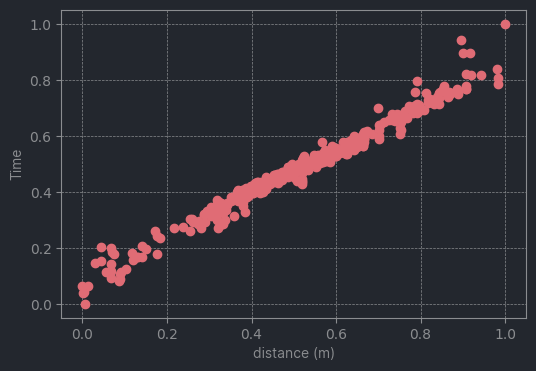

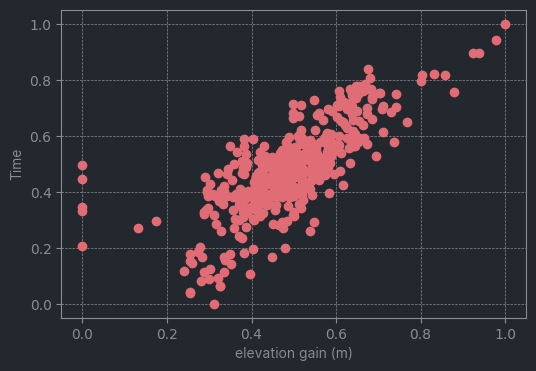

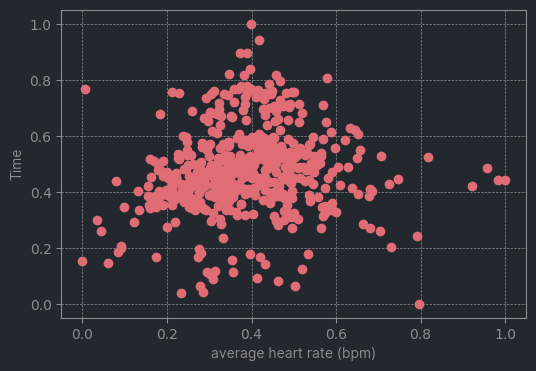

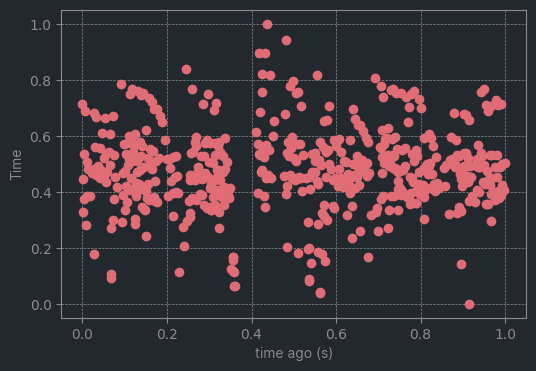

In [669]:
for k in range(len(input_cols)):
    my_xyscatter(data19023831.x_train_vals[:,k], data19023831.y_train_vals.reshape(-1),
                x_name=input_cols[k], y_name='Time')

The above graphs show that time_ago and HR are poor indicators of the time variable. Therefore, I'll check if pace is a better y variable than time. HR should better indicate pace, but time_ago will likely still be poorly correlated. Therefore, this value should either be dropped as an input variable, or an RNN/LSTM should be used to capture the passage of time between runs.

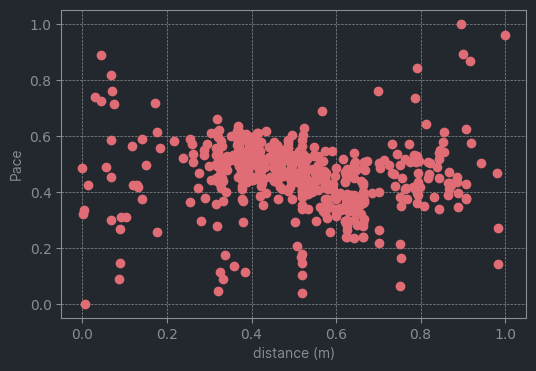

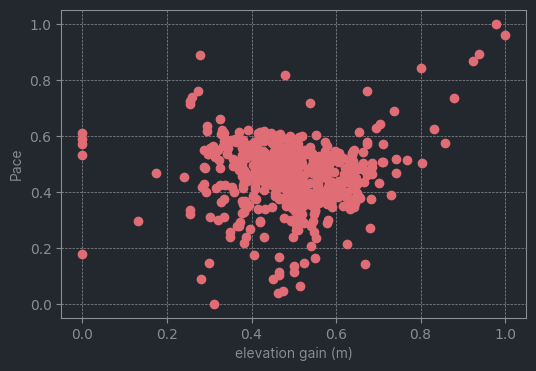

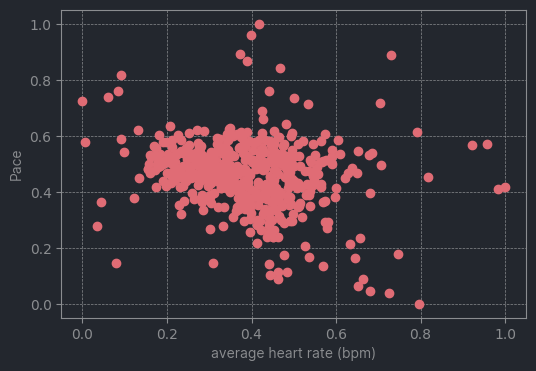

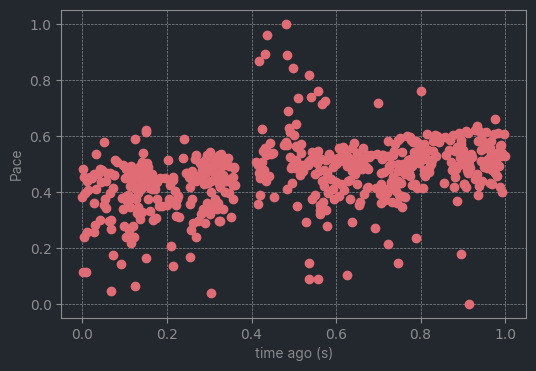

In [670]:
for k in range(len(input_cols)):
    my_xyscatter(data19023831.x_train_vals[:,k], data19023831.pace_scaled.reshape(-1),
                x_name=input_cols[k], y_name='Pace')

In [671]:
def mape_actualtime(pred_tensor, true_tensor, dataobject):
    '''
    Uses MAPE on the descaled and detransformed time values
    '''

    try: # CPU
        pred_seconds = torch.tensor(dataobject.y2minutes(pred_tensor), requires_grad=True).float()
        true_seconds = torch.tensor(dataobject.y2minutes(true_tensor), requires_grad=True).float()
    except TypeError: # GPU
        pred_seconds = torch.tensor(dataobject.y2minutes(pred_tensor.cpu()), requires_grad=True).float()
        true_seconds = torch.tensor(dataobject.y2minutes(true_tensor.cpu()), requires_grad=True).float()

    # return torch.sum(torch.abs((pred_seconds-true_seconds)/(true_seconds)))/true_seconds.size(0)
    return torch.sum(torch.abs((pred_seconds-true_seconds)/(true_seconds)))/true_seconds.numel()

In [1844]:
from torch.utils.data import DataLoader, TensorDataset
import os
import shutil
from time import time, sleep
import pickle
import copy

class model_handler():

    def __init__(self, model, dataobject):

        self.model = model

        self.device = dataobject.device
        self.model.to(self.device)

        self.dataobject = dataobject

        self.epochs = 1
        self.batch_size = 1
        self.learning_rate = 0.001
        self.weight_decay = 0.01
        self.L1_lambda = 0.001

        self.train_dataset = None
        self.train_loader = None
        
        self.criterion = nn.MSELoss()

        # trackers
        self.training_losses = []
        self.testing_losses = []

        self.training_losses_mape = []
        self.testing_losses_mape = []

        self.total_epochs = 0
        self.best_mape_test = 100.0
        self.best_epoch_test = 0

        self.result = pd.DataFrame()

    def save_handler(self, save_path):

        sleep_time = 120

        # save the handler
        for _ in range(sleep_time):
            try:
                with open(save_path, 'wb') as output:
                    pickle.dump(self, output, pickle.HIGHEST_PROTOCOL)
                break
            except PermissionError:
                print('File is busy. Trying again in 1 second...')
                sleep(1)


    def train(self, 
              epochs = None, 
              batch_size = None,
              learning_rate = None,
              weight_decay = None,
              x_train_tensor = None,
              y_train_tensor = None,
              x_test_tensor = None,
              y_test_tensor = None,
              seed = 42,
              save_best = False,
              save_path = 'model',
              EarlyStopping_Patience = None,
              factor_duplications = 0.0):
        
        if epochs is None:
            epochs = self.epochs
        if batch_size is None:
            batch_size = self.batch_size
        if learning_rate is None:
            learning_rate = self.learning_rate
        if weight_decay is None:
            weight_decay = self.weight_decay
        if x_train_tensor is None:
            x_train_tensor = self.dataobject.x_train_tensor
        if y_train_tensor is None:
            y_train_tensor = self.dataobject.y_train_tensor
        if x_test_tensor is None:
            x_test_tensor = self.dataobject.x_train_tensor
        if y_test_tensor is None:
            y_test_tensor = self.dataobject.y_train_tensor

        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.weight_decay = weight_decay
        self.x_train_tensor = x_train_tensor
        self.y_train_tensor = y_train_tensor
        self.x_test_tensor = x_test_tensor
        self.y_test_tensor = y_test_tensor

        # increase data density at high and low distance
        if factor_duplications > 0.0:
            # get the indices of the rows
            indices = (self.x_train_tensor[:, 0] < 0.2*self.x_train_tensor[:, 0].max()) | (self.x_train_tensor[:, 0] > 0.8*self.x_train_tensor[:, 0].max())

            if torch.any(indices).item():
                # get the rows that will be duplicated
                x_rows_to_duplicate = self.x_train_tensor[indices]
                y_rows_to_duplicate = self.y_train_tensor[indices]

                # create tensors of duplicate rows
                n_duplicates = int(factor_duplications*len(x_train_tensor))
                x_duplicated_rows = torch.cat([x_rows_to_duplicate] * n_duplicates, dim=0)
                y_duplicated_rows = torch.cat([y_rows_to_duplicate] * n_duplicates, dim=0)

                # Concatenate the original tensor and the duplicate rows
                self.x_train_tensor = torch.cat((self.x_train_tensor, x_duplicated_rows), dim=0)
                self.y_train_tensor = torch.cat((self.y_train_tensor, y_duplicated_rows), dim=0)

        # Create a DataLoader for batching
        self.train_dataset = TensorDataset(self.x_train_tensor, self.y_train_tensor)
        torch.manual_seed(seed) # set Torch's random seed for batching
        self.train_loader = DataLoader(self.train_dataset, batch_size=batch_size, shuffle=True)

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)

        # tracker for EarlyStopping
        epochs_unimproved = 0

        for epoch in range(epochs):  # loop over the dataset multiple times

            self.model.train()

            training_loss = 0 # sum of all losses of all batches (reset each epoch)
            training_loss_mape = 0

            self.total_epochs += 1

            # train on every batch
            torch.manual_seed(42)
            for inputs, labels in self.train_loader:

                # Move data to GPU
                inputs, labels = inputs.to(self.device), labels.to(self.device)

                # zero the parameter gradients
                self.optimizer.zero_grad()

                # start forward + backward propogation:
                outputs = self.model(inputs)

                # compute losses
                loss = self.criterion(outputs, labels) 

                # implement L1 (Lasso) regularization
                L1_norm = sum(p.abs().sum() for p in self.model.parameters())

                loss = loss + (self.L1_lambda*L1_norm)

                # compute loss function gradients
                loss.backward() 

                # update weights and biases
                self.optimizer.step() 

                training_loss += loss.item() # average training loss in that batch
                training_loss_mape += mape_actualtime(outputs, labels, self.dataobject).item()

            self.model.eval()
            with torch.no_grad(): # prevents update of optimizer  
                y_pred = self.model(self.dataobject.x_test_tensor)
                test_loss = self.criterion(y_pred, self.dataobject.y_test_tensor).item()
                test_loss_mape = mape_actualtime(y_pred, self.dataobject.y_test_tensor, self.dataobject).item()

                self.training_losses.append(training_loss/len(self.train_loader))
                self.testing_losses.append(test_loss)

                self.training_losses_mape.append(training_loss_mape/len(self.train_loader))
                self.testing_losses_mape.append(test_loss_mape)

                if test_loss_mape < self.best_mape_test:

                    # reset tracker
                    epochs_unimproved = 0

                    # log the best model and scores
                    self.best_model = copy.deepcopy(self.model)
                    self.best_mape_test = test_loss_mape
                    self.best_epoch_test = self.total_epochs

                    # replace the saved version of the file
                    if save_best:
                        self.save_handler(save_path)
                else: 
                    epochs_unimproved += 1

                # stop the training loop if unimproved some number of epochs in a row
                if epochs_unimproved == EarlyStopping_Patience:
                    self.model = copy.deepcopy(self.best_model)
                    self.total_epochs = self.total_epochs - epochs_unimproved
                    break

            print(f'Epoch {str(epoch + 1).zfill(3)} | Average training loss: {training_loss/len(self.train_loader):.5f} | Average testing loss: {test_loss:.5f}')

    def plot_training_results(self):

        # my_interactable_xyline(y1=self.training_losses,x_label='Epochs',y_label='MSE Training Loss')
        # my_interactable_xyline(y1=self.testing_losses,x_label='Epochs',y_label='MSE Testing Loss')
        # my_interactable_xyline(y1=np.array(self.training_losses_mape)*100,x_label='Epochs',y_label='MAPE Training Loss (%)')
        # my_interactable_xyline(y1=np.array(self.testing_losses_mape)*100,x_label='Epochs',y_label='MAPE Testing Loss (%)')
        my_interactable_xyline(y1 = self.training_losses,
                               y1_label = 'Training',
                               y2 = self.testing_losses,
                               y2_label = 'Validation',
                               y_label = 'MSE Loss',
                               x_label = 'Epochs')
        my_interactable_xyline(y1 = np.array(self.training_losses_mape)*100,
                               y1_label = 'Training',
                               y2 = np.array(self.testing_losses_mape)*100,
                               y2_label = 'Validation',
                               y_label = 'MAPE Loss (%)',
                               x_label = 'Epochs')

    def plot_traintestpredictions(self):
        for i in range(4):
            my_traintestpredictions(x_train=self.dataobject.x_train_tensor[:,i],
                                    y_train=self.dataobject.y_train_tensor,
                                    y_train_pred=self.model(self.dataobject.x_train_tensor.unsqueeze(1)).detach().numpy(),
                                    x_test=self.dataobject.x_test_tensor[:,i],
                                    y_test=self.dataobject.y_test_tensor,
                                    y_test_pred=self.model(self.dataobject.x_test_tensor.unsqueeze(1)).detach().numpy(),
                                    x_name=input_cols[i]+' Normalised',
                                    y_name='Normalised Time')

        for i in range(4):
            my_traintestpredictions(x_train=self.dataobject.x_train.values[:,i],
                                    y_train=self.dataobject.y2minutes(self.dataobject.y_train_tensor),
                                    y_train_pred=self.dataobject.y2minutes(self.model(self.dataobject.x_train_tensor.detach())),
                                    x_test=self.dataobject.x_test.values[:,i],
                                    y_test=self.dataobject.y2minutes(self.dataobject.y_test_tensor),
                                    y_test_pred=self.dataobject.y2minutes(self.model(self.dataobject.x_test_tensor.detach())),
                                    x_name=input_cols[i],
                                    y_name='Time (minutes)')

    def plot_relationships(self):
        # view the relationship with each variable
        for i in range(4):
            x = np.full(shape=(100,4), fill_value=0.5)

            x[:,i] = np.linspace(start=0.0, stop=1.0, num=len(x))
            
            pred, descaled = self.predict(x, scaled=True, return_minutes=True)

            if i == 3:
                descaled[:,i] = descaled[:,i]/3600/24
                my_xyline(x1=descaled[:,i],y1=pred, x_label="Time Ago (days)", y_label = "Time (minutes)")
            elif i == 0:
                descaled[:,i] = descaled[:,i]/1000
                my_xyline(x1=descaled[:,i],y1=pred, x_label="distance (km)", y_label = "Time (minutes)")
            else:
                my_xyline(x1=descaled[:,i],y1=pred, x_label=input_cols[i], y_label = "Time (minutes)")        
                
    def predict(self, x_raw, scaled=False, return_minutes=True):

        # transform and scale
        # expected order of x: distance, elevation, hr, timeago
        
        # convert x_raw to np.ndarray
        if isinstance(x_raw, pd.DataFrame):
            x = x_raw.values
        elif torch.is_tensor(x_raw):
            x = x_raw.numpy()
        if isinstance(x_raw, list) or isinstance(x_raw, tuple):
            if len(x_raw) != 4:
                raise ValueError("If providing a list or tuple, it must be length 4")
            else:
                x = np.array(list(x_raw)).reshape(1,4)
        elif isinstance(x_raw, np.ndarray):
            if len(x_raw.shape) == 1:
                x = x_raw.copy().reshape(1,-1)
            else:
                x = x_raw.copy()
        
        if not isinstance(x, np.ndarray):
            raise TypeError(f"Input data type must be either (1) np.ndarray (2) pd.Dataframe (3) torch.tensor (4) list (5) tuple.")
        elif x.shape[1] != 4:
            raise ValueError("x must be shape (N,4) where N is the number of points")

        if not scaled:
            # detransform each column with the yjpt scaler
            x[:,0] = self.dataobject.yjpt_distance.transform(x[:,0].reshape(-1,1)).reshape(-1)
            x[:,1] = self.dataobject.yjpt_elevation.transform(x[:,1].reshape(-1,1)).reshape(-1)
            x[:,3] = self.dataobject.yjpt_timeago.transform(x[:,3].reshape(-1,1)).reshape(-1)

            # descale each column with the scaler
            x = self.dataobject.x_scaler.transform(pd.DataFrame(x, columns = self.dataobject.x_test_transformed.columns[:4]))

        else:
            x_descaled = x.copy()

            # scale each column with the scaler
            x_descaled = self.dataobject.x_scaler.inverse_transform(pd.DataFrame(x_descaled, columns = self.dataobject.x_test_transformed.columns))

            # transform each column with the yjpt scaler
            x_descaled[:,0] = self.dataobject.yjpt_distance.inverse_transform(x_descaled[:,0].reshape(-1,1)).reshape(-1)
            x_descaled[:,1] = self.dataobject.yjpt_elevation.inverse_transform(x_descaled[:,1].reshape(-1,1)).reshape(-1)
            x_descaled[:,3] = self.dataobject.yjpt_timeago.inverse_transform(x_descaled[:,3].reshape(-1,1)).reshape(-1)
            
        # convert to tensor
        x_tensor = torch.tensor(x).float()

        y_tensor = self.model(x_tensor)

        if return_minutes:
            if scaled:
                return self.dataobject.y2minutes(y_tensor), x_descaled
            else:
                return self.dataobject.y2minutes(y_tensor)
        else:
            if scaled:
                return y_tensor.detach().numpy(), x_descaled
            else:
                return y_tensor.detach().numpy()

To optimise the number of hidden nodes and epochs, I want to use MAPE as the evaluation metric. The models will still be trained with MSE as the loss criterion. 

The code below identifies the number of hidden nodes that achieves the lowest MAPE loss across the full range of epochs between 1 and 500. I will then select the combination of hidden nodes and epochs that produced the lowest MAPE loss.

In [1911]:
from time import time

class find_hn_epochs():
    def __init__(self, model_class, start_hn, stop_hn, dataobject):

        self.model_class = model_class

        self.handler = None

        self.dataobject = dataobject

        self.hidden_nodes = np.arange(start=start_hn,stop=stop_hn,step=1).tolist()
        self.mape_bestlosses = []
        self.mape_bestepochs = []

        self.results = pd.DataFrame()

        self.best_testing_losses_mape = 1.0

    def find(self, save_best = False, target_folder = None):

        # make a folder to save the progress in
        if target_folder is not None:
            sleep_time = 120
            if os.path.exists(target_folder):
                for _ in range(sleep_time):
                    try:
                        shutil.rmtree(target_folder)
                        break
                    except PermissionError:
                        print('Folder is busy. Trying again in 1 second...')
                        sleep(1)
            os.mkdir(target_folder)
        else:
            target_folder = ''

        count = 0
        st = time()
        for hn in self.hidden_nodes:
            self.handler = model_handler(model = self.model_class(hn, seed = 42), dataobject=self.dataobject)

            save_path = target_folder + f"/handler_{hn}hn.pkl"

            self.handler.train(
                epochs = 512, 
                batch_size=20, 
                learning_rate=0.001, 
                save_best=save_best,
                save_path=save_path,
                EarlyStopping_Patience=25,
                factor_duplications=0.1
                )

            self.mape_bestlosses.append(min(self.handler.testing_losses_mape))
            self.mape_bestepochs.append(np.argmin(self.handler.testing_losses_mape))

            clear_output(wait=True)
            count += 1
            et = time()-st
            pc = count/len(self.hidden_nodes)
            etr = et/pc * (1-pc)
            print(f'{pc*100:.1f}% complete | Estimated time remaining = {etr/60:.2f} minutes')

        self.results = pd.DataFrame(columns=["hn","epochs","loss"])
        self.results["hn"] = np.array(self.hidden_nodes)
        self.results["epochs"] = np.array(self.mape_bestepochs)
        self.results["loss"] = np.array(self.mape_bestlosses)
        self.results = self.results.sort_values("hn")
    
    def plot_result(self):
        my_xyline(x1=self.results["hn"],y1=self.results["loss"],x_label='Number of Hidden Nodes', y_label='Best Testing Loss (MAPE)')

In [1912]:
finder_basic = find_hn_epochs(
    model_class=LeakyReLU_NN, 
    start_hn=2, 
    stop_hn=30, 
    dataobject=data19023831
    )

finder_basic.find(save_best=True, target_folder='finder_basic')

with open('finder_basic/finder_basic.pkl', 'wb') as output:
    pickle.dump(finder_basic, output, pickle.HIGHEST_PROTOCOL)

100.0% complete | Estimated time remaining = 0.00 minutes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


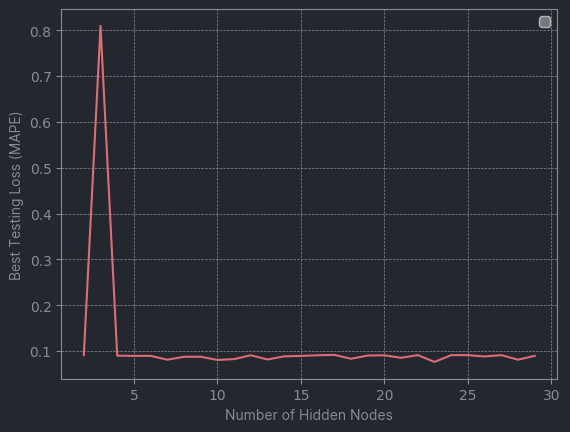

In [1913]:
with open('finder_basic/finder_basic.pkl', 'rb') as input:
    finder_basic = pickle.load(input)

finder_basic.plot_result()

The plot above shows that above 6 hidden nodes, there is little benefit to increasing the number of hidden nodes.

In [1329]:
handler_path = 'finder_basic/handler_8hn.pkl'

with open(handler_path, 'rb') as file:
    handler = pickle.load(file)
    
handler.plot_relationships()

FileNotFoundError: [Errno 2] No such file or directory: 'finder_basic/handler_8hn.pkl'

The relationship between heart-rate and time-ago can have sudden step changes in gradient with LeakyReLU. Therefore, I'll tweak the selection of activation functions to improve enable better continuity of the relationship.

In [797]:
class ELU_NN(nn.Module):
    def __init__(self, hidden_nodes, seed=12):

        torch.manual_seed(seed)

        super().__init__()
        self.hidden1 = nn.Linear(4,hidden_nodes)
        self.actv1 = nn.ELU()
        self.hidden2 = nn.Linear(hidden_nodes,hidden_nodes)
        self.actv2 = nn.ELU()
        self.output = nn.Linear(hidden_nodes,1)
        self.actv_output = nn.ELU()

    def forward(self, x):
        x = self.actv1(self.hidden1(x))
        x = self.actv2(self.hidden2(x))
        x = self.actv_output(self.output(x))
        
        return x

In [1331]:
finder_ELU = find_hn_epochs(
    model_class=ELU_NN, 
    start_hn=2, 
    stop_hn=30, 
    dataobject=data19023831
    )

finder_ELU.find(save_best=True, target_folder='finder_ELU')

with open('finder_ELU/finder_ELU.pkl', 'wb') as output:
    pickle.dump(finder_ELU, output, pickle.HIGHEST_PROTOCOL)

100.0% complete | Estimated time remaining = 0.00 minutes


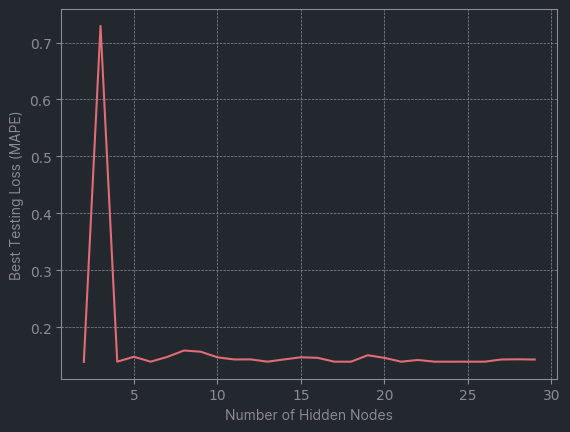

In [1333]:
with open('finder_ELU/finder_ELU.pkl', 'rb') as input:
    finder_ELU = pickle.load(input)

finder_ELU.plot_result()

Like before, there is no benefit in increasing the number of hidden nodes to above 6.

In [1334]:
handler_path = 'finder_ELU/handler_6hn.pkl'

with open(handler_path, 'rb') as file:
    base_handler = pickle.load(file)
    
print(f'Model was trained with {base_handler.total_epochs} epochs')

Model was trained with 510 epochs


In [1335]:
print(f'Best MAPE achieved on test data: {base_handler.testing_losses_mape[-1]}')

Best MAPE achieved on test data: 0.1396154761314392


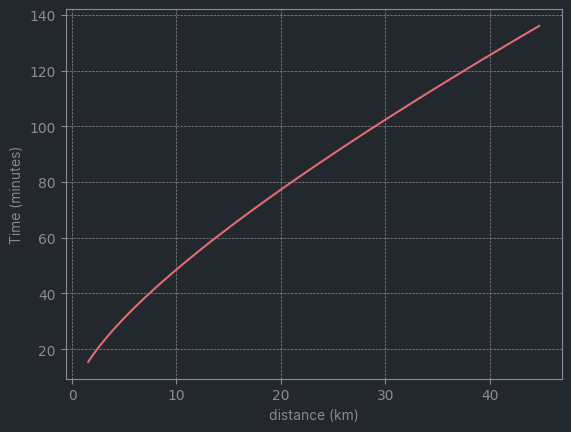

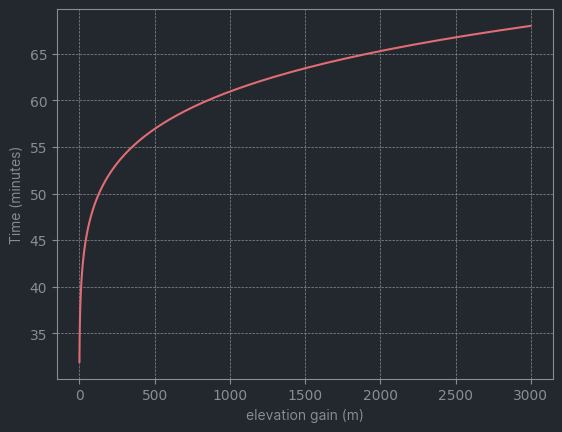

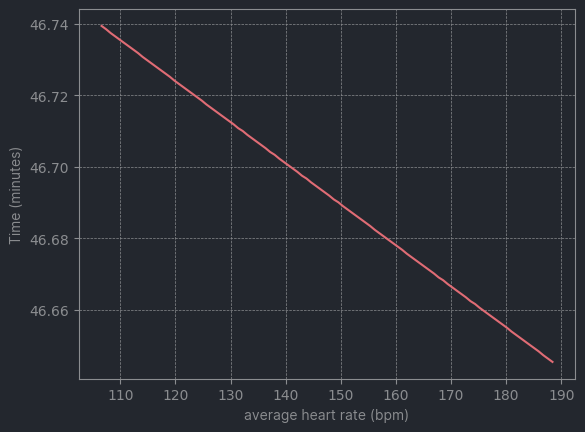

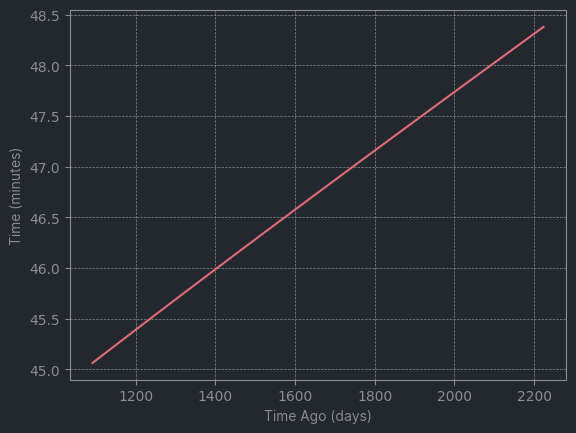

In [1336]:
base_handler.plot_relationships()

In [1337]:
base_handler.plot_training_results()

The training results show that the model was not overtrained and that the testing results have converged to a minimum. Therefore, I will use 2 hidden nodes and 128 epochs for my base models.

# **Testing out Transfer Learning**

In [676]:
def prepare_new_data(base_dataobject, new_dataobject):
    '''
    Shifts the timeago of the new_dataobject so that the newest run (or race) of the new_dataobject has the same timeago as the newest run of the base_dataobject.

    The fitted transforms and scalers of the base_dataobject will be used to transform and scale the data of the new_dataobject
    '''

    delta_timeago = new_dataobject.X["time ago (s)"].min() - base_dataobject.X["time ago (s)"].min()

    prepared_new_X = new_dataobject.X[['distance (m)','elevation gain (m)','average heart rate (bpm)','time ago (s)']]

    # offset the timeago
    prepared_new_X.loc[:, "time ago (s)"] = prepared_new_X["time ago (s)"] - delta_timeago


    # transform the x data
    new_X_transformed = pd.DataFrame()
    new_X_transformed["distance"] = base_dataobject.yjpt_distance.transform(prepared_new_X["distance (m)"].values.reshape(-1,1)).reshape(-1)
    new_X_transformed["elevation"] = base_dataobject.yjpt_elevation.transform(prepared_new_X["elevation gain (m)"].values.reshape(-1,1)).reshape(-1)
    new_X_transformed["hr"] = prepared_new_X["average heart rate (bpm)"].values
    new_X_transformed["timeago"] = base_dataobject.yjpt_timeago.transform(prepared_new_X["time ago (s)"].values.reshape(-1,1)).reshape(-1)

    # scale the x data
    new_X_scaled = base_dataobject.x_scaler.transform(new_X_transformed) # np.ndarray

    # transform and scale the y data
    new_y_transformed = base_dataobject.yjpt_time.transform(new_dataobject.y.values.reshape(-1,1))
    new_y_scaled = base_dataobject.y_scaler.transform(new_y_transformed) # np.ndarray

    # split the data
    new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_X_scaled, new_y_scaled, test_size = 0.1, random_state=30)

    # convert to tensors
    new_x_train_tensor = torch.tensor(new_x_train).float().to(base_dataobject.device)
    new_x_test_tensor = torch.tensor(new_x_test).float().to(base_dataobject.device)
    new_y_train_tensor = torch.tensor(new_y_train).float().to(base_dataobject.device)
    new_y_test_tensor = torch.tensor(new_y_test).float().to(base_dataobject.device)

    return new_x_train_tensor, new_x_test_tensor, new_y_train_tensor, new_y_test_tensor

In [1670]:
train_athletes

[19023831,
 17639804,
 23729907,
 3573750,
 10825360,
 6367873,
 20653961,
 16378210,
 2081128,
 10446972,
 18736169,
 22835898,
 5035018,
 6215611,
 7947798,
 5688059,
 11348733,
 18223349,
 5421161,
 5151970,
 3460571,
 19741163,
 5861500,
 12021072,
 25191153,
 15515123,
 11088529,
 11284478,
 3539760,
 22843389,
 14588097,
 20136629,
 2913078,
 16021442,
 22891135,
 34669133,
 1776170,
 26367918,
 21299972,
 12701438,
 14019837,
 12740383,
 34460713,
 18042525,
 22353493,
 12642956]

In [1671]:
# load the base model
handler_path = 'finder_ELU/handler_6hn.pkl'

with open(handler_path, 'rb') as file:
    base_handler = pickle.load(file)

base_model = copy.deepcopy(base_handler.model)

data_newath = athlete_data(athletes = [18223349], device = "cpu")

new_x_train_tensor, new_x_test_tensor, new_y_train_tensor, new_y_test_tensor = prepare_new_data(data19023831, data_newath)

# get the baseline error
base_mape = mape_actualtime(pred_tensor = base_model(new_x_test_tensor),
                            true_tensor = new_y_test_tensor,
                            dataobject = data19023831).detach().numpy().item()

print(f'Baseline MAPE: {base_mape}')
print(f'The new athlete has {len(data_newath.X)} data points')

Baseline MAPE: 0.1896582543849945
The new athlete has 408 data points


The baseline MAPE is already very good.

The advantage of transfer learning is the ability to fit a pretrained model to a new, very small, dataset. Therefore, I'll compare the performance when there is different number of data points available for these fine tuning methods.

In [1783]:
data_fraction_list = np.linspace(0.015,1.0,15)

transfer_mape_list = []
retrained_mape_list = []
scratch_mape_list = []

mape_list = pd.DataFrame(columns = ["type", "athlete", "mape"])

epochs = 100
patience = 15
count=0
st = time()
ets = []

# load in the data

for ath in train_athletes[2:10]:

    data_newath = athlete_data(athletes = [ath], device = "cpu")

    all_x_train_tensor, all_x_test_tensor, all_y_train_tensor, all_y_test_tensor = prepare_new_data(data19023831, data_newath)

    raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(data_newath.X[input_cols].values, data_newath.y.values.reshape(-1,1), test_size = 0.1, random_state=30)

    for data_fraction in data_fraction_list:
        
        # vary the number of provided training data points
        reduced_x_train_tensor = all_x_train_tensor[:int(round((data_fraction)*len(all_x_train_tensor)))]
        reduced_y_train_tensor = all_y_train_tensor[:int(round((data_fraction)*len(all_y_train_tensor)))]

        # batch size 10% of the training set, but max size 20, min size 5
        batch_size = int(np.clip(round(0.1*len(reduced_x_train_tensor)), a_min=5, a_max=20))

        # Transfer Learning

        # create a copy to tune with transfer-learning
        transfer_model = copy.deepcopy(base_model)

        # freeze model parameters to prevent backpropagation
        for param in transfer_model.parameters():
            param.requires_grad = False

        # Reset the last layer
        # transfer_model.output = nn.Linear(
        #     transfer_model.output.in_features,
        #     transfer_model.output.out_features
        #     )
        
        # Unfreeze the last layer
        for param in transfer_model.output.parameters():
            param.requires_grad = True

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(transfer_model.output.parameters(), lr=0.001)

        transfer_handler = model_handler(model = transfer_model, 
                                        dataobject = data_newath)

        transfer_handler.train(epochs = epochs,
                            batch_size = batch_size,
                            x_train_tensor = reduced_x_train_tensor,
                            y_train_tensor = reduced_y_train_tensor,
                            x_test_tensor  = new_x_test_tensor,
                            y_test_tensor  = new_y_test_tensor,
                            EarlyStopping_Patience=patience)
        transfer_mape = mape_actualtime(pred_tensor = transfer_handler.model(new_x_test_tensor),
                                        true_tensor = new_y_test_tensor,
                                        dataobject = data19023831).detach().numpy().item()
        
        # transfer_mape_list.append(transfer_mape)
        df = pd.DataFrame({
            "type": ["transfer"], 
            "athlete": [ath], 
            "data size": [int(round((data_fraction)*len(reduced_x_train_tensor)))], 
            "mape": [transfer_mape]
        })
        mape_list = pd.concat([mape_list, df])

        # Re-training all parameters (fewer epochs to prevent overfit)
        retrained_model = copy.deepcopy(base_model)

        retrained_handler = model_handler(model = retrained_model, 
                                        dataobject = data_newath)
        retrained_handler.train(epochs = epochs,
                                batch_size = batch_size,
                                x_train_tensor = reduced_x_train_tensor,
                                y_train_tensor = reduced_y_train_tensor,
                                x_test_tensor  = new_x_test_tensor,
                                y_test_tensor  = new_y_test_tensor,
                                EarlyStopping_Patience=patience)
        retrained_mape = mape_actualtime(pred_tensor = retrained_handler.model(new_x_test_tensor),
                                        true_tensor = new_y_test_tensor,
                                        dataobject = data19023831).detach().numpy().item()
        
        # retrained_mape_list.append(retrained_mape)
        df = pd.DataFrame({
            "type": ["retrain"], 
            "athlete": [ath], 
            "data size": [int(round((data_fraction)*len(reduced_x_train_tensor)))], 
            "mape": [retrained_mape]
        })
        mape_list = pd.concat([mape_list, df])

        # Create a model from scratch (randomised initial weights/biases)
        scratch_handler = model_handler(model = ELU_NN(6),
                                        dataobject=data_newath)

        x_raw = raw_x_train.copy()
        x_yjpt = PowerTransformer(method='yeo-johnson')
        x_transformed = x_yjpt.fit_transform(x_raw)
        x_transformed[:,2] = x_raw[:,2]
        x_scaler = MinMaxScaler(feature_range=(0,1))
        x_scaled_train = x_scaler.fit_transform(x_transformed)

        y_raw = raw_y_train.copy()
        y_yjpt = PowerTransformer(method='yeo-johnson')
        y_transformed = y_yjpt.fit_transform(y_raw)
        y_scaler = MinMaxScaler(feature_range=(0,1))
        y_scaled_train = y_scaler.fit_transform(y_transformed)

        x_scaled_test = x_scaler.transform(x_yjpt.transform(raw_x_test))
        y_scaled_test = y_scaler.transform(y_yjpt.transform(raw_y_test))

        # x_raw = raw_x_train.copy()
        # x_scaler = MinMaxScaler(feature_range=(0,1))
        # x_scaled_train = x_scaler.fit_transform(x_raw)

        # y_raw = raw_y_train.copy()
        # y_scaler = MinMaxScaler(feature_range=(0,1))
        # y_scaled_train = y_scaler.fit_transform(y_raw)

        # x_scaled_test = x_scaler.transform(raw_x_test)
        # y_scaled_test = y_scaler.transform(raw_y_test)

        x_train_tensor = torch.tensor(x_scaled_train).float().to('cpu')
        x_test_tensor = torch.tensor(x_scaled_test).float().to('cpu')
        y_train_tensor = torch.tensor(y_scaled_train).float().to('cpu')
        y_test_tensor = torch.tensor(y_scaled_test).float().to('cpu')

        reduced_x_train_tensor = x_train_tensor[:int(round((data_fraction)*len(x_train_tensor)))]
        reduced_y_train_tensor = y_train_tensor[:int(round((data_fraction)*len(y_train_tensor)))]

        scratch_handler.train(epochs = epochs,
                            batch_size = batch_size,
                            x_train_tensor = reduced_x_train_tensor,
                            y_train_tensor = reduced_y_train_tensor,
                            x_test_tensor  = x_test_tensor,
                            y_test_tensor  = y_test_tensor,
                            EarlyStopping_Patience=patience)

        pred_seconds = scratch_handler.model(x_test_tensor).detach().numpy()

        pred_seconds = y_yjpt.inverse_transform(y_scaler.inverse_transform(pred_seconds)).flatten()

        # pred_seconds = y_scaler.inverse_transform(pred_seconds).flatten()

        scratch_mape = sum(abs((pred_seconds-raw_y_test.flatten())/(raw_y_test.flatten())))/len(raw_y_test)

        # scratch_mape_list.append(scratch_mape)
        df = pd.DataFrame({
            "type": ["scratch"], 
            "athlete": [ath], 
            "data size": [int(round((data_fraction)*len(reduced_x_train_tensor)))], 
            "mape": [scratch_mape]
        })
        mape_list = pd.concat([mape_list, df])
        
        clear_output(wait=True)
        count += 1
        et = time()-st
        ets.append(et)
        et = np.mean(ets[-3:])
        pc = count/(len(data_fraction_list)*8)
        etr = et/pc * (1-pc)
        print(f'{pc*100:.1f}% complete | Estimated time remaining = {etr/60:.2f} minutes')

100.0% complete | Estimated time remaining = 0.00 minutes


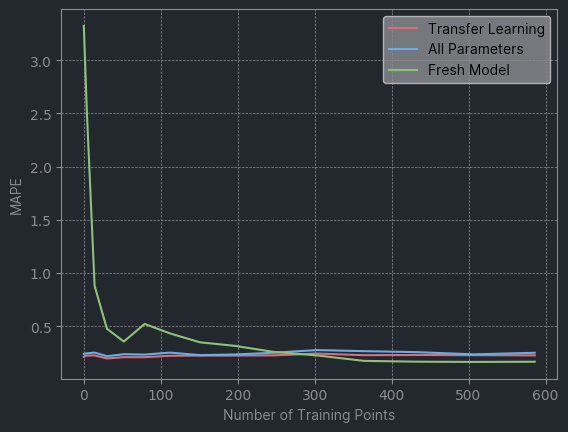

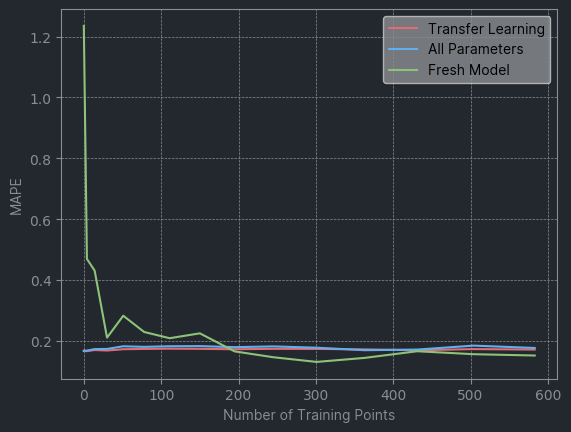

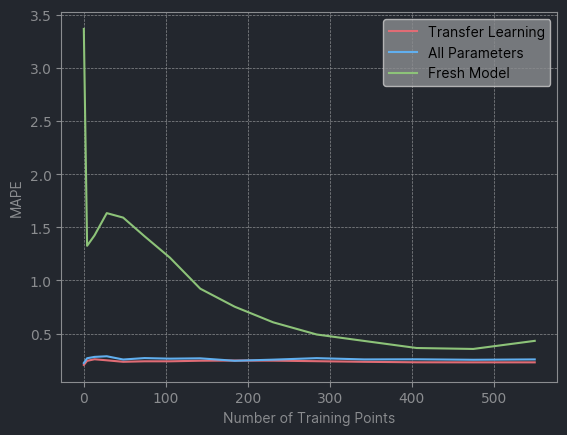

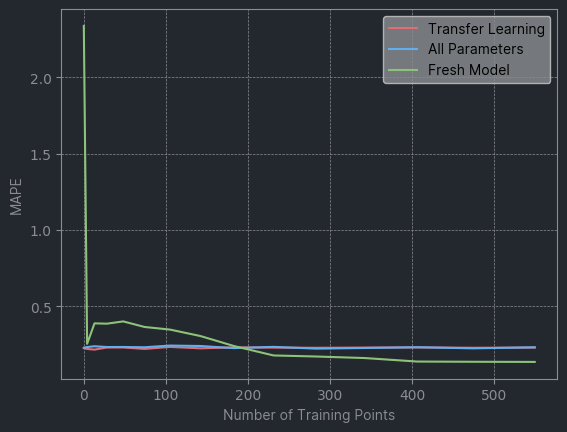

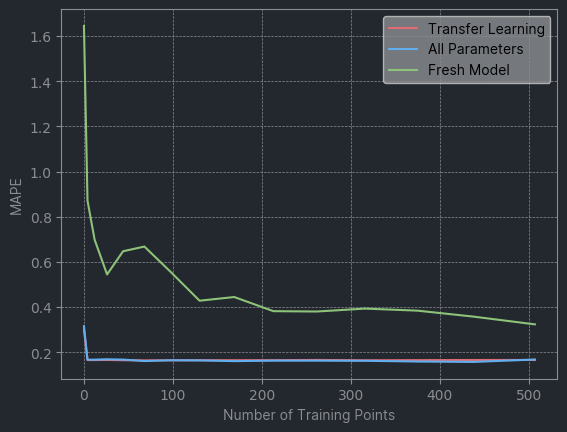

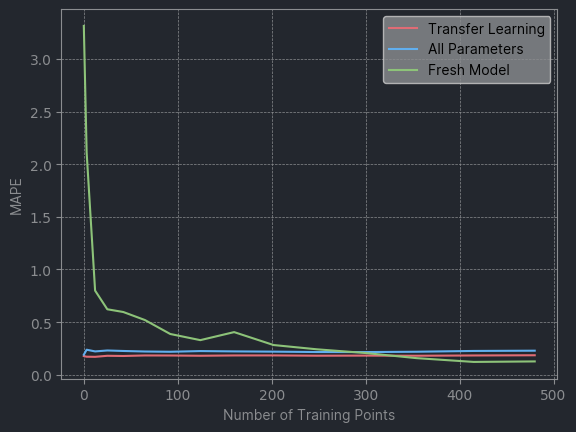

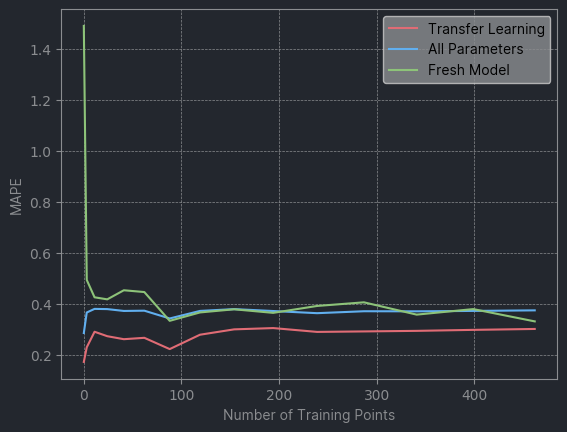

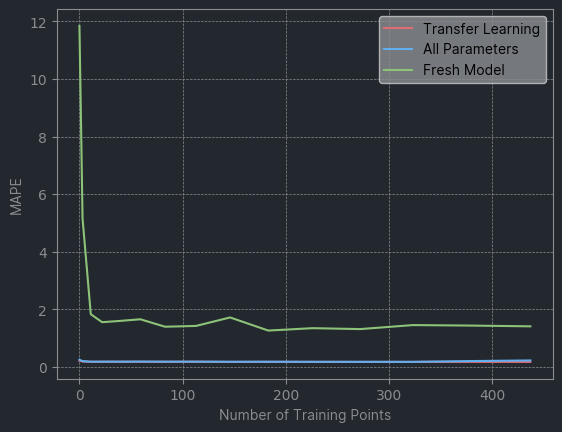

In [1805]:
for ath in mape_list['athlete'].unique():

    filtered_mape_list = mape_list[mape_list['athlete'] == ath]

    transfer_mape_list = filtered_mape_list[filtered_mape_list['type'] == 'transfer'].sort_values('data size').groupby('data size')['mape'].mean().values

    retrained_mape_list = filtered_mape_list[filtered_mape_list['type'] == 'retrain'].sort_values('data size').groupby('data size')['mape'].mean().values

    scratch_mape_list = filtered_mape_list[filtered_mape_list['type'] == 'scratch'].sort_values('data size').groupby('data size')['mape'].mean().values

    data_sizes = filtered_mape_list.sort_values('data size')['data size'].unique()

    my_xyline(x1 = data_sizes,
            y1 = transfer_mape_list,
            y1_label='Transfer Learning',
            x2 = data_sizes,
            y2 = retrained_mape_list,
            y2_label='All Parameters',
            x3 = data_sizes,
            y3 = scratch_mape_list,
            y3_label='Fresh Model',
            y_label='MAPE',
            x_label='Number of Training Points')

The general trend is that all-parameter fine-tuning and transfer learning both performing significantly better than creating a completely new model when there are fewer than several hundred new samples.

In most cases, fine tuning a base model achieved better loss even when there were several hundred new samples.

Transfer learning consistently performed slightly better than all-parameter fine-tuning.

# **Creating Base Models**

In [753]:
print(f'Number of athletes to train with: {len(train_athletes)}')
print(train_athletes)

Number of athletes to train with: 46
[19023831, 17639804, 23729907, 3573750, 10825360, 6367873, 20653961, 16378210, 2081128, 10446972, 18736169, 22835898, 5035018, 6215611, 7947798, 5688059, 11348733, 18223349, 5421161, 5151970, 3460571, 19741163, 5861500, 12021072, 25191153, 15515123, 11088529, 11284478, 3539760, 22843389, 14588097, 20136629, 2913078, 16021442, 22891135, 34669133, 1776170, 26367918, 21299972, 12701438, 14019837, 12740383, 34460713, 18042525, 22353493, 12642956]


In [1344]:
# move the first base model in to the folder

handler_path = 'finder_ELU/handler_6hn.pkl'

try:
    os.mkdir('base_models_complete')
except FileExistsError:
    pass

with open(handler_path, 'rb') as input:
    base_handler = pickle.load(input)

with open('base_models_complete/handler001.pkl', 'wb') as output:
    pickle.dump(base_handler, output, pickle.HIGHEST_PROTOCOL)

In [1345]:
# create a JSON to keep track of which athletes have been included in which model/handler
import json 

handler_tracker = {
    'athletes_completed': [],
    'handler001.pkl': {
        'athlete': '[19023831]',
    }
}

with open('base_models_complete/handler_tracker_complete.json', 'w') as output:
    json.dump(handler_tracker, output)

In [1346]:
def update_handler_tracker(target_suffix: str):
    '''
    Stores the parameters of the handlers in a JSON
    '''

    target_folder = f'base_models_{target_suffix}'
    target_json = f'{target_folder}/handler_tracker_{target_suffix}.json'
    target_csv = f'{target_folder}/handler_tracker_{target_suffix}.csv'

    # load the tracker json as a dict
    with open(target_json, 'rb') as input:
        handler_tracker = json.load(input)

    # write a csv tracker 
    df = pd.DataFrame(columns = ['model', 'athletes', 'train_mse', 'test_mse', 'mape_train', 'mape_test', 'total_epochs'])

    # initialise a list of the athletes included in the dataset
    athletes_completed = []

    # go through each base model
    for filename in os.listdir(target_folder):
        if filename.endswith('.pkl'):
            with open(f'{target_folder}/{filename}', 'rb') as input:
                temp_handler = pickle.load(input)

            try:
                handler_tracker[filename]
            except KeyError:
                # create a new field if it's not in the tracker
                handler_tracker[filename] = dict()

            # log which athlete this model includes
            handler_tracker[filename]['athlete'] = str(temp_handler.dataobject.athlete)
            handler_tracker[filename]['best_mape_test'] = temp_handler.best_mape_test
            handler_tracker[filename]['total_epochs'] = temp_handler.total_epochs

            # add the athlete to the list
            athletes_completed += temp_handler.dataobject.athlete

            # update csv tracker
            row = pd.DataFrame({
                'model':[filename], 
                'athletes': [str(temp_handler.dataobject.athlete)[1:-1]], 
                'train_mse': [temp_handler.training_losses[-1]], 
                'test_mse': [temp_handler.testing_losses[-1]], 
                'mape_train': [temp_handler.training_losses_mape[-1]], 
                'mape_test': [temp_handler.testing_losses_mape[-1]], 
                'total_epochs': [temp_handler.total_epochs]
                })

            df = pd.concat([df, row], ignore_index=True)
            
    # add the list as a new field
    handler_tracker['athletes_completed'] = str(athletes_completed)

    handler_tracker = dict(sorted(handler_tracker.items()))

    # save the dict as a json
    with open(target_json, 'w') as output:
        json.dump(handler_tracker, output, indent=4)


    # save the df as csv
    df.to_csv(target_csv, index=False)

    return handler_tracker

update_handler_tracker('complete')

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



{'athletes_completed': '[19023831]',
 'handler001.pkl': {'athlete': '[19023831]',
  'best_mape_test': 0.1396154761314392,
  'total_epochs': 510}}

In [1896]:
# create a base model for each athlete in train_athletes

num = 0

st= time()
for ath in train_athletes[num:]:

    new_dataobject = athlete_data(athletes = [ath], device = "cpu")

    # create a new base model
    new_handler = model_handler(
        model = LeakyReLU_NN(6), 
        dataobject = new_dataobject
        ) 
    
    new_handler.train(
        epochs = 512, 
        batch_size = 20,
        save_best = True,
        save_path = f'base_models_LeakyReLU/handler{str(num).zfill(3)}.pkl',
        EarlyStopping_Patience=25,
        factor_duplications=0.1
    )

    num+=1

    handler_tracker = update_handler_tracker('LeakyReLU')

    clear_output(wait=True)
    et = time()-st
    pc = num/(len(train_athletes))
    etr = et/pc * (1-pc)
    print(f'{pc*100:.1f}% complete | Estimated time remaining = {etr/60:.2f} minutes')

100.0% complete | Estimated time remaining = 0.00 minutes


In [1347]:
# create a base model for each athlete in train_athletes

num = 2

for ath in train_athletes[num:]:

    new_dataobject = athlete_data(athletes = [ath], device = "cpu")

    # create a new base model
    new_handler = model_handler(
        model = ELU_NN(6), 
        dataobject = new_dataobject
        ) 
    
    new_handler.train(
        epochs = 512, 
        batch_size = 20,
        save_best = True,
        save_path = f'base_models_complete/handler{str(num).zfill(3)}.pkl',
        EarlyStopping_Patience=25,
        factor_duplications=0.1
    )

    num+=1

    handler_tracker = update_handler_tracker('complete')

Epoch 001 | Average training loss: 0.49151 | Average testing loss: 0.38625
Epoch 002 | Average training loss: 0.31297 | Average testing loss: 0.21851
Epoch 003 | Average training loss: 0.16533 | Average testing loss: 0.08773
Epoch 004 | Average training loss: 0.06504 | Average testing loss: 0.01936
Epoch 005 | Average training loss: 0.02934 | Average testing loss: 0.00825
Epoch 006 | Average training loss: 0.02573 | Average testing loss: 0.00753
Epoch 007 | Average training loss: 0.02479 | Average testing loss: 0.00703
Epoch 008 | Average training loss: 0.02392 | Average testing loss: 0.00646
Epoch 009 | Average training loss: 0.02308 | Average testing loss: 0.00596
Epoch 010 | Average training loss: 0.02232 | Average testing loss: 0.00552
Epoch 011 | Average training loss: 0.02161 | Average testing loss: 0.00513
Epoch 012 | Average training loss: 0.02096 | Average testing loss: 0.00479
Epoch 013 | Average training loss: 0.02038 | Average testing loss: 0.00450
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.52586 | Average testing loss: 0.42268
Epoch 002 | Average training loss: 0.33774 | Average testing loss: 0.24032
Epoch 003 | Average training loss: 0.17925 | Average testing loss: 0.10141
Epoch 004 | Average training loss: 0.07639 | Average testing loss: 0.03158
Epoch 005 | Average training loss: 0.03917 | Average testing loss: 0.01785
Epoch 006 | Average training loss: 0.03390 | Average testing loss: 0.01598
Epoch 007 | Average training loss: 0.03200 | Average testing loss: 0.01453
Epoch 008 | Average training loss: 0.03027 | Average testing loss: 0.01314
Epoch 009 | Average training loss: 0.02869 | Average testing loss: 0.01187
Epoch 010 | Average training loss: 0.02725 | Average testing loss: 0.01075
Epoch 011 | Average training loss: 0.02595 | Average testing loss: 0.00976
Epoch 012 | Average training loss: 0.02479 | Average testing loss: 0.00890
Epoch 013 | Average training loss: 0.02376 | Average testing loss: 0.00816
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 002 | Average training loss: 0.30640 | Average testing loss: 0.22748
Epoch 003 | Average training loss: 0.18301 | Average testing loss: 0.11802
Epoch 004 | Average training loss: 0.09086 | Average testing loss: 0.04606
Epoch 005 | Average training loss: 0.04298 | Average testing loss: 0.01979
Epoch 006 | Average training loss: 0.03103 | Average testing loss: 0.01566
Epoch 007 | Average training loss: 0.02894 | Average testing loss: 0.01441
Epoch 008 | Average training loss: 0.02756 | Average testing loss: 0.01337
Epoch 009 | Average training loss: 0.02632 | Average testing loss: 0.01237
Epoch 010 | Average training loss: 0.02517 | Average testing loss: 0.01146
Epoch 011 | Average training loss: 0.02411 | Average testing loss: 0.01065
Epoch 012 | Average training loss: 0.02315 | Average testing loss: 0.00992
Epoch 013 | Average training loss: 0.02227 | Average testing loss: 0.00928
Epoch 014 | Average training loss: 0.02146 | Average testing loss: 0.00870
Epoch 015 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.34730 | Average testing loss: 0.26364
Epoch 002 | Average training loss: 0.21714 | Average testing loss: 0.14433
Epoch 003 | Average training loss: 0.11599 | Average testing loss: 0.05990
Epoch 004 | Average training loss: 0.05546 | Average testing loss: 0.02117
Epoch 005 | Average training loss: 0.03516 | Average testing loss: 0.01351
Epoch 006 | Average training loss: 0.03120 | Average testing loss: 0.01168
Epoch 007 | Average training loss: 0.02908 | Average testing loss: 0.01033
Epoch 008 | Average training loss: 0.02727 | Average testing loss: 0.00913
Epoch 009 | Average training loss: 0.02566 | Average testing loss: 0.00810
Epoch 010 | Average training loss: 0.02425 | Average testing loss: 0.00726
Epoch 011 | Average training loss: 0.02304 | Average testing loss: 0.00656
Epoch 012 | Average training loss: 0.02199 | Average testing loss: 0.00598
Epoch 013 | Average training loss: 0.02107 | Average testing loss: 0.00551
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.44833 | Average testing loss: 0.35725
Epoch 002 | Average training loss: 0.30898 | Average testing loss: 0.23060
Epoch 003 | Average training loss: 0.19219 | Average testing loss: 0.12740
Epoch 004 | Average training loss: 0.10380 | Average testing loss: 0.05584
Epoch 005 | Average training loss: 0.05265 | Average testing loss: 0.02287
Epoch 006 | Average training loss: 0.03571 | Average testing loss: 0.01517
Epoch 007 | Average training loss: 0.03219 | Average testing loss: 0.01348
Epoch 008 | Average training loss: 0.03036 | Average testing loss: 0.01248
Epoch 009 | Average training loss: 0.02877 | Average testing loss: 0.01152
Epoch 010 | Average training loss: 0.02733 | Average testing loss: 0.01063
Epoch 011 | Average training loss: 0.02604 | Average testing loss: 0.00987
Epoch 012 | Average training loss: 0.02489 | Average testing loss: 0.00922
Epoch 013 | Average training loss: 0.02386 | Average testing loss: 0.00864
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.43850 | Average testing loss: 0.35536
Epoch 002 | Average training loss: 0.30809 | Average testing loss: 0.23583
Epoch 003 | Average training loss: 0.19874 | Average testing loss: 0.13582
Epoch 004 | Average training loss: 0.11267 | Average testing loss: 0.06320
Epoch 005 | Average training loss: 0.05910 | Average testing loss: 0.02675
Epoch 006 | Average training loss: 0.03916 | Average testing loss: 0.01723
Epoch 007 | Average training loss: 0.03504 | Average testing loss: 0.01498
Epoch 008 | Average training loss: 0.03306 | Average testing loss: 0.01357
Epoch 009 | Average training loss: 0.03126 | Average testing loss: 0.01232
Epoch 010 | Average training loss: 0.02965 | Average testing loss: 0.01118
Epoch 011 | Average training loss: 0.02821 | Average testing loss: 0.01019
Epoch 012 | Average training loss: 0.02693 | Average testing loss: 0.00934
Epoch 013 | Average training loss: 0.02578 | Average testing loss: 0.00860
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.49751 | Average testing loss: 0.40579
Epoch 002 | Average training loss: 0.34353 | Average testing loss: 0.25851
Epoch 003 | Average training loss: 0.20845 | Average testing loss: 0.13694
Epoch 004 | Average training loss: 0.10689 | Average testing loss: 0.05445
Epoch 005 | Average training loss: 0.04878 | Average testing loss: 0.01730
Epoch 006 | Average training loss: 0.02986 | Average testing loss: 0.00975
Epoch 007 | Average training loss: 0.02699 | Average testing loss: 0.00872
Epoch 008 | Average training loss: 0.02588 | Average testing loss: 0.00814
Epoch 009 | Average training loss: 0.02486 | Average testing loss: 0.00754
Epoch 010 | Average training loss: 0.02389 | Average testing loss: 0.00691
Epoch 011 | Average training loss: 0.02298 | Average testing loss: 0.00635
Epoch 012 | Average training loss: 0.02215 | Average testing loss: 0.00585
Epoch 013 | Average training loss: 0.02138 | Average testing loss: 0.00541
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 002 | Average training loss: 0.40424 | Average testing loss: 0.33800
Epoch 003 | Average training loss: 0.27066 | Average testing loss: 0.20771
Epoch 004 | Average training loss: 0.15960 | Average testing loss: 0.10431
Epoch 005 | Average training loss: 0.07936 | Average testing loss: 0.03851
Epoch 006 | Average training loss: 0.03807 | Average testing loss: 0.01328
Epoch 007 | Average training loss: 0.02717 | Average testing loss: 0.00907
Epoch 008 | Average training loss: 0.02571 | Average testing loss: 0.00836
Epoch 009 | Average training loss: 0.02486 | Average testing loss: 0.00792
Epoch 010 | Average training loss: 0.02406 | Average testing loss: 0.00744
Epoch 011 | Average training loss: 0.02330 | Average testing loss: 0.00694
Epoch 012 | Average training loss: 0.02260 | Average testing loss: 0.00650
Epoch 013 | Average training loss: 0.02196 | Average testing loss: 0.00612
Epoch 014 | Average training loss: 0.02137 | Average testing loss: 0.00579
Epoch 015 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.42308 | Average testing loss: 0.33056
Epoch 002 | Average training loss: 0.31114 | Average testing loss: 0.23189
Epoch 003 | Average training loss: 0.21691 | Average testing loss: 0.14831
Epoch 004 | Average training loss: 0.13932 | Average testing loss: 0.08265
Epoch 005 | Average training loss: 0.08181 | Average testing loss: 0.03937
Epoch 006 | Average training loss: 0.04849 | Average testing loss: 0.02057
Epoch 007 | Average training loss: 0.03630 | Average testing loss: 0.01655
Epoch 008 | Average training loss: 0.03341 | Average testing loss: 0.01565
Epoch 009 | Average training loss: 0.03209 | Average testing loss: 0.01481
Epoch 010 | Average training loss: 0.03096 | Average testing loss: 0.01407
Epoch 011 | Average training loss: 0.02992 | Average testing loss: 0.01340
Epoch 012 | Average training loss: 0.02893 | Average testing loss: 0.01279
Epoch 013 | Average training loss: 0.02801 | Average testing loss: 0.01223
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.43686 | Average testing loss: 0.32720
Epoch 002 | Average training loss: 0.31912 | Average testing loss: 0.22186
Epoch 003 | Average training loss: 0.21505 | Average testing loss: 0.13170
Epoch 004 | Average training loss: 0.13036 | Average testing loss: 0.06497
Epoch 005 | Average training loss: 0.07264 | Average testing loss: 0.02789
Epoch 006 | Average training loss: 0.04487 | Average testing loss: 0.01659
Epoch 007 | Average training loss: 0.03719 | Average testing loss: 0.01516
Epoch 008 | Average training loss: 0.03529 | Average testing loss: 0.01439
Epoch 009 | Average training loss: 0.03397 | Average testing loss: 0.01358
Epoch 010 | Average training loss: 0.03278 | Average testing loss: 0.01290
Epoch 011 | Average training loss: 0.03167 | Average testing loss: 0.01231
Epoch 012 | Average training loss: 0.03063 | Average testing loss: 0.01177
Epoch 013 | Average training loss: 0.02967 | Average testing loss: 0.01127
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.52334 | Average testing loss: 0.39864
Epoch 002 | Average training loss: 0.39952 | Average testing loss: 0.29298
Epoch 003 | Average training loss: 0.29291 | Average testing loss: 0.19834
Epoch 004 | Average training loss: 0.19706 | Average testing loss: 0.11542
Epoch 005 | Average training loss: 0.11563 | Average testing loss: 0.05114
Epoch 006 | Average training loss: 0.05936 | Average testing loss: 0.01735
Epoch 007 | Average training loss: 0.03534 | Average testing loss: 0.01007
Epoch 008 | Average training loss: 0.03053 | Average testing loss: 0.00986
Epoch 009 | Average training loss: 0.02950 | Average testing loss: 0.00940
Epoch 010 | Average training loss: 0.02878 | Average testing loss: 0.00899
Epoch 011 | Average training loss: 0.02811 | Average testing loss: 0.00865
Epoch 012 | Average training loss: 0.02741 | Average testing loss: 0.00833
Epoch 013 | Average training loss: 0.02673 | Average testing loss: 0.00802
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 003 | Average training loss: 0.19844 | Average testing loss: 0.14371
Epoch 004 | Average training loss: 0.14104 | Average testing loss: 0.09430
Epoch 005 | Average training loss: 0.09717 | Average testing loss: 0.05730
Epoch 006 | Average training loss: 0.06550 | Average testing loss: 0.03239
Epoch 007 | Average training loss: 0.04594 | Average testing loss: 0.01924
Epoch 008 | Average training loss: 0.03663 | Average testing loss: 0.01433
Epoch 009 | Average training loss: 0.03308 | Average testing loss: 0.01279
Epoch 010 | Average training loss: 0.03146 | Average testing loss: 0.01203
Epoch 011 | Average training loss: 0.03027 | Average testing loss: 0.01143
Epoch 012 | Average training loss: 0.02923 | Average testing loss: 0.01089
Epoch 013 | Average training loss: 0.02827 | Average testing loss: 0.01039
Epoch 014 | Average training loss: 0.02736 | Average testing loss: 0.00993
Epoch 015 | Average training loss: 0.02651 | Average testing loss: 0.00951
Epoch 016 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.32297 | Average testing loss: 0.23554
Epoch 002 | Average training loss: 0.23394 | Average testing loss: 0.15884
Epoch 003 | Average training loss: 0.15758 | Average testing loss: 0.09466
Epoch 004 | Average training loss: 0.09713 | Average testing loss: 0.04878
Epoch 005 | Average training loss: 0.05669 | Average testing loss: 0.02270
Epoch 006 | Average training loss: 0.03599 | Average testing loss: 0.01321
Epoch 007 | Average training loss: 0.02911 | Average testing loss: 0.01155
Epoch 008 | Average training loss: 0.02747 | Average testing loss: 0.01106
Epoch 009 | Average training loss: 0.02667 | Average testing loss: 0.01044
Epoch 010 | Average training loss: 0.02596 | Average testing loss: 0.00986
Epoch 011 | Average training loss: 0.02527 | Average testing loss: 0.00935
Epoch 012 | Average training loss: 0.02460 | Average testing loss: 0.00888
Epoch 013 | Average training loss: 0.02395 | Average testing loss: 0.00844
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 002 | Average training loss: 0.39008 | Average testing loss: 0.30575
Epoch 003 | Average training loss: 0.27936 | Average testing loss: 0.20107
Epoch 004 | Average training loss: 0.18275 | Average testing loss: 0.11479
Epoch 005 | Average training loss: 0.10778 | Average testing loss: 0.05413
Epoch 006 | Average training loss: 0.06050 | Average testing loss: 0.02285
Epoch 007 | Average training loss: 0.03991 | Average testing loss: 0.01332
Epoch 008 | Average training loss: 0.03435 | Average testing loss: 0.01147
Epoch 009 | Average training loss: 0.03264 | Average testing loss: 0.01053
Epoch 010 | Average training loss: 0.03129 | Average testing loss: 0.00971
Epoch 011 | Average training loss: 0.03004 | Average testing loss: 0.00897
Epoch 012 | Average training loss: 0.02888 | Average testing loss: 0.00829
Epoch 013 | Average training loss: 0.02779 | Average testing loss: 0.00766
Epoch 014 | Average training loss: 0.02678 | Average testing loss: 0.00708
Epoch 015 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.37080 | Average testing loss: 0.31954
Epoch 002 | Average training loss: 0.27727 | Average testing loss: 0.23209
Epoch 003 | Average training loss: 0.19767 | Average testing loss: 0.15663
Epoch 004 | Average training loss: 0.13176 | Average testing loss: 0.09604
Epoch 005 | Average training loss: 0.08249 | Average testing loss: 0.05327
Epoch 006 | Average training loss: 0.05196 | Average testing loss: 0.02956
Epoch 007 | Average training loss: 0.03818 | Average testing loss: 0.02027
Epoch 008 | Average training loss: 0.03366 | Average testing loss: 0.01722
Epoch 009 | Average training loss: 0.03179 | Average testing loss: 0.01580
Epoch 010 | Average training loss: 0.03040 | Average testing loss: 0.01477
Epoch 011 | Average training loss: 0.02920 | Average testing loss: 0.01385
Epoch 012 | Average training loss: 0.02813 | Average testing loss: 0.01300
Epoch 013 | Average training loss: 0.02716 | Average testing loss: 0.01224
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.52306 | Average testing loss: 0.47543
Epoch 002 | Average training loss: 0.39877 | Average testing loss: 0.35238
Epoch 003 | Average training loss: 0.28753 | Average testing loss: 0.24291
Epoch 004 | Average training loss: 0.19221 | Average testing loss: 0.15204
Epoch 005 | Average training loss: 0.11654 | Average testing loss: 0.08306
Epoch 006 | Average training loss: 0.06482 | Average testing loss: 0.04058
Epoch 007 | Average training loss: 0.03856 | Average testing loss: 0.02233
Epoch 008 | Average training loss: 0.03012 | Average testing loss: 0.01721
Epoch 009 | Average training loss: 0.02819 | Average testing loss: 0.01581
Epoch 010 | Average training loss: 0.02728 | Average testing loss: 0.01511
Epoch 011 | Average training loss: 0.02650 | Average testing loss: 0.01452
Epoch 012 | Average training loss: 0.02577 | Average testing loss: 0.01390
Epoch 013 | Average training loss: 0.02509 | Average testing loss: 0.01329
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.39694 | Average testing loss: 0.30339
Epoch 002 | Average training loss: 0.30074 | Average testing loss: 0.21871
Epoch 003 | Average training loss: 0.21515 | Average testing loss: 0.14413
Epoch 004 | Average training loss: 0.14275 | Average testing loss: 0.08451
Epoch 005 | Average training loss: 0.08823 | Average testing loss: 0.04322
Epoch 006 | Average training loss: 0.05395 | Average testing loss: 0.02101
Epoch 007 | Average training loss: 0.03802 | Average testing loss: 0.01299
Epoch 008 | Average training loss: 0.03291 | Average testing loss: 0.01094
Epoch 009 | Average training loss: 0.03113 | Average testing loss: 0.01007
Epoch 010 | Average training loss: 0.02984 | Average testing loss: 0.00939
Epoch 011 | Average training loss: 0.02869 | Average testing loss: 0.00879
Epoch 012 | Average training loss: 0.02763 | Average testing loss: 0.00823
Epoch 013 | Average training loss: 0.02666 | Average testing loss: 0.00773
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.52240 | Average testing loss: 0.43000
Epoch 002 | Average training loss: 0.41501 | Average testing loss: 0.33345
Epoch 003 | Average training loss: 0.31640 | Average testing loss: 0.24395
Epoch 004 | Average training loss: 0.22714 | Average testing loss: 0.16536
Epoch 005 | Average training loss: 0.15168 | Average testing loss: 0.10128
Epoch 006 | Average training loss: 0.09427 | Average testing loss: 0.05587
Epoch 007 | Average training loss: 0.05837 | Average testing loss: 0.03076
Epoch 008 | Average training loss: 0.04210 | Average testing loss: 0.02099
Epoch 009 | Average training loss: 0.03711 | Average testing loss: 0.01804
Epoch 010 | Average training loss: 0.03548 | Average testing loss: 0.01678
Epoch 011 | Average training loss: 0.03426 | Average testing loss: 0.01589
Epoch 012 | Average training loss: 0.03309 | Average testing loss: 0.01508
Epoch 013 | Average training loss: 0.03198 | Average testing loss: 0.01427
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.38089 | Average testing loss: 0.31231
Epoch 002 | Average training loss: 0.29788 | Average testing loss: 0.23863
Epoch 003 | Average training loss: 0.22770 | Average testing loss: 0.17583
Epoch 004 | Average training loss: 0.16805 | Average testing loss: 0.12325
Epoch 005 | Average training loss: 0.11911 | Average testing loss: 0.08107
Epoch 006 | Average training loss: 0.08134 | Average testing loss: 0.04980
Epoch 007 | Average training loss: 0.05556 | Average testing loss: 0.03010
Epoch 008 | Average training loss: 0.04134 | Average testing loss: 0.02041
Epoch 009 | Average training loss: 0.03538 | Average testing loss: 0.01666
Epoch 010 | Average training loss: 0.03311 | Average testing loss: 0.01515
Epoch 011 | Average training loss: 0.03180 | Average testing loss: 0.01425
Epoch 012 | Average training loss: 0.03069 | Average testing loss: 0.01354
Epoch 013 | Average training loss: 0.02968 | Average testing loss: 0.01290
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.67137 | Average testing loss: 0.62031
Epoch 002 | Average training loss: 0.55441 | Average testing loss: 0.50813
Epoch 003 | Average training loss: 0.44779 | Average testing loss: 0.40284
Epoch 004 | Average training loss: 0.34812 | Average testing loss: 0.30507
Epoch 005 | Average training loss: 0.25745 | Average testing loss: 0.21695
Epoch 006 | Average training loss: 0.17781 | Average testing loss: 0.14073
Epoch 007 | Average training loss: 0.11314 | Average testing loss: 0.08151
Epoch 008 | Average training loss: 0.06836 | Average testing loss: 0.04342
Epoch 009 | Average training loss: 0.04439 | Average testing loss: 0.02482
Epoch 010 | Average training loss: 0.03543 | Average testing loss: 0.01817
Epoch 011 | Average training loss: 0.03300 | Average testing loss: 0.01616
Epoch 012 | Average training loss: 0.03207 | Average testing loss: 0.01544
Epoch 013 | Average training loss: 0.03136 | Average testing loss: 0.01503
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.35761 | Average testing loss: 0.32552
Epoch 002 | Average training loss: 0.28339 | Average testing loss: 0.25621
Epoch 003 | Average training loss: 0.22160 | Average testing loss: 0.19705
Epoch 004 | Average training loss: 0.16901 | Average testing loss: 0.14650
Epoch 005 | Average training loss: 0.12512 | Average testing loss: 0.10429
Epoch 006 | Average training loss: 0.08968 | Average testing loss: 0.07044
Epoch 007 | Average training loss: 0.06332 | Average testing loss: 0.04600
Epoch 008 | Average training loss: 0.04676 | Average testing loss: 0.03130
Epoch 009 | Average training loss: 0.03883 | Average testing loss: 0.02431
Epoch 010 | Average training loss: 0.03607 | Average testing loss: 0.02156
Epoch 011 | Average training loss: 0.03509 | Average testing loss: 0.02047
Epoch 012 | Average training loss: 0.03441 | Average testing loss: 0.01992
Epoch 013 | Average training loss: 0.03377 | Average testing loss: 0.01948
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.46841 | Average testing loss: 0.40193
Epoch 002 | Average training loss: 0.38392 | Average testing loss: 0.32579
Epoch 003 | Average training loss: 0.31050 | Average testing loss: 0.25776
Epoch 004 | Average training loss: 0.24436 | Average testing loss: 0.19646
Epoch 005 | Average training loss: 0.18545 | Average testing loss: 0.14230
Epoch 006 | Average training loss: 0.13460 | Average testing loss: 0.09671
Epoch 007 | Average training loss: 0.09395 | Average testing loss: 0.06227
Epoch 008 | Average training loss: 0.06580 | Average testing loss: 0.04060
Epoch 009 | Average training loss: 0.05023 | Average testing loss: 0.02998
Epoch 010 | Average training loss: 0.04356 | Average testing loss: 0.02566
Epoch 011 | Average training loss: 0.04077 | Average testing loss: 0.02348
Epoch 012 | Average training loss: 0.03890 | Average testing loss: 0.02181
Epoch 013 | Average training loss: 0.03722 | Average testing loss: 0.02033
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.56458 | Average testing loss: 0.49057
Epoch 002 | Average training loss: 0.45839 | Average testing loss: 0.38976
Epoch 003 | Average training loss: 0.35731 | Average testing loss: 0.29274
Epoch 004 | Average training loss: 0.26330 | Average testing loss: 0.20539
Epoch 005 | Average training loss: 0.18195 | Average testing loss: 0.13159
Epoch 006 | Average training loss: 0.11640 | Average testing loss: 0.07434
Epoch 007 | Average training loss: 0.06977 | Average testing loss: 0.03671
Epoch 008 | Average training loss: 0.04335 | Average testing loss: 0.01800
Epoch 009 | Average training loss: 0.03298 | Average testing loss: 0.01172
Epoch 010 | Average training loss: 0.03043 | Average testing loss: 0.01020
Epoch 011 | Average training loss: 0.02968 | Average testing loss: 0.00970
Epoch 012 | Average training loss: 0.02902 | Average testing loss: 0.00941
Epoch 013 | Average training loss: 0.02839 | Average testing loss: 0.00911
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.64992 | Average testing loss: 0.57241
Epoch 002 | Average training loss: 0.53819 | Average testing loss: 0.46651
Epoch 003 | Average training loss: 0.43252 | Average testing loss: 0.36435
Epoch 004 | Average training loss: 0.33242 | Average testing loss: 0.26960
Epoch 005 | Average training loss: 0.24173 | Average testing loss: 0.18530
Epoch 006 | Average training loss: 0.16371 | Average testing loss: 0.11476
Epoch 007 | Average training loss: 0.10243 | Average testing loss: 0.06228
Epoch 008 | Average training loss: 0.06133 | Average testing loss: 0.03000
Epoch 009 | Average training loss: 0.03979 | Average testing loss: 0.01490
Epoch 010 | Average training loss: 0.03186 | Average testing loss: 0.00981
Epoch 011 | Average training loss: 0.02984 | Average testing loss: 0.00844
Epoch 012 | Average training loss: 0.02914 | Average testing loss: 0.00801
Epoch 013 | Average training loss: 0.02853 | Average testing loss: 0.00782
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.75390 | Average testing loss: 0.70191
Epoch 002 | Average training loss: 0.64211 | Average testing loss: 0.59143
Epoch 003 | Average training loss: 0.53394 | Average testing loss: 0.48238
Epoch 004 | Average training loss: 0.42868 | Average testing loss: 0.37791
Epoch 005 | Average training loss: 0.33004 | Average testing loss: 0.28183
Epoch 006 | Average training loss: 0.24130 | Average testing loss: 0.19685
Epoch 007 | Average training loss: 0.16565 | Average testing loss: 0.12645
Epoch 008 | Average training loss: 0.10667 | Average testing loss: 0.07411
Epoch 009 | Average training loss: 0.06663 | Average testing loss: 0.04093
Epoch 010 | Average training loss: 0.04436 | Average testing loss: 0.02391
Epoch 011 | Average training loss: 0.03482 | Average testing loss: 0.01701
Epoch 012 | Average training loss: 0.03167 | Average testing loss: 0.01460
Epoch 013 | Average training loss: 0.03055 | Average testing loss: 0.01361
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.50311 | Average testing loss: 0.46900
Epoch 002 | Average training loss: 0.42093 | Average testing loss: 0.38995
Epoch 003 | Average training loss: 0.34897 | Average testing loss: 0.31879
Epoch 004 | Average training loss: 0.28348 | Average testing loss: 0.25318
Epoch 005 | Average training loss: 0.22371 | Average testing loss: 0.19369
Epoch 006 | Average training loss: 0.17027 | Average testing loss: 0.14081
Epoch 007 | Average training loss: 0.12408 | Average testing loss: 0.09589
Epoch 008 | Average training loss: 0.08697 | Average testing loss: 0.06113
Epoch 009 | Average training loss: 0.06077 | Average testing loss: 0.03801
Epoch 010 | Average training loss: 0.04550 | Average testing loss: 0.02548
Epoch 011 | Average training loss: 0.03849 | Average testing loss: 0.01998
Epoch 012 | Average training loss: 0.03569 | Average testing loss: 0.01770
Epoch 013 | Average training loss: 0.03422 | Average testing loss: 0.01650
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.41015 | Average testing loss: 0.33437
Epoch 002 | Average training loss: 0.34148 | Average testing loss: 0.27321
Epoch 003 | Average training loss: 0.28287 | Average testing loss: 0.22036
Epoch 004 | Average training loss: 0.23164 | Average testing loss: 0.17405
Epoch 005 | Average training loss: 0.18695 | Average testing loss: 0.13418
Epoch 006 | Average training loss: 0.14856 | Average testing loss: 0.10009
Epoch 007 | Average training loss: 0.11562 | Average testing loss: 0.07106
Epoch 008 | Average training loss: 0.08784 | Average testing loss: 0.04729
Epoch 009 | Average training loss: 0.06569 | Average testing loss: 0.02944
Epoch 010 | Average training loss: 0.04981 | Average testing loss: 0.01780
Epoch 011 | Average training loss: 0.04006 | Average testing loss: 0.01158
Epoch 012 | Average training loss: 0.03509 | Average testing loss: 0.00895
Epoch 013 | Average training loss: 0.03288 | Average testing loss: 0.00800
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.72285 | Average testing loss: 0.66923
Epoch 002 | Average training loss: 0.62117 | Average testing loss: 0.57004
Epoch 003 | Average training loss: 0.52537 | Average testing loss: 0.47443
Epoch 004 | Average training loss: 0.43247 | Average testing loss: 0.38213
Epoch 005 | Average training loss: 0.34403 | Average testing loss: 0.29548
Epoch 006 | Average training loss: 0.26243 | Average testing loss: 0.21651
Epoch 007 | Average training loss: 0.18970 | Average testing loss: 0.14750
Epoch 008 | Average training loss: 0.12848 | Average testing loss: 0.09152
Epoch 009 | Average training loss: 0.08183 | Average testing loss: 0.05146
Epoch 010 | Average training loss: 0.05155 | Average testing loss: 0.02791
Epoch 011 | Average training loss: 0.03619 | Average testing loss: 0.01747
Epoch 012 | Average training loss: 0.03067 | Average testing loss: 0.01411
Epoch 013 | Average training loss: 0.02917 | Average testing loss: 0.01304
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.36801 | Average testing loss: 0.30270
Epoch 002 | Average training loss: 0.30556 | Average testing loss: 0.24767
Epoch 003 | Average training loss: 0.25197 | Average testing loss: 0.20013
Epoch 004 | Average training loss: 0.20531 | Average testing loss: 0.15873
Epoch 005 | Average training loss: 0.16464 | Average testing loss: 0.12286
Epoch 006 | Average training loss: 0.12960 | Average testing loss: 0.09214
Epoch 007 | Average training loss: 0.09989 | Average testing loss: 0.06640
Epoch 008 | Average training loss: 0.07557 | Average testing loss: 0.04601
Epoch 009 | Average training loss: 0.05705 | Average testing loss: 0.03142
Epoch 010 | Average training loss: 0.04456 | Average testing loss: 0.02248
Epoch 011 | Average training loss: 0.03739 | Average testing loss: 0.01800
Epoch 012 | Average training loss: 0.03391 | Average testing loss: 0.01613
Epoch 013 | Average training loss: 0.03228 | Average testing loss: 0.01532
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.68520 | Average testing loss: 0.59114
Epoch 002 | Average training loss: 0.59100 | Average testing loss: 0.50455
Epoch 003 | Average training loss: 0.50287 | Average testing loss: 0.42115
Epoch 004 | Average training loss: 0.41742 | Average testing loss: 0.34050
Epoch 005 | Average training loss: 0.33568 | Average testing loss: 0.26412
Epoch 006 | Average training loss: 0.25948 | Average testing loss: 0.19384
Epoch 007 | Average training loss: 0.19081 | Average testing loss: 0.13196
Epoch 008 | Average training loss: 0.13224 | Average testing loss: 0.08153
Epoch 009 | Average training loss: 0.08691 | Average testing loss: 0.04556
Epoch 010 | Average training loss: 0.05708 | Average testing loss: 0.02486
Epoch 011 | Average training loss: 0.04171 | Average testing loss: 0.01617
Epoch 012 | Average training loss: 0.03592 | Average testing loss: 0.01359
Epoch 013 | Average training loss: 0.03404 | Average testing loss: 0.01264
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.36977 | Average testing loss: 0.33079
Epoch 002 | Average training loss: 0.30870 | Average testing loss: 0.27186
Epoch 003 | Average training loss: 0.25502 | Average testing loss: 0.21943
Epoch 004 | Average training loss: 0.20727 | Average testing loss: 0.17278
Epoch 005 | Average training loss: 0.16536 | Average testing loss: 0.13215
Epoch 006 | Average training loss: 0.12955 | Average testing loss: 0.09774
Epoch 007 | Average training loss: 0.09982 | Average testing loss: 0.06930
Epoch 008 | Average training loss: 0.07603 | Average testing loss: 0.04693
Epoch 009 | Average training loss: 0.05823 | Average testing loss: 0.03070
Epoch 010 | Average training loss: 0.04621 | Average testing loss: 0.02025
Epoch 011 | Average training loss: 0.03913 | Average testing loss: 0.01444
Epoch 012 | Average training loss: 0.03555 | Average testing loss: 0.01166
Epoch 013 | Average training loss: 0.03389 | Average testing loss: 0.01045
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.44059 | Average testing loss: 0.37437
Epoch 002 | Average training loss: 0.37057 | Average testing loss: 0.31026
Epoch 003 | Average training loss: 0.30936 | Average testing loss: 0.25295
Epoch 004 | Average training loss: 0.25420 | Average testing loss: 0.20102
Epoch 005 | Average training loss: 0.20424 | Average testing loss: 0.15429
Epoch 006 | Average training loss: 0.15965 | Average testing loss: 0.11312
Epoch 007 | Average training loss: 0.12081 | Average testing loss: 0.07833
Epoch 008 | Average training loss: 0.08863 | Average testing loss: 0.05116
Epoch 009 | Average training loss: 0.06429 | Average testing loss: 0.03255
Epoch 010 | Average training loss: 0.04831 | Average testing loss: 0.02210
Epoch 011 | Average training loss: 0.03963 | Average testing loss: 0.01764
Epoch 012 | Average training loss: 0.03580 | Average testing loss: 0.01613
Epoch 013 | Average training loss: 0.03417 | Average testing loss: 0.01543
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.51716 | Average testing loss: 0.43098
Epoch 002 | Average training loss: 0.43905 | Average testing loss: 0.36026
Epoch 003 | Average training loss: 0.36827 | Average testing loss: 0.29473
Epoch 004 | Average training loss: 0.30214 | Average testing loss: 0.23376
Epoch 005 | Average training loss: 0.24101 | Average testing loss: 0.17831
Epoch 006 | Average training loss: 0.18593 | Average testing loss: 0.12945
Epoch 007 | Average training loss: 0.13807 | Average testing loss: 0.08840
Epoch 008 | Average training loss: 0.09894 | Average testing loss: 0.05671
Epoch 009 | Average training loss: 0.06998 | Average testing loss: 0.03539
Epoch 010 | Average training loss: 0.05155 | Average testing loss: 0.02366
Epoch 011 | Average training loss: 0.04198 | Average testing loss: 0.01878
Epoch 012 | Average training loss: 0.03794 | Average testing loss: 0.01728
Epoch 013 | Average training loss: 0.03630 | Average testing loss: 0.01676
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.46419 | Average testing loss: 0.40793
Epoch 002 | Average training loss: 0.39454 | Average testing loss: 0.34152
Epoch 003 | Average training loss: 0.33048 | Average testing loss: 0.27891
Epoch 004 | Average training loss: 0.27013 | Average testing loss: 0.22013
Epoch 005 | Average training loss: 0.21417 | Average testing loss: 0.16687
Epoch 006 | Average training loss: 0.16411 | Average testing loss: 0.12045
Epoch 007 | Average training loss: 0.12116 | Average testing loss: 0.08197
Epoch 008 | Average training loss: 0.08633 | Average testing loss: 0.05247
Epoch 009 | Average training loss: 0.06050 | Average testing loss: 0.03250
Epoch 010 | Average training loss: 0.04378 | Average testing loss: 0.02134
Epoch 011 | Average training loss: 0.03485 | Average testing loss: 0.01661
Epoch 012 | Average training loss: 0.03104 | Average testing loss: 0.01516
Epoch 013 | Average training loss: 0.02955 | Average testing loss: 0.01463
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.46977 | Average testing loss: 0.39302
Epoch 002 | Average training loss: 0.40162 | Average testing loss: 0.33032
Epoch 003 | Average training loss: 0.33982 | Average testing loss: 0.27201
Epoch 004 | Average training loss: 0.28190 | Average testing loss: 0.21717
Epoch 005 | Average training loss: 0.22793 | Average testing loss: 0.16701
Epoch 006 | Average training loss: 0.17922 | Average testing loss: 0.12259
Epoch 007 | Average training loss: 0.13654 | Average testing loss: 0.08461
Epoch 008 | Average training loss: 0.10066 | Average testing loss: 0.05406
Epoch 009 | Average training loss: 0.07248 | Average testing loss: 0.03178
Epoch 010 | Average training loss: 0.05253 | Average testing loss: 0.01780
Epoch 011 | Average training loss: 0.04037 | Average testing loss: 0.01079
Epoch 012 | Average training loss: 0.03426 | Average testing loss: 0.00828
Epoch 013 | Average training loss: 0.03171 | Average testing loss: 0.00770
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.54140 | Average testing loss: 0.51638
Epoch 002 | Average training loss: 0.46847 | Average testing loss: 0.44359
Epoch 003 | Average training loss: 0.40231 | Average testing loss: 0.37518
Epoch 004 | Average training loss: 0.34018 | Average testing loss: 0.31036
Epoch 005 | Average training loss: 0.28179 | Average testing loss: 0.25011
Epoch 006 | Average training loss: 0.22826 | Average testing loss: 0.19524
Epoch 007 | Average training loss: 0.18015 | Average testing loss: 0.14621
Epoch 008 | Average training loss: 0.13798 | Average testing loss: 0.10389
Epoch 009 | Average training loss: 0.10263 | Average testing loss: 0.06951
Epoch 010 | Average training loss: 0.07512 | Average testing loss: 0.04407
Epoch 011 | Average training loss: 0.05593 | Average testing loss: 0.02755
Epoch 012 | Average training loss: 0.04437 | Average testing loss: 0.01851
Epoch 013 | Average training loss: 0.03850 | Average testing loss: 0.01441
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.50246 | Average testing loss: 0.38100
Epoch 002 | Average training loss: 0.43983 | Average testing loss: 0.32957
Epoch 003 | Average training loss: 0.38446 | Average testing loss: 0.28394
Epoch 004 | Average training loss: 0.33469 | Average testing loss: 0.24283
Epoch 005 | Average training loss: 0.28937 | Average testing loss: 0.20565
Epoch 006 | Average training loss: 0.24804 | Average testing loss: 0.17219
Epoch 007 | Average training loss: 0.21039 | Average testing loss: 0.14215
Epoch 008 | Average training loss: 0.17598 | Average testing loss: 0.11524
Epoch 009 | Average training loss: 0.14459 | Average testing loss: 0.09166
Epoch 010 | Average training loss: 0.11655 | Average testing loss: 0.07202
Epoch 011 | Average training loss: 0.09259 | Average testing loss: 0.05703
Epoch 012 | Average training loss: 0.07355 | Average testing loss: 0.04709
Epoch 013 | Average training loss: 0.05980 | Average testing loss: 0.04191
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.76959 | Average testing loss: 0.66013
Epoch 002 | Average training loss: 0.68694 | Average testing loss: 0.58520
Epoch 003 | Average training loss: 0.61058 | Average testing loss: 0.51512
Epoch 004 | Average training loss: 0.53804 | Average testing loss: 0.44788
Epoch 005 | Average training loss: 0.46799 | Average testing loss: 0.38289
Epoch 006 | Average training loss: 0.40083 | Average testing loss: 0.32084
Epoch 007 | Average training loss: 0.33729 | Average testing loss: 0.26210
Epoch 008 | Average training loss: 0.27745 | Average testing loss: 0.20689
Epoch 009 | Average training loss: 0.22165 | Average testing loss: 0.15605
Epoch 010 | Average training loss: 0.17094 | Average testing loss: 0.11108
Epoch 011 | Average training loss: 0.12695 | Average testing loss: 0.07374
Epoch 012 | Average training loss: 0.09137 | Average testing loss: 0.04544
Epoch 013 | Average training loss: 0.06522 | Average testing loss: 0.02654
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.53075 | Average testing loss: 0.45718
Epoch 002 | Average training loss: 0.46342 | Average testing loss: 0.39386
Epoch 003 | Average training loss: 0.40168 | Average testing loss: 0.33458
Epoch 004 | Average training loss: 0.34339 | Average testing loss: 0.27818
Epoch 005 | Average training loss: 0.28806 | Average testing loss: 0.22523
Epoch 006 | Average training loss: 0.23647 | Average testing loss: 0.17670
Epoch 007 | Average training loss: 0.18932 | Average testing loss: 0.13312
Epoch 008 | Average training loss: 0.14718 | Average testing loss: 0.09520
Epoch 009 | Average training loss: 0.11080 | Average testing loss: 0.06389
Epoch 010 | Average training loss: 0.08106 | Average testing loss: 0.04006
Epoch 011 | Average training loss: 0.05872 | Average testing loss: 0.02404
Epoch 012 | Average training loss: 0.04386 | Average testing loss: 0.01515
Epoch 013 | Average training loss: 0.03550 | Average testing loss: 0.01151
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.47758 | Average testing loss: 0.42566
Epoch 002 | Average training loss: 0.41791 | Average testing loss: 0.36927
Epoch 003 | Average training loss: 0.36429 | Average testing loss: 0.31739
Epoch 004 | Average training loss: 0.31456 | Average testing loss: 0.26833
Epoch 005 | Average training loss: 0.26774 | Average testing loss: 0.22222
Epoch 006 | Average training loss: 0.22399 | Average testing loss: 0.17943
Epoch 007 | Average training loss: 0.18374 | Average testing loss: 0.14049
Epoch 008 | Average training loss: 0.14748 | Average testing loss: 0.10594
Epoch 009 | Average training loss: 0.11577 | Average testing loss: 0.07651
Epoch 010 | Average training loss: 0.08929 | Average testing loss: 0.05298
Epoch 011 | Average training loss: 0.06866 | Average testing loss: 0.03580
Epoch 012 | Average training loss: 0.05402 | Average testing loss: 0.02468
Epoch 013 | Average training loss: 0.04477 | Average testing loss: 0.01848
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.47386 | Average testing loss: 0.45245
Epoch 002 | Average training loss: 0.41293 | Average testing loss: 0.39474
Epoch 003 | Average training loss: 0.35699 | Average testing loss: 0.34018
Epoch 004 | Average training loss: 0.30390 | Average testing loss: 0.28798
Epoch 005 | Average training loss: 0.25357 | Average testing loss: 0.23907
Epoch 006 | Average training loss: 0.20709 | Average testing loss: 0.19462
Epoch 007 | Average training loss: 0.16549 | Average testing loss: 0.15544
Epoch 008 | Average training loss: 0.12953 | Average testing loss: 0.12229
Epoch 009 | Average training loss: 0.09992 | Average testing loss: 0.09587
Epoch 010 | Average training loss: 0.07725 | Average testing loss: 0.07654
Epoch 011 | Average training loss: 0.06151 | Average testing loss: 0.06388
Epoch 012 | Average training loss: 0.05188 | Average testing loss: 0.05658
Epoch 013 | Average training loss: 0.04670 | Average testing loss: 0.05279
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.42187 | Average testing loss: 0.37602
Epoch 002 | Average training loss: 0.36606 | Average testing loss: 0.32358
Epoch 003 | Average training loss: 0.31575 | Average testing loss: 0.27542
Epoch 004 | Average training loss: 0.26911 | Average testing loss: 0.23038
Epoch 005 | Average training loss: 0.22571 | Average testing loss: 0.18857
Epoch 006 | Average training loss: 0.18593 | Average testing loss: 0.15065
Epoch 007 | Average training loss: 0.15047 | Average testing loss: 0.11724
Epoch 008 | Average training loss: 0.11996 | Average testing loss: 0.08901
Epoch 009 | Average training loss: 0.09501 | Average testing loss: 0.06658
Epoch 010 | Average training loss: 0.07603 | Average testing loss: 0.05024
Epoch 011 | Average training loss: 0.06296 | Average testing loss: 0.03960
Epoch 012 | Average training loss: 0.05496 | Average testing loss: 0.03349
Epoch 013 | Average training loss: 0.05056 | Average testing loss: 0.03027
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.56885 | Average testing loss: 0.49356
Epoch 002 | Average training loss: 0.50215 | Average testing loss: 0.43265
Epoch 003 | Average training loss: 0.44208 | Average testing loss: 0.37694
Epoch 004 | Average training loss: 0.38583 | Average testing loss: 0.32365
Epoch 005 | Average training loss: 0.33127 | Average testing loss: 0.27167
Epoch 006 | Average training loss: 0.27837 | Average testing loss: 0.22178
Epoch 007 | Average training loss: 0.22775 | Average testing loss: 0.17474
Epoch 008 | Average training loss: 0.18031 | Average testing loss: 0.13159
Epoch 009 | Average training loss: 0.13742 | Average testing loss: 0.09401
Epoch 010 | Average training loss: 0.10097 | Average testing loss: 0.06397
Epoch 011 | Average training loss: 0.07289 | Average testing loss: 0.04294
Epoch 012 | Average training loss: 0.05412 | Average testing loss: 0.03084
Epoch 013 | Average training loss: 0.04386 | Average testing loss: 0.02563
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 001 | Average training loss: 0.63539 | Average testing loss: 0.61074
Epoch 002 | Average training loss: 0.56191 | Average testing loss: 0.53749
Epoch 003 | Average training loss: 0.49463 | Average testing loss: 0.46849
Epoch 004 | Average training loss: 0.43081 | Average testing loss: 0.40183
Epoch 005 | Average training loss: 0.36913 | Average testing loss: 0.33782
Epoch 006 | Average training loss: 0.31024 | Average testing loss: 0.27694
Epoch 007 | Average training loss: 0.25485 | Average testing loss: 0.21960
Epoch 008 | Average training loss: 0.20321 | Average testing loss: 0.16635
Epoch 009 | Average training loss: 0.15598 | Average testing loss: 0.11851
Epoch 010 | Average training loss: 0.11451 | Average testing loss: 0.07800
Epoch 011 | Average training loss: 0.08059 | Average testing loss: 0.04684
Epoch 012 | Average training loss: 0.05571 | Average testing loss: 0.02608
Epoch 013 | Average training loss: 0.04014 | Average testing loss: 0.01486
Epoch 014 | Average train

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [951]:
# continue training

target_folder = 'base_models_complete'

for filename in os.listdir(target_folder):

    if filename.endswith('.pkl'):
        with open(f'{target_folder}/{filename}', 'rb') as input:
            temp_handler = pickle.load(input)

        clear_output(wait=True)
        print(filename)

        temp_handler.train(
            epochs = 256, # 128 was found as an optimal number of epochs
            batch_size = 20,
            save_best = True,
            save_path = f'{target_folder}/{filename}'
        )

        handler_tracker = update_handler_tracker('complete')

handler045.pkl
Epoch 001 | Average training loss: 0.00329 | Average testing loss: 0.00338
Epoch 002 | Average training loss: 0.00325 | Average testing loss: 0.00330
Epoch 003 | Average training loss: 0.00321 | Average testing loss: 0.00326
Epoch 004 | Average training loss: 0.00318 | Average testing loss: 0.00327
Epoch 005 | Average training loss: 0.00316 | Average testing loss: 0.00323
Epoch 006 | Average training loss: 0.00313 | Average testing loss: 0.00321
Epoch 007 | Average training loss: 0.00310 | Average testing loss: 0.00319
Epoch 008 | Average training loss: 0.00308 | Average testing loss: 0.00316
Epoch 009 | Average training loss: 0.00305 | Average testing loss: 0.00314
Epoch 010 | Average training loss: 0.00303 | Average testing loss: 0.00312
Epoch 011 | Average training loss: 0.00301 | Average testing loss: 0.00310
Epoch 012 | Average training loss: 0.00298 | Average testing loss: 0.00308
Epoch 013 | Average training loss: 0.00296 | Average testing loss: 0.00306
Epoch 014 

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\1465069289.py:51: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [890]:
for ath in train_athletes[1:]:

    bad_fit = []
    new_dataobject = athlete_data(athletes = [ath], device = "cpu")

    # test on all pre-trained base models
    for file in os.listdir('base_models_ft'):

        # load the base model
        if file.endswith('.pkl'):
            with open(f'base_models_ft/{file}', 'rb') as input:
                base_handler = pickle.load(input)

            # create a new data object for the athlete
            base_dataobject = base_handler.dataobject

            # scale the new data with the base scalers, and shift the timeago variable
            reduced_x_train_tensor, new_x_test_tensor, reduced_y_train_tensor, new_y_test_tensor = prepare_new_data(base_dataobject, new_dataobject)

            # test the MAPE on the test data
            base_mape = mape_actualtime(pred_tensor = base_handler.model(new_x_test_tensor),
                                        true_tensor = new_y_test_tensor,
                                        dataobject = data19023831).detach().numpy().item()
            
            bad_fit.append(base_mape > 1.05 * base_handler.testing_losses_mape[-1])

            if base_mape < 1.05 * base_handler.testing_losses_mape[-1]:

                # deprecate the base model
                source = f"base_models_ft/{file}"
                destination = f"base_models_ft/deprecated/{file}"
                shutil.move(source, destination)

                # train a new model with both athletes' datapoints
                athletes = base_dataobject.athlete + [ath]
                add_dataobject = athlete_data(athletes = athletes, device = "cpu")
                new_handler = model_handler(model = ELU_NN(2), 
                                            dataobject = add_dataobject)
                
            else:
                new_handler = model_handler(
                    model = ELU_NN(2), # 2 was found as an optimal number of hidden nodes
                    dataobject = new_dataobject
                    ) 

            # get the latest number of base model and +1
            num = str(int(file[-7:-4])+1).zfill(3)

            new_handler.train(
                epochs = 128, # 128 was found as an optimal number of epochs
                batch_size = 20, 
                save_best = True,
                save_path = f'base_models_ft/handler{num}.pkl'
            )

    handler_tracker = update_handler_tracker(target_json='handler_tracker_ft.json', target_folder='base_models_ft')


Epoch 001 | Average training loss: 1.02790 | Average testing loss: 0.97425
Epoch 002 | Average training loss: 0.91406 | Average testing loss: 0.85352
Epoch 003 | Average training loss: 0.78102 | Average testing loss: 0.70543
Epoch 004 | Average training loss: 0.61490 | Average testing loss: 0.52093
Epoch 005 | Average training loss: 0.41547 | Average testing loss: 0.31068
Epoch 006 | Average training loss: 0.21495 | Average testing loss: 0.13697
Epoch 007 | Average training loss: 0.08517 | Average testing loss: 0.05023
Epoch 008 | Average training loss: 0.03026 | Average testing loss: 0.02043
Epoch 009 | Average training loss: 0.01452 | Average testing loss: 0.01358
Epoch 010 | Average training loss: 0.01152 | Average testing loss: 0.01236
Epoch 011 | Average training loss: 0.01101 | Average testing loss: 0.01205
Epoch 012 | Average training loss: 0.01080 | Average testing loss: 0.01185
Epoch 013 | Average training loss: 0.01063 | Average testing loss: 0.01167
Epoch 014 | Average train

In [942]:
update_handler_tracker('complete');
update_handler_tracker('ft');

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\118209446.py:50: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\hobly\AppData\Local\Temp\ipykernel_19036\118209446.py:50: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [964]:
temp_dataobject = athlete_data(athletes=[test_athletes[0]], device='cpu')

user_df = temp_dataobject.X

user_df["elapsed time (s)"] = temp_dataobject.y

user_df

distance (m)  elevation gain (m)  average heart rate (bpm)  \
29408       10140.7               129.0                     155.7   
29409       12015.6               143.0                     156.2   
29410        5792.5                96.0                     154.7   
29411        4782.6                35.0                     150.6   
29412       11575.1               124.0                     155.2   
...             ...                 ...                       ...   
29964       12674.8               248.3                     166.8   
29965        7664.0               308.6                     146.6   
29966        7199.3               267.9                     145.5   
29967       13795.8               370.3                     158.6   
29968       23974.8              1773.1                     137.1   

       time ago (s)  pace (min/km)  elapsed time (s)  
29408    94310760.0       4.672590              2843  
29409    95093700.0       4.544093              3276  
29410    95264160.0       4.727377              1643  
29411    95869680.0       4.589554              1317  
29412    95931720.0       4.598952              3194  
...             ...            ...               ...  
29964   271156680.0       4.963918              3775  
29965   271422720.0       5.904228              2715  
29966   271611480.0       6.366360              2750  
29967   271680000.0       5.726380              4740  
29968   272044320.0       9.475227             13630  

[198 rows x 6 columns]

In [1438]:
def read_strava_csv(filepath=r'..\my_strava_data\activities.csv'):

    user_df = pd.read_csv(filepath)

    # extract the relevant columns
    user_df = user_df[user_df['Activity Type']=='Run'][['Moving Time', 'Distance', 'Elevation Gain', 'Average Heart Rate', 'Activity Date']]

    # rename the columns
    new_column_names = {
        "Moving Time": "elapsed time (s)",
        "Distance": "distance (m)",
        "Elevation Gain": "elevation gain (m)",
        "Average Heart Rate": "average heart rate (bpm)",
        "Activity Date": "timestamp"
    }
    user_df = user_df.rename(columns=new_column_names)

    # drop activities with missing heart rate
    user_df = user_df.dropna(subset=['average heart rate (bpm)'])

    # convert from km to m
    user_df["distance (m)"] = user_df["distance (m)"]*1000

    # convert dates to datetime objects
    user_df['timestamp'] = pd.to_datetime(user_df['timestamp'])

    return user_df

def time_before_race(user_df, race_info):
    '''
    Creates the time ago column using the race date as the datum
    '''

    race_date = pd.to_datetime(race_info['timestamp'])[0]

    user_df['time ago (s)'] = race_date - user_df["timestamp"]

    user_df['time ago (s)'] = user_df['time ago (s)'].apply(lambda x: x.total_seconds())

    user_df = user_df[['elapsed time (s)', 'distance (m)','elevation gain (m)','average heart rate (bpm)','time ago (s)']]

    return user_df

def prepare_user_data(base_dataobject, user_df, race_info):
    '''
    Shifts the timeago of the user data so that the user's race has the same timeago as the newest run of the base_dataobject.

    The fitted transforms and scalers of the base_dataobject will be used to transform and scale the user data
    '''

    # create the time ago column using the race date as the datum
    user_df = time_before_race(user_df, race_info)

    # assign a time ago value to the race info row (time ago is 0)
    race_info_ta = race_info.copy()
    race_info_ta['time ago (s)'] = 0.0

    delta_timeago = 0.0 - base_dataobject.X["time ago (s)"].min()

    x_offset = user_df[['distance (m)','elevation gain (m)','average heart rate (bpm)','time ago (s)']]

    x_offset = pd.concat([x_offset, race_info_ta[['distance (m)','elevation gain (m)','average heart rate (bpm)', 'time ago (s)']]])

    # offset the timeago
    x_offset.loc[:, "time ago (s)"] = x_offset["time ago (s)"] - delta_timeago

    # transform the x data
    x_transformed = pd.DataFrame()
    x_transformed["distance"] = base_dataobject.yjpt_distance.transform(x_offset["distance (m)"].values.reshape(-1,1)).reshape(-1)
    x_transformed["elevation"] = base_dataobject.yjpt_elevation.transform(x_offset["elevation gain (m)"].values.reshape(-1,1)).reshape(-1)
    x_transformed["hr"] = x_offset["average heart rate (bpm)"].values
    x_transformed["timeago"] = base_dataobject.yjpt_timeago.transform(x_offset["time ago (s)"].values.reshape(-1,1)).reshape(-1)

    # scale the x data
    x_scaled = base_dataobject.x_scaler.transform(x_transformed) # np.ndarray

    # transform and scale the y data
    y_transformed = base_dataobject.yjpt_time.transform(user_df["elapsed time (s)"].values.reshape(-1,1))
    user_y_scaled = base_dataobject.y_scaler.transform(y_transformed) # np.ndarray

    # extract the race row
    x_race_tensor = torch.tensor(x_scaled[-1,:].reshape(1,-1)).float().to(base_dataobject.device)
    y_race_tensor = torch.tensor(user_y_scaled[-1,:].reshape(1,-1)).float().to(base_dataobject.device)

    # drop the race row
    x_scaled = x_scaled[:-1,:]

    # split the data
    user_x_train, user_x_test, user_y_train, user_y_test = train_test_split(x_scaled, user_y_scaled, test_size = 0.1, random_state=30)

    # convert to tensors
    x_train_tensor = torch.tensor(user_x_train).float().to(base_dataobject.device)
    x_test_tensor = torch.tensor(user_x_test).float().to(base_dataobject.device)
    y_train_tensor = torch.tensor(user_y_train).float().to(base_dataobject.device)
    y_test_tensor = torch.tensor(user_y_test).float().to(base_dataobject.device)

    return x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor, x_race_tensor, y_race_tensor

In [1971]:
def get_best_model(user_df, race_info, model_folder = 'base_models_LeakyReLU'):
    '''
    Returns 
    1. The model handler with the best MAPE loss on the test dataset.
    2. The train and test tensors, transformed and scaled by the best model handler.
    3. MAPE results across all models.
    '''

    result = pd.DataFrame({
        "handler": [],
        "mape": [],
        "x_train_tensor": [],
        "x_test_tensor": [],
        "y_train_tensor": [],
        "y_test_tensor": [],
        "x_race_tensor": [],
        "y_race_tensor": []
    })

    for filename in os.listdir(model_folder):

        if filename.endswith('.pkl'):
            with open(f'{model_folder}/{filename}', 'rb') as input:
                base_handler = pickle.load(input)

        x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor, x_race_tensor, y_race_tensor = prepare_user_data(base_handler.dataobject, user_df, race_info)


        # test the MAPE on the test data
        mape = mape_actualtime(pred_tensor = base_handler.model(x_test_tensor),
                                    true_tensor = y_test_tensor,
                                    dataobject = data19023831).detach().numpy().item()

        result = pd.concat([result,pd.DataFrame({
            "handler": [base_handler], 
            "mape": [mape],
            "x_train_tensor": [x_train_tensor],
            "x_test_tensor": [x_test_tensor],
            "y_train_tensor": [y_train_tensor],
            "y_test_tensor": [y_test_tensor],
            "x_race_tensor": [x_race_tensor],
            "y_race_tensor": [y_race_tensor]      
            })])

    best_idx = result["mape"].argmin()
    handler = result.iloc[best_idx]["handler"]
    x_train_tensor = result.iloc[best_idx]["x_train_tensor"]
    x_test_tensor = result.iloc[best_idx]["x_test_tensor"]
    y_train_tensor = result.iloc[best_idx]["y_train_tensor"]
    y_test_tensor = result.iloc[best_idx]["y_test_tensor"]
    x_race_tensor = result.iloc[best_idx]["x_race_tensor"]
    y_race_tensor = result.iloc[best_idx]["y_race_tensor"]

    return handler, x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor, x_race_tensor, y_race_tensor, result


def user_finetune(base_handler, 
                  x_train_tensor, 
                  x_test_tensor, 
                  y_train_tensor, 
                  y_test_tensor):

    # copy the base model
    ft_model = copy.deepcopy(base_handler.model)

    # # freeze model parameters to prevent backpropagation 
    for param in ft_model.parameters():
        param.requires_grad = False

    # Unfreeze the last layer
    for param in ft_model.output.parameters():
        param.requires_grad = True

    # # reset the last layer
    # ft_model.output = nn.Linear(
    #     ft_model.output.in_features,
    #     ft_model.output.out_features
    #     )
    
    ft_handler = model_handler(model = ft_model, 
                               dataobject = base_handler.dataobject)
    
    ft_handler.train(epochs = 512,
                     batch_size = 20,
                     x_train_tensor = x_train_tensor,
                     y_train_tensor = y_train_tensor,
                     x_test_tensor  = x_test_tensor,
                     y_test_tensor  = y_test_tensor,
                     EarlyStopping_Patience=25,
                     factor_duplications=0.1)

    return ft_handler

        # fine tune the model on the previous runs 

        # predict the race time 

        # use the MAPE on the test set to tell the user the confidence

        # warn if any of the previous runs are outside the domain


In [1985]:
race_info = pd.DataFrame({
    'distance (m)': [5000],
    'elevation gain (m)': [0.0],	
    'average heart rate (bpm)': [175],	
    'timestamp': ['2024-06-20']
})

# race_info = pd.DataFrame({
#     'distance (m)': [5000],
#     'elevation gain (m)': [0.0],	
#     'average heart rate (bpm)': [186],	
#     'timestamp': ['2023-06-24']
# })

# race_info = pd.DataFrame({
#     'distance (m)': [10000],
#     'elevation gain (m)': [0.0],	
#     'average heart rate (bpm)': [175],	
#     'timestamp': ['2023-07-22']
# })


# user_df = read_strava_csv()

# user_df = user_df[user_df["timestamp"] < race_info['timestamp'][0]]

base_handler, x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor, x_race_tensor, y_race_tensor, result  = get_best_model(user_df, race_info)

# ft_handler = user_finetune(base_handler, 
#                            x_train_tensor, 
#                            x_test_tensor, 
#                            y_train_tensor, 
#                            y_test_tensor)
clear_output()
confidence = ft_handler.testing_losses_mape[-1]
print(f'Confidence: {confidence}')

time = ft_handler.predict(x_race_tensor, scaled = True)[0]

print(time)
print(f'Upper: {time*(1+confidence)}, Lower: {time*(1-confidence)}')

Confidence: 0.15067750215530396
23.38962198893229
Upper: 26.913911806581382, Lower: 19.8653321712832


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


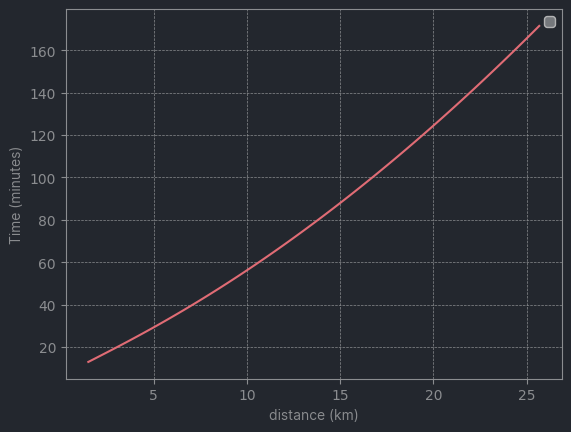

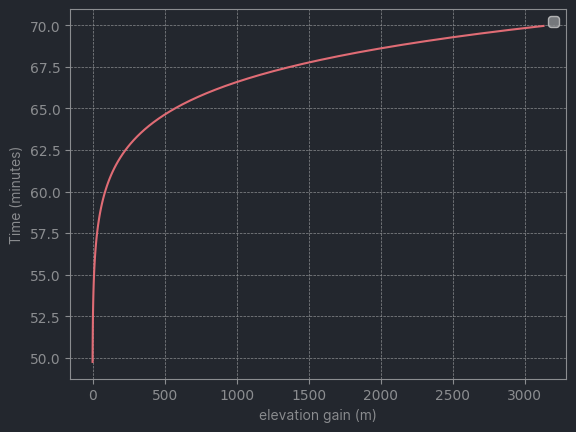

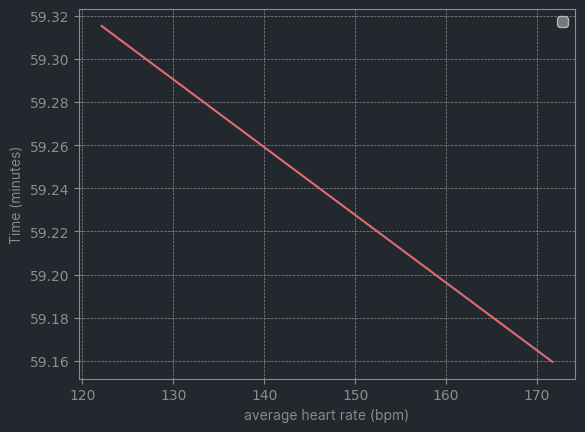

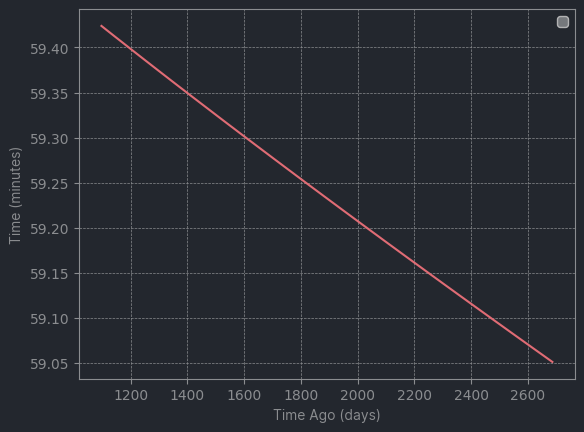

In [1977]:
base_handler.plot_relationships()

In [1951]:
ft_handler.plot_training_results()

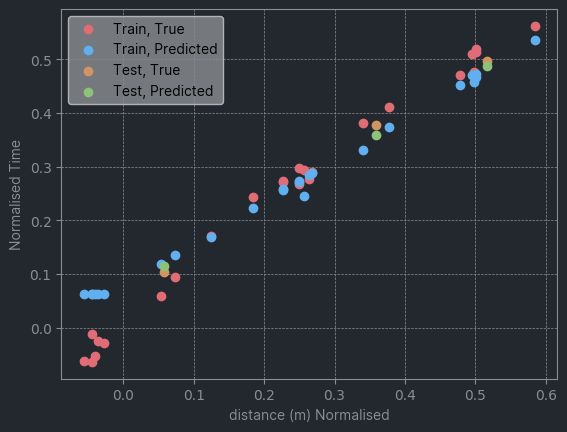

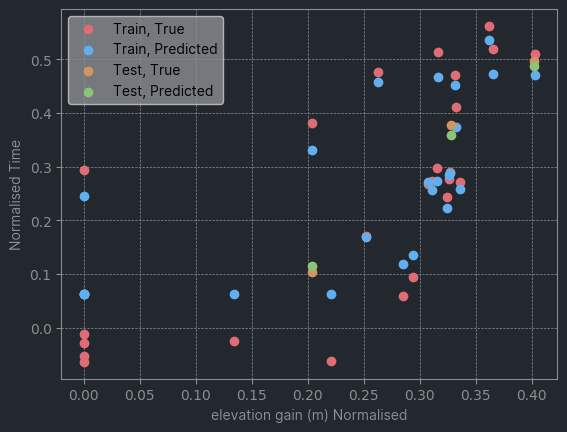

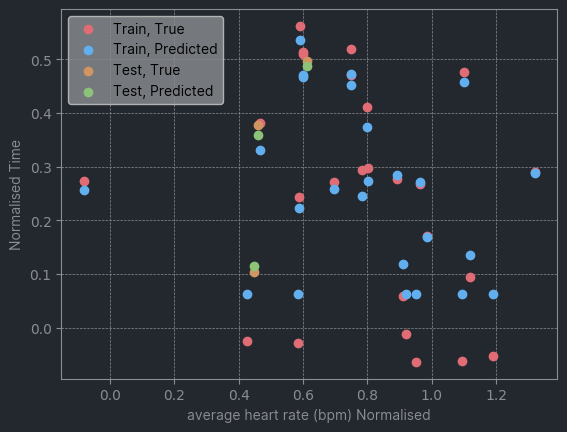

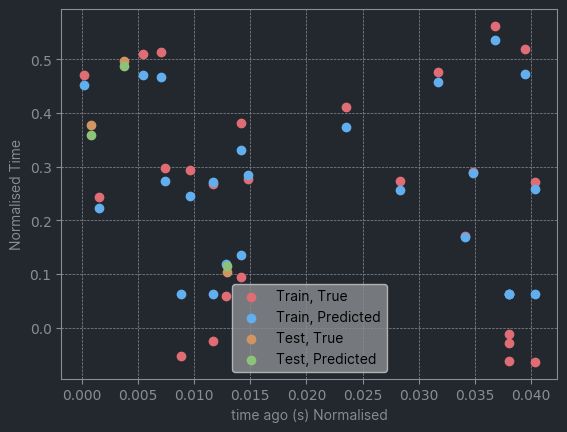

In [1975]:
for i in range(4):
    my_traintestpredictions(x_train=x_train_tensor[:,i],
                            y_train=y_train_tensor,
                            y_train_pred=ft_handler.model(x_train_tensor.unsqueeze(1)).detach().numpy(),
                            x_test=x_test_tensor[:,i],
                            y_test=y_test_tensor,
                            y_test_pred=ft_handler.model(x_test_tensor.unsqueeze(1)).detach().numpy(),
                            x_name=input_cols[i]+' Normalised',
                            y_name='Normalised Time')

In [1362]:
original_data
data = pd.concat([data, user_df])

In [1940]:
# race_info = pd.DataFrame({
#     'distance (m)': [10000],
#     'elevation gain (m)': [0.0],	
#     'average heart rate (bpm)': [175],	
#     'timestamp': ['2023-07-22']
# })

user_df = read_strava_csv()
user_df = user_df[user_df["timestamp"] < race_info['timestamp'][0]]

user_df = time_before_race(user_df, race_info)

user_df["pace (min/km)"] = (user_df["elapsed time (s)"]/60)/(user_df["distance (m)"]/1000)
user_df['athlete'] = np.full(shape=(len(user_df)), fill_value='Aidan')

data = pd.concat([original_data, user_df])

aidan_data = athlete_data(athletes=["Aidan"], device = "cpu")

aidan_handler = model_handler(model = LeakyReLU_NN(12), dataobject = aidan_data)

aidan_handler.train(
    epochs = 512,
    batch_size = 20,
    EarlyStopping_Patience=100,
    factor_duplications=0.1
)

Epoch 001 | Average training loss: 0.44412 | Average testing loss: 0.45975
Epoch 002 | Average training loss: 0.42548 | Average testing loss: 0.43192
Epoch 003 | Average training loss: 0.40383 | Average testing loss: 0.40309
Epoch 004 | Average training loss: 0.38124 | Average testing loss: 0.37436
Epoch 005 | Average training loss: 0.35878 | Average testing loss: 0.34611
Epoch 006 | Average training loss: 0.33638 | Average testing loss: 0.31862
Epoch 007 | Average training loss: 0.31440 | Average testing loss: 0.29178
Epoch 008 | Average training loss: 0.29373 | Average testing loss: 0.26576
Epoch 009 | Average training loss: 0.27382 | Average testing loss: 0.24124
Epoch 010 | Average training loss: 0.25461 | Average testing loss: 0.21748
Epoch 011 | Average training loss: 0.23638 | Average testing loss: 0.19448
Epoch 012 | Average training loss: 0.21931 | Average testing loss: 0.17300
Epoch 013 | Average training loss: 0.20343 | Average testing loss: 0.15312
Epoch 014 | Average train

In [1943]:
user_df = read_strava_csv()
user_df = user_df[user_df["timestamp"] < race_info['timestamp'][0]]
x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor, x_race_tensor, y_race_tensor = prepare_user_data(aidan_data, user_df, race_info)

predicted_time, unscaled_data = aidan_handler.predict(x_race_tensor, scaled=True)

confidence = aidan_handler.testing_losses_mape[-1]
print(f'Confidence: {confidence}')

print(predicted_time)
print(f'Upper: {predicted_time*(1+confidence)}, Lower: {predicted_time*(1-confidence)}')

Confidence: 0.08113095909357071
20.902435302734375
Upper: 22.598269926236526, Lower: 19.206600679232224


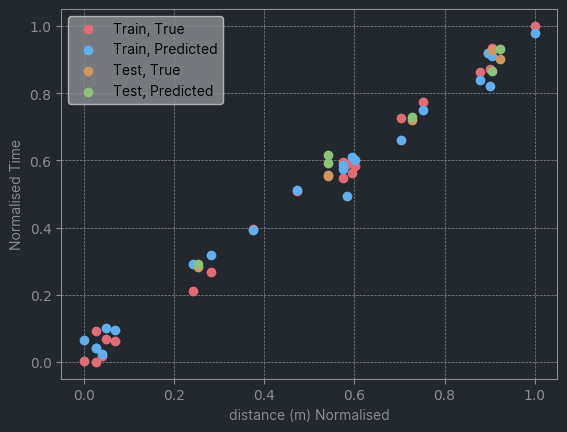

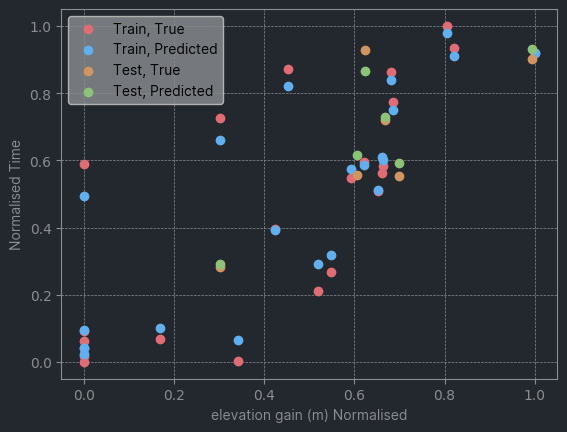

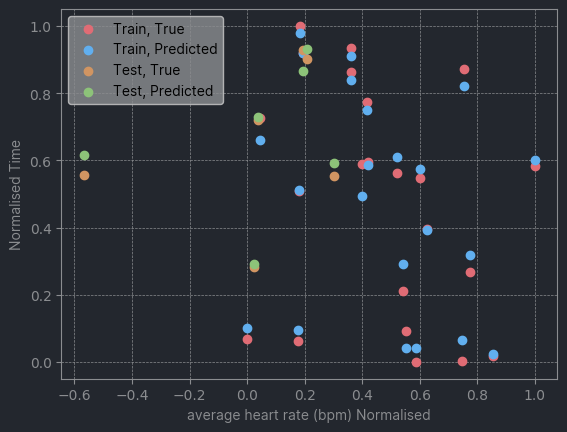

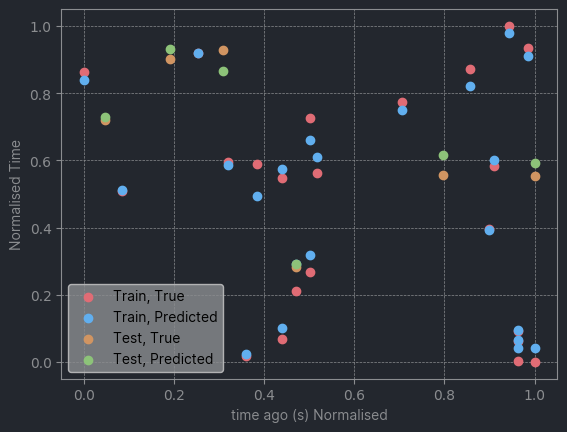

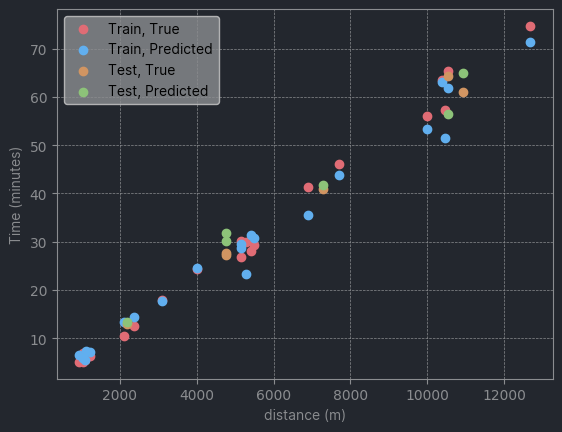

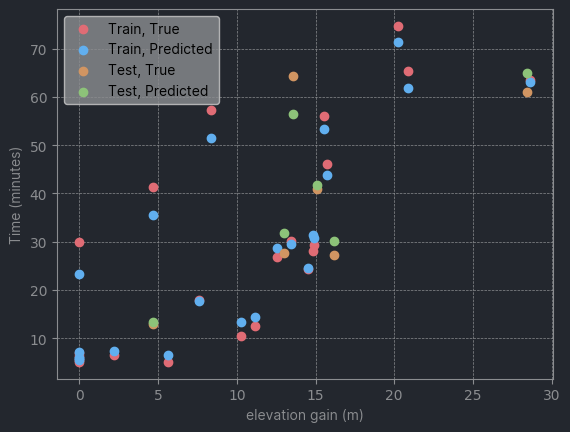

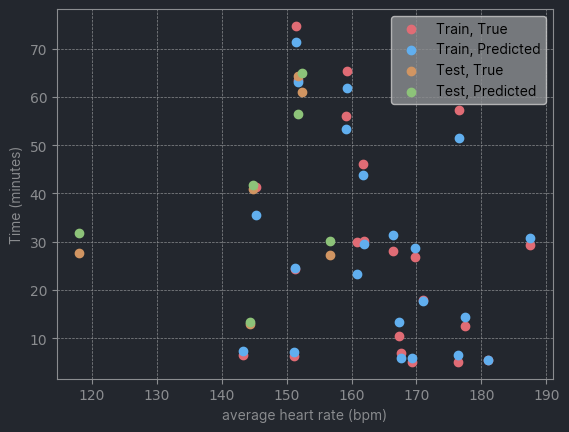

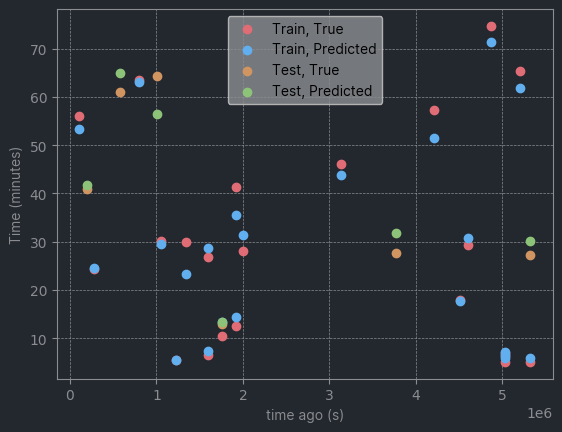

In [1944]:
aidan_handler.plot_traintestpredictions()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


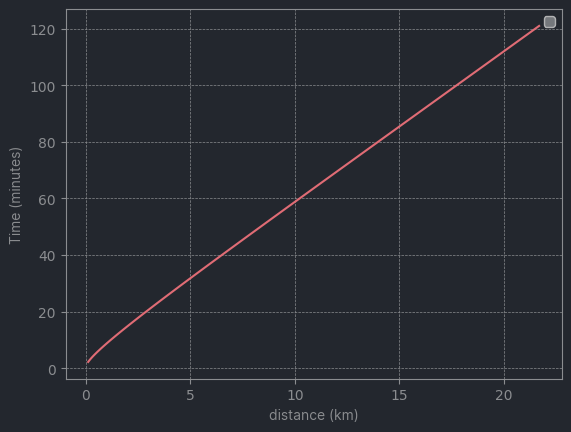

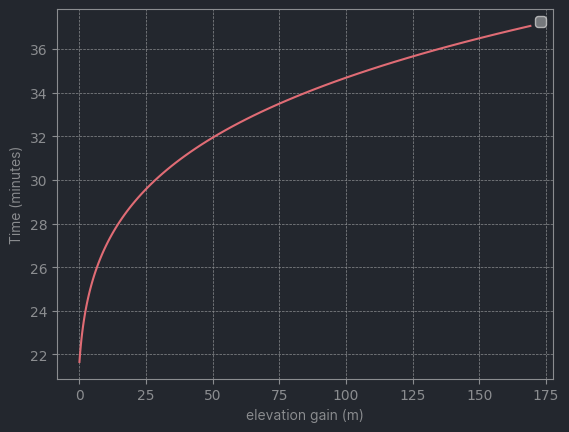

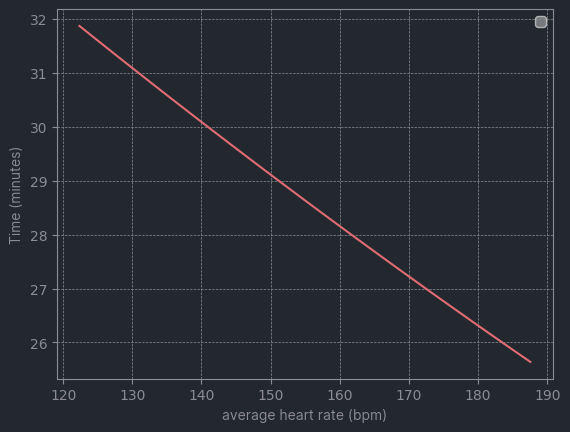

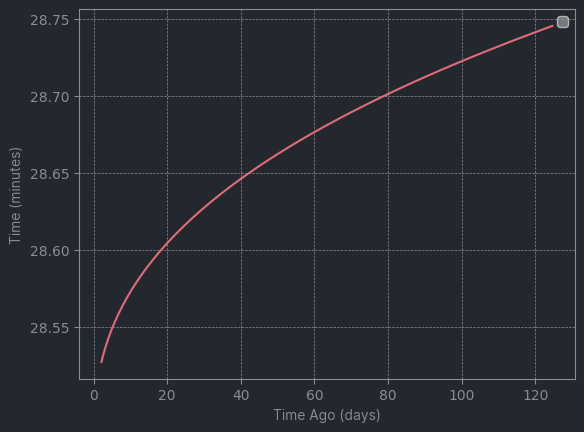

In [1875]:
aidan_handler.plot_relationships()

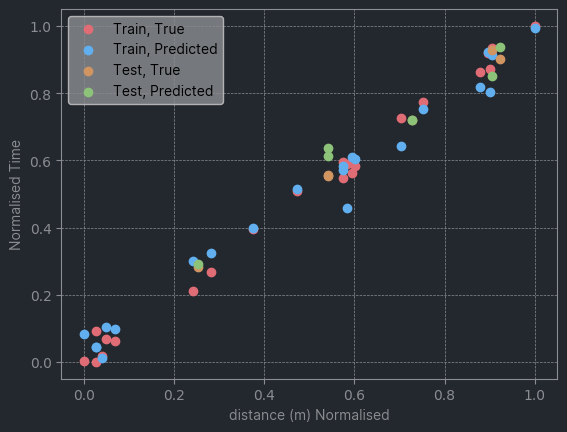

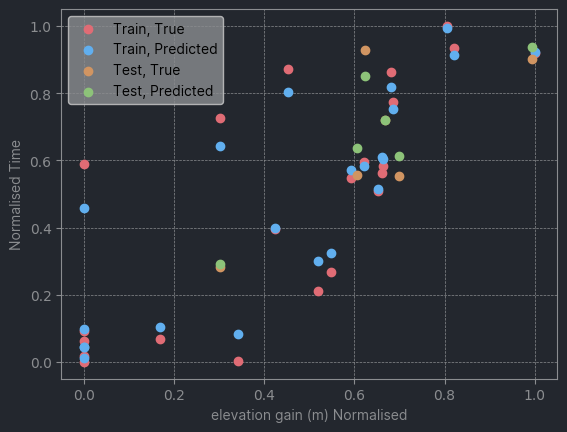

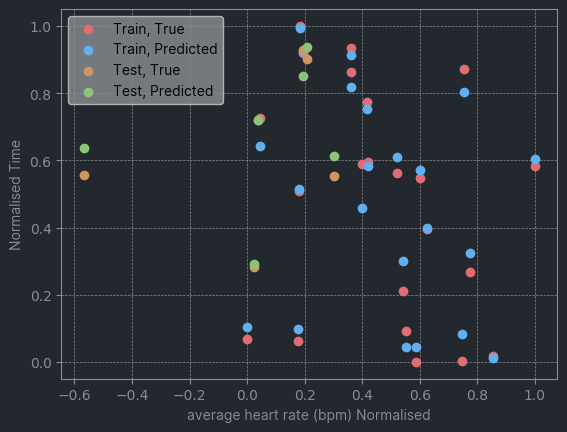

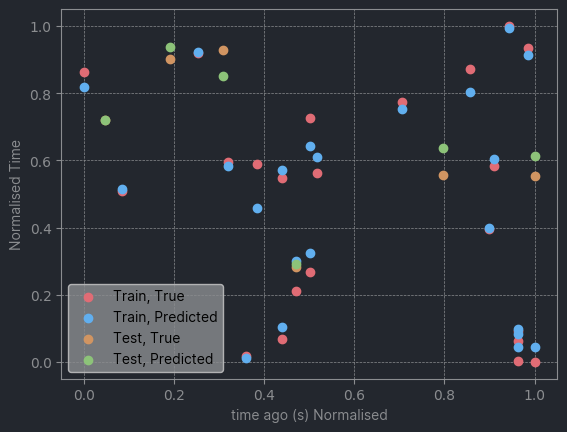

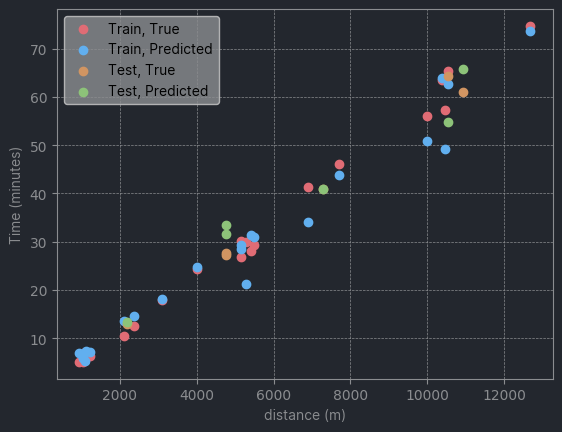

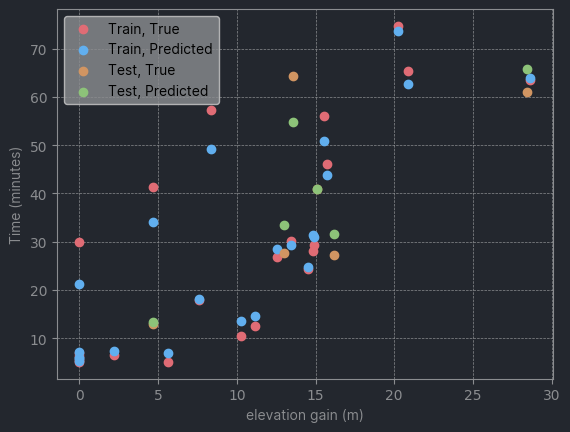

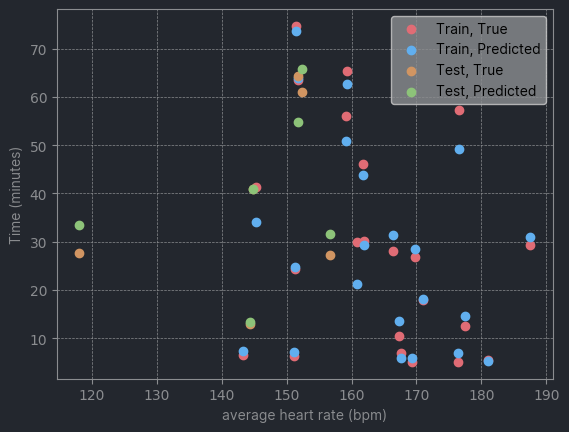

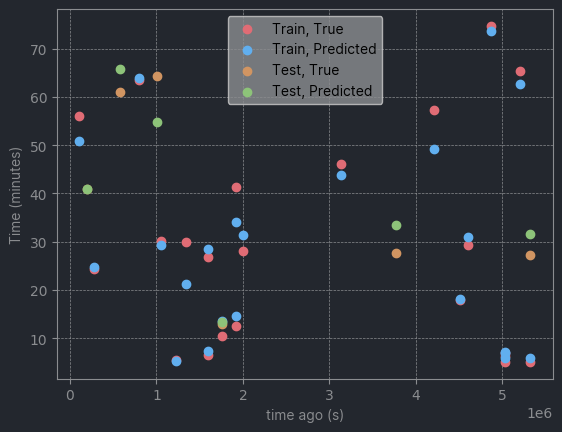

In [1840]:
aidan_handler.plot_traintestpredictions()

In [1405]:
aidan_handler.plot_training_results()

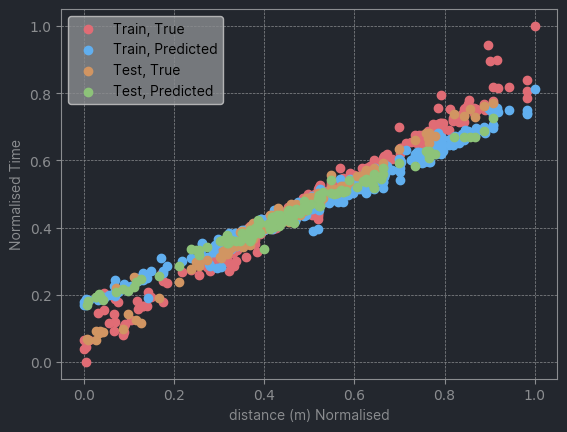

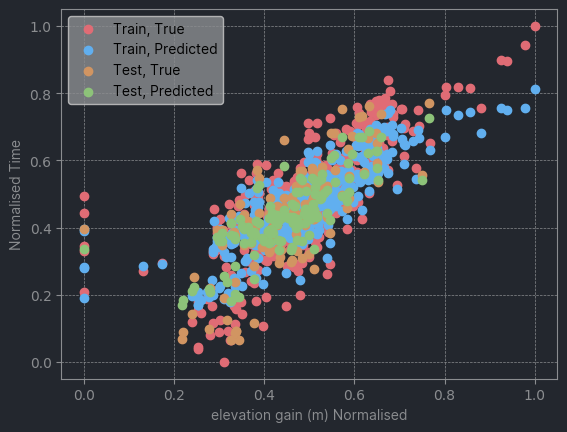

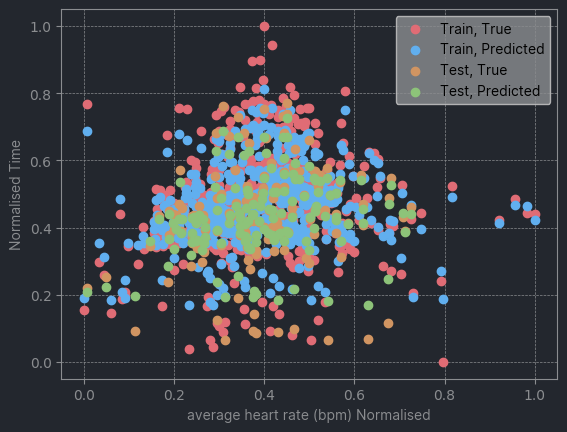

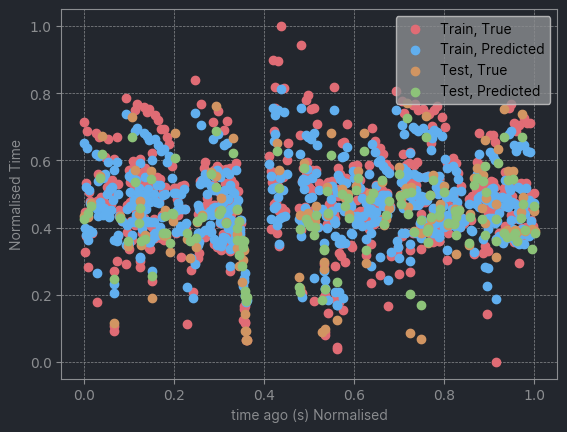

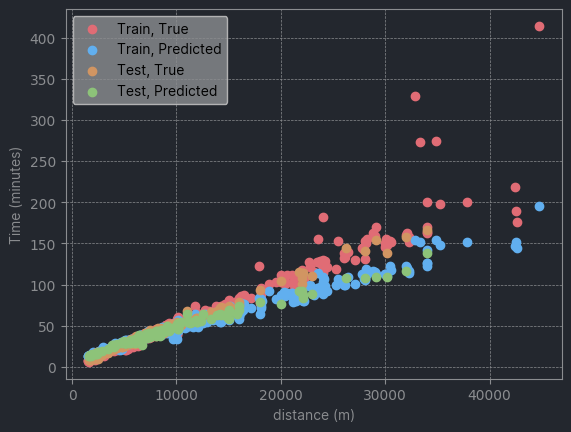

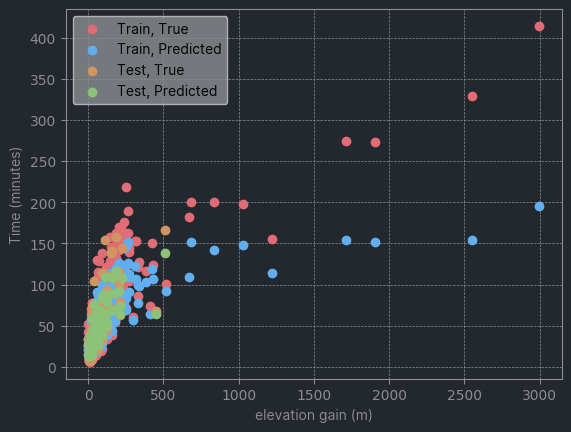

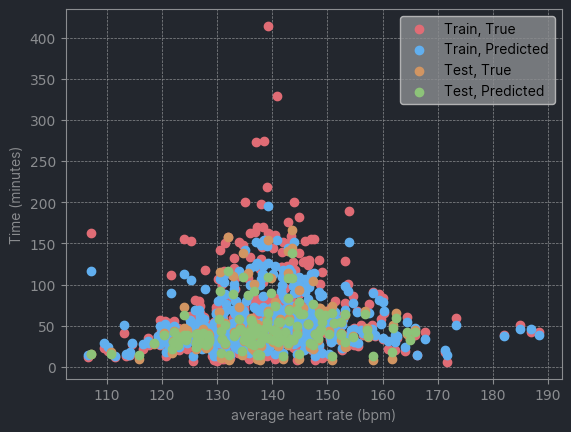

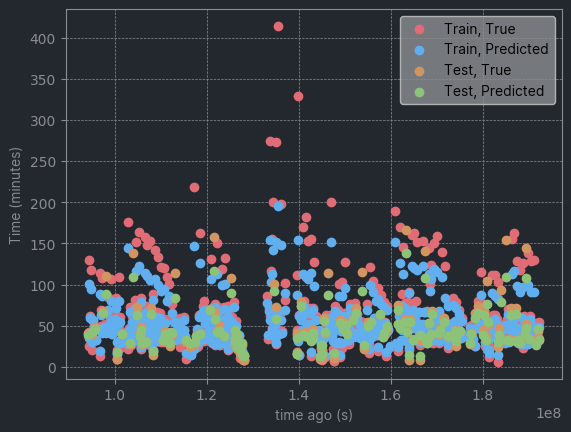

In [1914]:
with open('finder_ELU/handler_6hn.pkl', 'rb') as input:
    elu_handler = pickle.load(input)

elu_handler.plot_traintestpredictions()

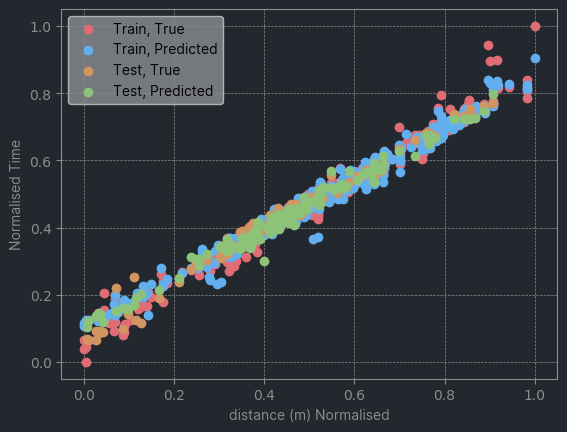

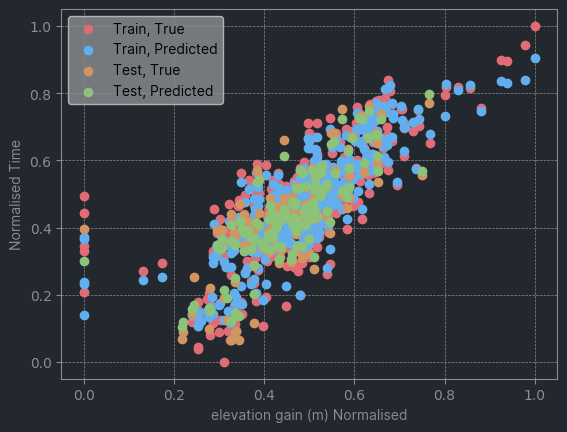

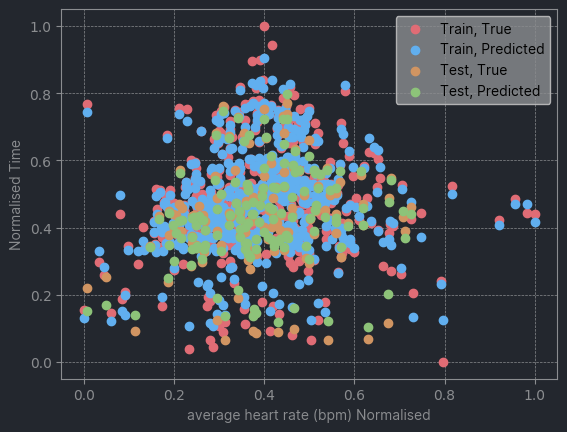

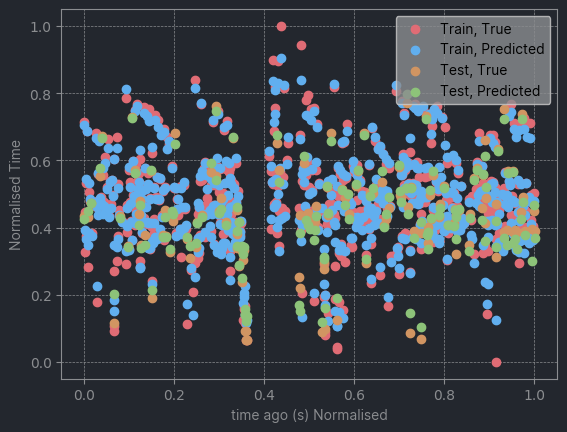

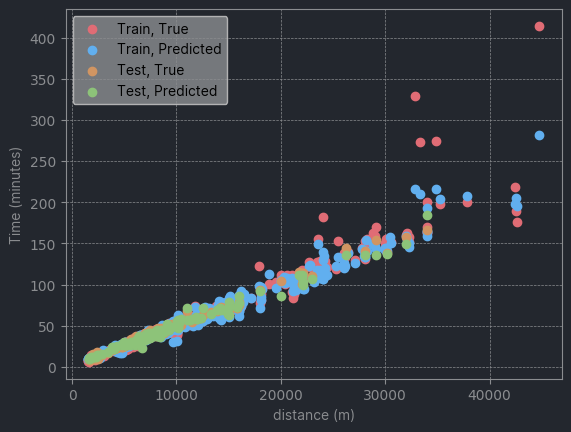

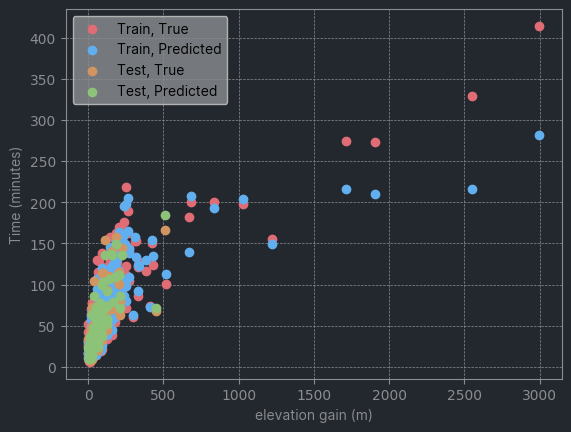

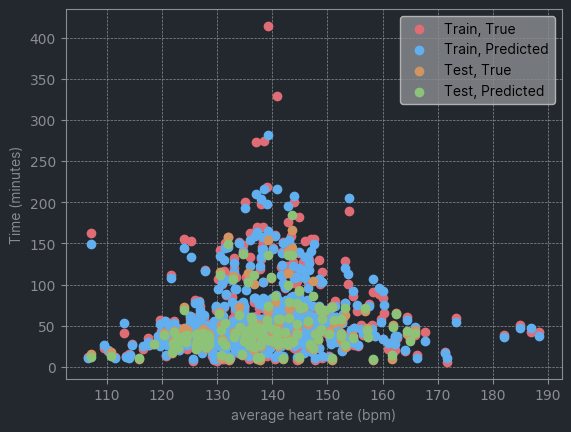

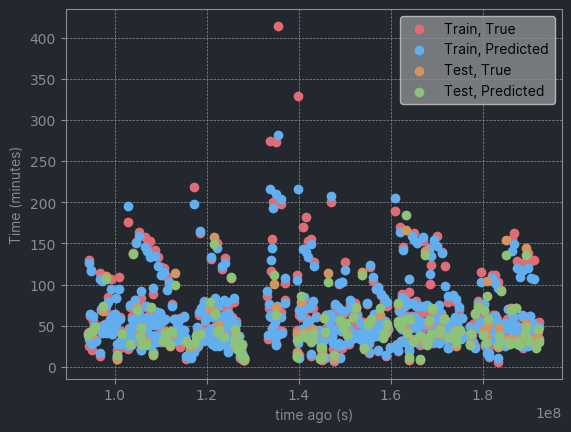

In [1915]:
with open('finder_basic/handler_6hn.pkl', 'rb') as input:
    basic_handler = pickle.load(input)

basic_handler.plot_traintestpredictions()